In [1]:
import numpy as np
import pandas as pd

# Set a seed for reproducibility
np.random.seed(42)
n = 10000  # number of rows

# -------------------------------------------------------------------
# 1. Generate an underlying latent variable (machine_stress)
# -------------------------------------------------------------------
machine_stress = np.random.normal(loc=0, scale=1, size=n)

# -------------------------------------------------------------------
# 2. Generate training (feature) columns
# -------------------------------------------------------------------

# MachineID: Assume 50 unique machines (IDs from 1 to 50)
machine_ids = np.random.choice(np.arange(1, 51), size=n)

# OperationTime (e.g., total hours of operation)
operation_time = 1000 + 50 * machine_stress + np.random.normal(0, 30, n)

# CuttingSpeed (e.g., in m/min)
cutting_speed = 100 + 10 * machine_stress + np.random.normal(0, 5, n)

# FeedRate (e.g., in mm/rev)
feed_rate = 5 + 0.5 * machine_stress + np.random.normal(0, 0.2, n)

# ToolType (categorical based on machine stress)
tool_type = np.where(machine_stress < -0.5, 'HSS',
                     np.where(machine_stress < 0.5, 'Carbide', 'Ceramic'))

# ToolDiameter (in mm)
tool_diameter = 5 + 0.2 * machine_stress + np.random.normal(0, 0.1, n)

# SpindleSpeed (RPM)
spindle_speed = 1500 + 100 * machine_stress + np.random.normal(0, 20, n)

# MotorCurrent (Amps)
motor_current = 10 + 1 * machine_stress + np.random.normal(0, 0.5, n)

# PowerConsumption (Watts)
power_consumption = 200 + 20 * machine_stress + np.random.normal(0, 10, n)

# LubricationLevel (a percentage value)
lubrication_level = 80 - 5 * machine_stress + np.random.normal(0, 3, n)

# CoolingSystemEfficiency (percentage)
cooling_efficiency = 90 - 2 * machine_stress + np.random.normal(0, 2, n)

# CycleTime (seconds)
cycle_time = 30 + 2 * machine_stress + np.random.normal(0, 1, n)

# MachineAge (years; ensure a minimum age of 1 year)
machine_age = np.clip(5 + 0.5 * machine_stress + np.random.normal(0, 1, n), 1, None)

# PartDefectRate (percentage)
part_defect_rate = np.clip(1 + 1.5 * machine_stress + np.random.normal(0, 0.5, n), 0, 100)

# MaintenanceFrequency (times per year)
maintenance_frequency = np.clip(2 + 0.5 * machine_stress + np.random.normal(0, 0.2, n), 0, None)

# VibrationLevel (arbitrary units)
vibration_level = 3 + 2 * machine_stress + np.random.normal(0, 0.5, n)

# MachineHealthStatus (score from 0 to 100; clip to [0, 100])
machine_health_status = np.clip(100 - 10 * machine_stress + np.random.normal(0, 5, n), 0, 100)

# ToolWearRate (arbitrary wear rate units)
tool_wear_rate = 0.5 + 0.3 * machine_stress + np.random.normal(0, 0.1, n)

# CuttingTemperature (in °C)
cutting_temperature = 200 + 15 * machine_stress + np.random.normal(0, 5, n)

# MaterialType (categorical)
material_type = np.where(machine_stress < -0.5, 'Steel',
                         np.where(machine_stress < 0.5, 'Aluminum', 'Titanium'))

# MaterialHardness: use different baselines for each MaterialType
material_hardness = np.array([
    55 + np.random.normal(0, 2) if mt == 'Steel'
    else (35 + np.random.normal(0, 2) if mt == 'Aluminum'
          else 65 + np.random.normal(0, 2))
    for mt in material_type
])

# PressureLevel (in appropriate pressure units)
pressure_level = 100 + 10 * machine_stress + np.random.normal(0, 5, n)

# MachineStability (rating 1-10)
machine_stability = np.clip(8 - 0.5 * machine_stress + np.random.normal(0, 0.3, n), 1, 10)

# MachineAlignmentStatus (categorical based on stability)
machine_alignment_status = np.where(machine_stability < 5, 'Misaligned',
                                    np.where(machine_stability < 7, 'Slightly Misaligned', 'Aligned'))

# PowerSurgeRate (number per unit time; ensure non-negative)
power_surge_rate = np.clip(0.1 + 0.05 * machine_stress + np.random.normal(0, 0.02, n), 0, None)

# MachineCalibration (a score)
machine_calibration = 95 - 5 * machine_stress + np.random.normal(0, 2, n)

# ToolChangeInterval (hours between tool changes)
tool_change_interval = 100 - 10 * machine_stress + np.random.normal(0, 5, n)

# SpindleHealthStatus (score 0 to 100)
spindle_health_status = np.clip(100 - 8 * machine_stress + np.random.normal(0, 3, n), 0, 100)

# LubricationCondition (categorical based on LubricationLevel)
lubrication_condition = np.where(lubrication_level > 85, 'Good',
                                 np.where(lubrication_level > 70, 'Fair', 'Poor'))

# CoolantFlowRate (liters/minute)
coolant_flow_rate = 10 + 2 * machine_stress + np.random.normal(0, 1, n)

# CuttingForce (Newtons)
cutting_force = 500 + 50 * machine_stress + np.random.normal(0, 20, n)

# OperationMode (categorical; here chosen at random)
operation_mode = np.random.choice(['Automatic', 'Manual', 'Semi-Automatic'], size=n)

# MachineLoad (percentage; clip to [0,100])
machine_load = np.clip(70 + 5 * machine_stress + np.random.normal(0, 3, n), 0, 100)

# SpindleTorque (Nm)
spindle_torque = 200 + 20 * machine_stress + np.random.normal(0, 10, n)

# SpindleCondition (categorical based on spindle health)
spindle_condition = np.where(spindle_health_status < 50, 'Critical',
                             np.where(spindle_health_status < 75, 'Warning', 'Good'))

# PowerSupplyVoltage (Volts)
power_supply_voltage = 220 + 10 * machine_stress + np.random.normal(0, 3, n)

# -------------------------------------------------------------------
# 3. Generate testing (outcome) columns
# -------------------------------------------------------------------

# Failure: a binary outcome determined by a logistic function on machine_stress
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

failure_prob = sigmoid(3 * machine_stress)  # adjust the factor (3) as needed
failure = (np.random.rand(n) < failure_prob).astype(int)

# FailureType: if no failure, then "None". Otherwise, assign a type based on some feature thresholds.
failure_type = []
for i in range(n):
    if failure[i] == 0:
        failure_type.append("None")
    else:
        # Use a few key features to decide a type:
        if cutting_temperature[i] > (200 + 15 * 0.5):  # e.g. above a threshold → overheating
            failure_type.append("Overheating")
        elif vibration_level[i] > (3 + 2 * 0.5):        # high vibration → vibration issue
            failure_type.append("Vibration Issue")
        elif tool_wear_rate[i] > (0.5 + 0.3 * 0.5):       # high tool wear → excessive tool wear
            failure_type.append("Excessive Tool Wear")
        else:
            failure_type.append("General Failure")

# Recommendation: based on FailureType (if failure==0, then no action is needed)
recommendation = []
for ft in failure_type:
    if ft == "None":
        recommendation.append("No action required")
    elif ft == "Overheating":
        recommendation.append("Inspect cooling system and check lubrication")
    elif ft == "Vibration Issue":
        recommendation.append("Examine machine alignment and spindle condition")
    elif ft == "Excessive Tool Wear":
        recommendation.append("Replace tool and adjust feed rate")
    else:
        recommendation.append("Schedule maintenance check immediately")

# -------------------------------------------------------------------
# 4. Create a single DataFrame containing both training and testing columns
# -------------------------------------------------------------------
df = pd.DataFrame({
    # Training columns
    'MachineID': machine_ids,
    'OperationTime': operation_time,
    'CuttingSpeed': cutting_speed,
    'FeedRate': feed_rate,
    'ToolType': tool_type,
    'ToolDiameter': tool_diameter,
    'SpindleSpeed': spindle_speed,
    'MotorCurrent': motor_current,
    'PowerConsumption': power_consumption,
    'LubricationLevel': lubrication_level,
    'CoolingSystemEfficiency': cooling_efficiency,
    'CycleTime': cycle_time,
    'MachineAge': machine_age,
    'PartDefectRate': part_defect_rate,
    'MaintenanceFrequency': maintenance_frequency,
    'VibrationLevel': vibration_level,
    'MachineHealthStatus': machine_health_status,
    'ToolWearRate': tool_wear_rate,
    'CuttingTemperature': cutting_temperature,
    'MaterialType': material_type,
    'MaterialHardness': material_hardness,
    'PressureLevel': pressure_level,
    'MachineStability': machine_stability,
    'MachineAlignmentStatus': machine_alignment_status,
    'PowerSurgeRate': power_surge_rate,
    'MachineCalibration': machine_calibration,
    'ToolChangeInterval': tool_change_interval,
    'SpindleHealthStatus': spindle_health_status,
    'LubricationCondition': lubrication_condition,
    'CoolantFlowRate': coolant_flow_rate,
    'CuttingForce': cutting_force,
    'OperationMode': operation_mode,
    'MachineLoad': machine_load,
    'SpindleTorque': spindle_torque,
    'SpindleCondition': spindle_condition,
    'PowerSupplyVoltage': power_supply_voltage,
    
    # Testing columns (outcomes)
    'Failure': failure,
    'FailureType': failure_type,
    'Recommendation': recommendation
})

# (Optional) Save the complete dataset to a CSV file
df.to_csv("synthetic_machine_data.csv", index=False)

# Display the first few rows for a quick check
print(df.head())


   MachineID  OperationTime  CuttingSpeed  FeedRate ToolType  ToolDiameter  \
0         42     990.890549    109.407406  5.150135  Carbide      5.060204   
1         17     993.560328     95.832006  4.876967  Carbide      4.828740   
2         31    1020.250558    108.479313  5.247619  Ceramic      5.058354   
3         34    1036.764104    112.214999  5.899118  Ceramic      5.203658   
4         38     937.471153    100.852800  4.621288  Carbide      5.011324   

   SpindleSpeed  MotorCurrent  PowerConsumption  LubricationLevel  ...  \
0   1552.424925     11.616596        204.632426         78.377090  ...   
1   1473.940420     10.016559        186.810622         85.233615  ...   
2   1553.680306     10.294565        214.629208         71.431764  ...   
3   1621.706453     11.012796        230.941672         70.665530  ...   
4   1469.989519      9.534884        199.112293         84.416560  ...   

   CoolantFlowRate  CuttingForce   OperationMode  MachineLoad  SpindleTorque  \
0     

In [2]:
df.to_csv("PMS_Final_data.csv",index=False)

In [3]:
import pandas as pd
pd.set_option("display.max_columns", None)
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
#pd.set_option("display.max_rows",20)
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

c:\Users\Suriya\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


In [4]:
df = pd.read_csv(r"D:\IAT-AI Project1\PMS 2.0\PMS_Final_data.csv")

In [5]:
df

MachineID  OperationTime  CuttingSpeed  FeedRate ToolType  ToolDiameter  \
0            42     990.890549    109.407406  5.150135  Carbide      5.060204   
1            17     993.560328     95.832006  4.876967  Carbide      4.828740   
2            31    1020.250558    108.479313  5.247619  Ceramic      5.058354   
3            34    1036.764104    112.214999  5.899118  Ceramic      5.203658   
4            38     937.471153    100.852800  4.621288  Carbide      5.011324   
...         ...            ...           ...       ...      ...           ...   
9995         37    1055.880519    106.996959  5.513671  Ceramic      5.353133   
9996         19     880.162458     79.843785  3.905971      HSS      4.468772   
9997         20     922.562319     94.843191  4.850244      HSS      4.959542   
9998         32     973.198864    107.413521  5.389367  Carbide      4.977075   
9999         44    1011.123216    102.541412  5.442491  Ceramic      5.031445   

      SpindleSpeed  MotorCurrent  PowerConsumption  LubricationLevel  \
0      1552.424925     11.616596        204.632426         78.377090   
1      1473.940420     10.016559        186.810622         85.233615   
2      1553.680306     10.294565        214.629208         71.431764   
3      1621.706453     11.012796        230.941672         70.665530   
4      1469.989519      9.534884        199.112293         84.416560   
...            ...           ...               ...               ...   
9995   1650.876333     10.690473        230.641418         74.094824   
9996   1294.953826      7.638868        155.212762         92.228292   
9997   1467.832270      9.269085        184.410690         86.739895   
9998   1550.530276     10.648613        210.455133         77.360994   
9999   1567.721390     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature MaterialType  MaterialHardness  PressureLevel  \
0             210.369127     Aluminum         36.139294     106.454657   
1             202.134987     Aluminum         37.006345     102.949554   
2             211.359819     Titanium         64.976372     102.054474   
3             224.115961     Titan

In [6]:
df.columns

Index(['MachineID', 'OperationTime', 'CuttingSpeed', 'FeedRate', 'ToolType',
       'ToolDiameter', 'SpindleSpeed', 'MotorCurrent', 'PowerConsumption',
       'LubricationLevel', 'CoolingSystemEfficiency', 'CycleTime',
       'MachineAge', 'PartDefectRate', 'MaintenanceFrequency',
       'VibrationLevel', 'MachineHealthStatus', 'ToolWearRate',
       'CuttingTemperature', 'MaterialType', 'MaterialHardness',
       'PressureLevel', 'MachineStability', 'MachineAlignmentStatus',
       'PowerSurgeRate', 'MachineCalibration', 'ToolChangeInterval',
       'SpindleHealthStatus', 'LubricationCondition', 'CoolantFlowRate',
       'CuttingForce', 'OperationMode', 'MachineLoad', 'SpindleTorque',
       'SpindleCondition', 'PowerSupplyVoltage', 'Failure', 'FailureType',
       'Recommendation'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MachineID                10000 non-null  int64  
 1   OperationTime            10000 non-null  float64
 2   CuttingSpeed             10000 non-null  float64
 3   FeedRate                 10000 non-null  float64
 4   ToolType                 10000 non-null  object 
 5   ToolDiameter             10000 non-null  float64
 6   SpindleSpeed             10000 non-null  float64
 7   MotorCurrent             10000 non-null  float64
 8   PowerConsumption         10000 non-null  float64
 9   LubricationLevel         10000 non-null  float64
 10  CoolingSystemEfficiency  10000 non-null  float64
 11  CycleTime                10000 non-null  float64
 12  MachineAge               10000 non-null  float64
 13  PartDefectRate           10000 non-null  float64
 14  MaintenanceFrequency   

In [8]:
df["Recommendation"].unique()

array(['Inspect cooling system and check lubrication',
       'Schedule maintenance check immediately', 'No action required',
       'Replace tool and adjust feed rate',
       'Examine machine alignment and spindle condition'], dtype=object)

In [9]:
df["FailureType"].unique()

array(['Overheating', 'General Failure', nan, 'Excessive Tool Wear',
       'Vibration Issue'], dtype=object)

In [10]:
df["OperationMode"].unique()

array(['Semi-Automatic', 'Automatic', 'Manual'], dtype=object)

In [11]:
df["MachineAlignmentStatus"].unique()

array(['Aligned', 'Slightly Misaligned'], dtype=object)

In [12]:
df["MaterialType"].unique()

array(['Aluminum', 'Titanium', 'Steel'], dtype=object)

In [13]:
df["ToolType"].unique()

array(['Carbide', 'Ceramic', 'HSS'], dtype=object)

In [14]:
labelbinarizer = LabelBinarizer()
encoded_results_1 = labelbinarizer.fit_transform(df["ToolType"])
encoded_results_1

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]])

In [15]:
df_encoded_1 = pd.DataFrame(encoded_results_1,columns=labelbinarizer.classes_)
df_encoded_1

Carbide  Ceramic  HSS
0           1        0    0
1           1        0    0
2           0        1    0
3           0        1    0
4           1        0    0
...       ...      ...  ...
9995        0        1    0
9996        0        0    1
9997        0        0    1
9998        1        0    0
9999        0        1    0

[10000 rows x 3 columns]

In [16]:
encoded_results_2 = labelbinarizer.fit_transform(df["MaterialType"])

In [17]:
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)
df_encoded_2 

Aluminum  Steel  Titanium
0            1      0         0
1            1      0         0
2            0      0         1
3            0      0         1
4            1      0         0
...        ...    ...       ...
9995         0      0         1
9996         0      1         0
9997         0      1         0
9998         1      0         0
9999         0      0         1

[10000 rows x 3 columns]

In [18]:
df["MachineAlignmentStatus"] = df["MachineAlignmentStatus"].replace({"Aligned":1, "Slightly Misaligned":0})

C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\495814831.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MachineAlignmentStatus"] = df["MachineAlignmentStatus"].replace({"Aligned":1, "Slightly Misaligned":0})


In [19]:
df['MachineAlignmentStatus']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: MachineAlignmentStatus, Length: 10000, dtype: int64

In [20]:
# Create an encoder instance
encoder = LabelEncoder()

# Apply label encoding to column
df['OperationMode'] = encoder.fit_transform(df['OperationMode'])

In [21]:
df["FailureType"].fillna(value="NoFailure", inplace= True)

C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1797910327.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FailureType"].fillna(value="NoFailure", inplace= True)


In [22]:
labelbinarizer = LabelBinarizer()

# Transform the 'FailureType' column and store the encoded result
encoded_results_3 = labelbinarizer.fit_transform(df['FailureType'])


In [23]:
encoded_results_3

array([[0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])

In [24]:
labelbinarizer.classes_

array(['Excessive Tool Wear', 'General Failure', 'NoFailure',
       'Overheating', 'Vibration Issue'], dtype='<U19')

In [25]:
df_encoded_3 = pd.DataFrame(encoded_results_3, columns=labelbinarizer.classes_)

df_encoded_3.loc[df['FailureType'] == 'Unknown'] = 0

In [26]:
df_encoded_3

Excessive Tool Wear  General Failure  NoFailure  Overheating  \
0                       0                0          0            1   
1                       0                1          0            0   
2                       0                0          0            1   
3                       0                0          0            1   
4                       0                0          1            0   
...                   ...              ...        ...          ...   
9995                    0                0          0            1   
9996                    0                0          1            0   
9997                    0                0          1            0   
9998                    0                0          1            0   
9999                    0                0          0            0   

      Vibration Issue  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
9995                0  
9996                0  
9997                0  
9998                0  
9999                1  

[10000 rows x 5 columns]

In [27]:
labelbinarizer = LabelBinarizer()

# Transform the 'FailureType' column and store the encoded result
encoded_results_4 = labelbinarizer.fit_transform(df['LubricationCondition'])

In [28]:
encoded_results_4

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [29]:
labelbinarizer.classes_

array(['Fair', 'Good', 'Poor'], dtype='<U4')

In [30]:
df_encoded_4 = pd.DataFrame(encoded_results_4, columns=labelbinarizer.classes_)
df_encoded_4

Fair  Good  Poor
0        1     0     0
1        0     1     0
2        1     0     0
3        1     0     0
4        1     0     0
...    ...   ...   ...
9995     1     0     0
9996     0     1     0
9997     0     1     0
9998     1     0     0
9999     1     0     0

[10000 rows x 3 columns]

In [31]:
df["SpindleCondition"].unique()

array(['Good', 'Warning'], dtype=object)

In [32]:
df["SpindleCondition"] = df["SpindleCondition"].replace({"Good":1, "Warning":0})

C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1677900757.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["SpindleCondition"] = df["SpindleCondition"].replace({"Good":1, "Warning":0})


In [33]:
labelbinarizer = LabelBinarizer()

# Transform the 'FailureType' column and store the encoded result
encoded_results_5 = labelbinarizer.fit_transform(df['Recommendation'])

In [34]:
encoded_results_5

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0]])

In [35]:
labelbinarizer.classes_

array(['Examine machine alignment and spindle condition',
       'Inspect cooling system and check lubrication',
       'No action required', 'Replace tool and adjust feed rate',
       'Schedule maintenance check immediately'], dtype='<U47')

In [36]:
df_encoded_5 = pd.DataFrame(encoded_results_5,columns=labelbinarizer.classes_)
df_encoded_5 

Examine machine alignment and spindle condition  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9995                                                0   
9996                                                0   
9997                                                0   
9998                                                0   
9999                                                1   

      Inspect cooling system and check lubrication  No action required  \
0                                                1                   0   
1                                                0                   0   
2                                                1                   0   
3                                                1                   0   
4                                                0                   1   
...                                            ...                 ...   
9995                                             1                   0   
9996                                             0                   1   
9997                                             0                   1   
9998                                             0                   1   
9999                                             0                   0   

      Replace tool and adjust feed rate  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
9995                                  0   
9996                                  0   
9997                                  0   
9998                                  0   
9999                                  0   

      Schedule maintenance check immediately  
0                                          0  
1                                          1  
2                                          0  
3                                          0  
4                                          0  
...                                      ...  
9995                                       0  
9996                                       0  
9997                                       0  
9998                                       0  
9999                                       0  

[10000 rows x 5 columns]

In [37]:
df1 = pd.concat([df,df_encoded_1, df_encoded_2,df_encoded_3,df_encoded_4,df_encoded_5], axis=1)

In [38]:
df1.head(2)

MachineID  OperationTime  CuttingSpeed  FeedRate ToolType  ToolDiameter  \
0         42     990.890549    109.407406  5.150135  Carbide      5.060204   
1         17     993.560328     95.832006  4.876967  Carbide      4.828740   

   SpindleSpeed  MotorCurrent  PowerConsumption  LubricationLevel  \
0   1552.424925     11.616596        204.632426         78.377090   
1   1473.940420     10.016559        186.810622         85.233615   

   CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                87.361030  31.704548    6.170154        1.936075   
1                91.689244  28.568630    6.138395        0.000000   

   MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0              2.059165        3.110172            97.869374      0.703157   
1              1.704050        3.447151            94.566458      0.406647   

   CuttingTemperature MaterialType  MaterialHardness  PressureLevel  \
0          210.369127     Aluminum         36.139294     106.454657   
1          202.134987     Aluminum         37.006345     102.949554   

   MachineStability  MachineAlignmentStatus  PowerSurgeRate  \
0          7.738406                       1        0.136484   
1          8.159411                       1        0.104993   

   MachineCalibration  ToolChangeInterval  SpindleHealthStatus  \
0           92.272396          100.028541            98.157424   
1           94.578762          109.224343            99.501884   

  LubricationCondition  CoolantFlowRate  CuttingForce  OperationMode  \
0                 Fair        11.276719    502.033173              2   
1                 Good         9.699999    514.297519              0   

   MachineLoad  SpindleTorque  SpindleCondition  PowerSupplyVoltage  Failure  \
0    72.854954     195.815281                 1          218.149722        1   
1    70.610133     200.435503                 1          220.036034        1   

       FailureType                                Recommendation  Carbide  \
0      Overheating  Inspect cooling system and check lubrication        1   
1  General Failure        Schedule maintenance check immediately        1   

   Ceramic  HSS  Aluminum  Steel  Titanium  Excessive Tool Wear  \
0        0    0         1      0         0                    0   
1        0    0         1      0         0                    0   

   General Failure  NoFailure  Overheating  Vibration Issue  Fair  Good  Poor  \
0                0          0            1                0     1     0     0   
1                1          0            0                0     0     1     0   

   Examine machine alignment and spindle condition  \
0                                                0   
1                                                0   

   Inspect cooling system and check lubrication  No action required  \
0                                             1                   0   
1                                             0                   0   

   Replace tool and adjust feed rate  Schedule maintenance check immediately  
0                                  0                                       0  
1                                  0                                       1

In [39]:
df1.drop(['MachineID', 'ToolType', 'MaterialType', 'LubricationCondition' , 'FailureType' , 'Recommendation'],axis=1,inplace=True)

In [40]:
df1

OperationTime  CuttingSpeed  FeedRate  ToolDiameter  SpindleSpeed  \
0        990.890549    109.407406  5.150135      5.060204   1552.424925   
1        993.560328     95.832006  4.876967      4.828740   1473.940420   
2       1020.250558    108.479313  5.247619      5.058354   1553.680306   
3       1036.764104    112.214999  5.899118      5.203658   1621.706453   
4        937.471153    100.852800  4.621288      5.011324   1469.989519   
...             ...           ...       ...           ...           ...   
9995    1055.880519    106.996959  5.513671      5.353133   1650.876333   
9996     880.162458     79.843785  3.905971      4.468772   1294.953826   
9997     922.562319     94.843191  4.850244      4.959542   1467.832270   
9998     973.198864    107.413521  5.389367      4.977075   1550.530276   
9999    1011.123216    102.541412  5.442491      5.031445   1567.721390   

      MotorCurrent  PowerConsumption  LubricationLevel  \
0        11.616596        204.632426         78.377090   
1        10.016559        186.810622         85.233615   
2        10.294565        214.629208         71.431764   
3        11.012796        230.941672         70.665530   
4         9.534884        199.112293         84.416560   
...            ...               ...               ...   
9995     10.690473        230.641418         74.094824   
9996      7.638868        155.212762         92.228292   
9997      9.269085        184.410690         86.739895   
9998     10.648613        210.455133         77.360994   
9999     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature  MaterialHardness  PressureLevel  MachineStability  \
0             210.369127         36.139294     106.454657          7.738406   
1             202.134987         37.006345     102.949554          8.159411   
2             211.359819         64.976372     102.054474          7.780715   
3             224.115961         66.939937     109.221092          7.536552   
4             191.802646         39.683745     100.276453          8.347747   
...                  ...               ...            ...               ...   
9995          213

In [41]:
df1.columns

Index(['OperationTime', 'CuttingSpeed', 'FeedRate', 'ToolDiameter',
       'SpindleSpeed', 'MotorCurrent', 'PowerConsumption', 'LubricationLevel',
       'CoolingSystemEfficiency', 'CycleTime', 'MachineAge', 'PartDefectRate',
       'MaintenanceFrequency', 'VibrationLevel', 'MachineHealthStatus',
       'ToolWearRate', 'CuttingTemperature', 'MaterialHardness',
       'PressureLevel', 'MachineStability', 'MachineAlignmentStatus',
       'PowerSurgeRate', 'MachineCalibration', 'ToolChangeInterval',
       'SpindleHealthStatus', 'CoolantFlowRate', 'CuttingForce',
       'OperationMode', 'MachineLoad', 'SpindleTorque', 'SpindleCondition',
       'PowerSupplyVoltage', 'Failure', 'Carbide', 'Ceramic', 'HSS',
       'Aluminum', 'Steel', 'Titanium', 'Excessive Tool Wear',
       'General Failure', 'NoFailure', 'Overheating', 'Vibration Issue',
       'Fair', 'Good', 'Poor',
       'Examine machine alignment and spindle condition',
       'Inspect cooling system and check lubrication', 'No acti

In [43]:
df = df1[['OperationTime', 'CuttingSpeed', 'FeedRate', 'ToolDiameter',
       'SpindleSpeed', 'MotorCurrent', 'PowerConsumption', 'LubricationLevel',
       'CoolingSystemEfficiency', 'CycleTime', 'MachineAge', 'PartDefectRate',
       'MaintenanceFrequency', 'VibrationLevel', 'MachineHealthStatus',
       'ToolWearRate', 'CuttingTemperature', 'MaterialHardness',
       'PressureLevel', 'MachineStability', 'MachineAlignmentStatus',
       'PowerSurgeRate', 'MachineCalibration', 'ToolChangeInterval',
       'SpindleHealthStatus', 'CoolantFlowRate', 'CuttingForce',
       'OperationMode', 'MachineLoad', 'SpindleTorque', 'SpindleCondition',
       'PowerSupplyVoltage',  'Carbide', 'Ceramic', 'HSS',
       'Aluminum', 'Steel', 'Titanium', 'Failure', 'Excessive Tool Wear',
       'General Failure', 'NoFailure', 'Overheating', 'Vibration Issue',
       'Fair', 'Good', 'Poor',
       'Examine machine alignment and spindle condition',
       'Inspect cooling system and check lubrication', 'No action required',
       'Replace tool and adjust feed rate',
       'Schedule maintenance check immediately']]

In [44]:
df

OperationTime  CuttingSpeed  FeedRate  ToolDiameter  SpindleSpeed  \
0        990.890549    109.407406  5.150135      5.060204   1552.424925   
1        993.560328     95.832006  4.876967      4.828740   1473.940420   
2       1020.250558    108.479313  5.247619      5.058354   1553.680306   
3       1036.764104    112.214999  5.899118      5.203658   1621.706453   
4        937.471153    100.852800  4.621288      5.011324   1469.989519   
...             ...           ...       ...           ...           ...   
9995    1055.880519    106.996959  5.513671      5.353133   1650.876333   
9996     880.162458     79.843785  3.905971      4.468772   1294.953826   
9997     922.562319     94.843191  4.850244      4.959542   1467.832270   
9998     973.198864    107.413521  5.389367      4.977075   1550.530276   
9999    1011.123216    102.541412  5.442491      5.031445   1567.721390   

      MotorCurrent  PowerConsumption  LubricationLevel  \
0        11.616596        204.632426         78.377090   
1        10.016559        186.810622         85.233615   
2        10.294565        214.629208         71.431764   
3        11.012796        230.941672         70.665530   
4         9.534884        199.112293         84.416560   
...            ...               ...               ...   
9995     10.690473        230.641418         74.094824   
9996      7.638868        155.212762         92.228292   
9997      9.269085        184.410690         86.739895   
9998     10.648613        210.455133         77.360994   
9999     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature  MaterialHardness  PressureLevel  MachineStability  \
0             210.369127         36.139294     106.454657          7.738406   
1             202.134987         37.006345     102.949554          8.159411   
2             211.359819         64.976372     102.054474          7.780715   
3             224.115961         66.939937     109.221092          7.536552   
4             191.802646         39.683745     100.276453          8.347747   
...                  ...               ...            ...               ...   
9995          213

In [46]:
df

OperationTime  CuttingSpeed  FeedRate  ToolDiameter  SpindleSpeed  \
0        990.890549    109.407406  5.150135      5.060204   1552.424925   
1        993.560328     95.832006  4.876967      4.828740   1473.940420   
2       1020.250558    108.479313  5.247619      5.058354   1553.680306   
3       1036.764104    112.214999  5.899118      5.203658   1621.706453   
4        937.471153    100.852800  4.621288      5.011324   1469.989519   
...             ...           ...       ...           ...           ...   
9995    1055.880519    106.996959  5.513671      5.353133   1650.876333   
9996     880.162458     79.843785  3.905971      4.468772   1294.953826   
9997     922.562319     94.843191  4.850244      4.959542   1467.832270   
9998     973.198864    107.413521  5.389367      4.977075   1550.530276   
9999    1011.123216    102.541412  5.442491      5.031445   1567.721390   

      MotorCurrent  PowerConsumption  LubricationLevel  \
0        11.616596        204.632426         78.377090   
1        10.016559        186.810622         85.233615   
2        10.294565        214.629208         71.431764   
3        11.012796        230.941672         70.665530   
4         9.534884        199.112293         84.416560   
...            ...               ...               ...   
9995     10.690473        230.641418         74.094824   
9996      7.638868        155.212762         92.228292   
9997      9.269085        184.410690         86.739895   
9998     10.648613        210.455133         77.360994   
9999     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature  MaterialHardness  PressureLevel  MachineStability  \
0             210.369127         36.139294     106.454657          7.738406   
1             202.134987         37.006345     102.949554          8.159411   
2             211.359819         64.976372     102.054474          7.780715   
3             224.115961         66.939937     109.221092          7.536552   
4             191.802646         39.683745     100.276453          8.347747   
...                  ...               ...            ...               ...   
9995          213

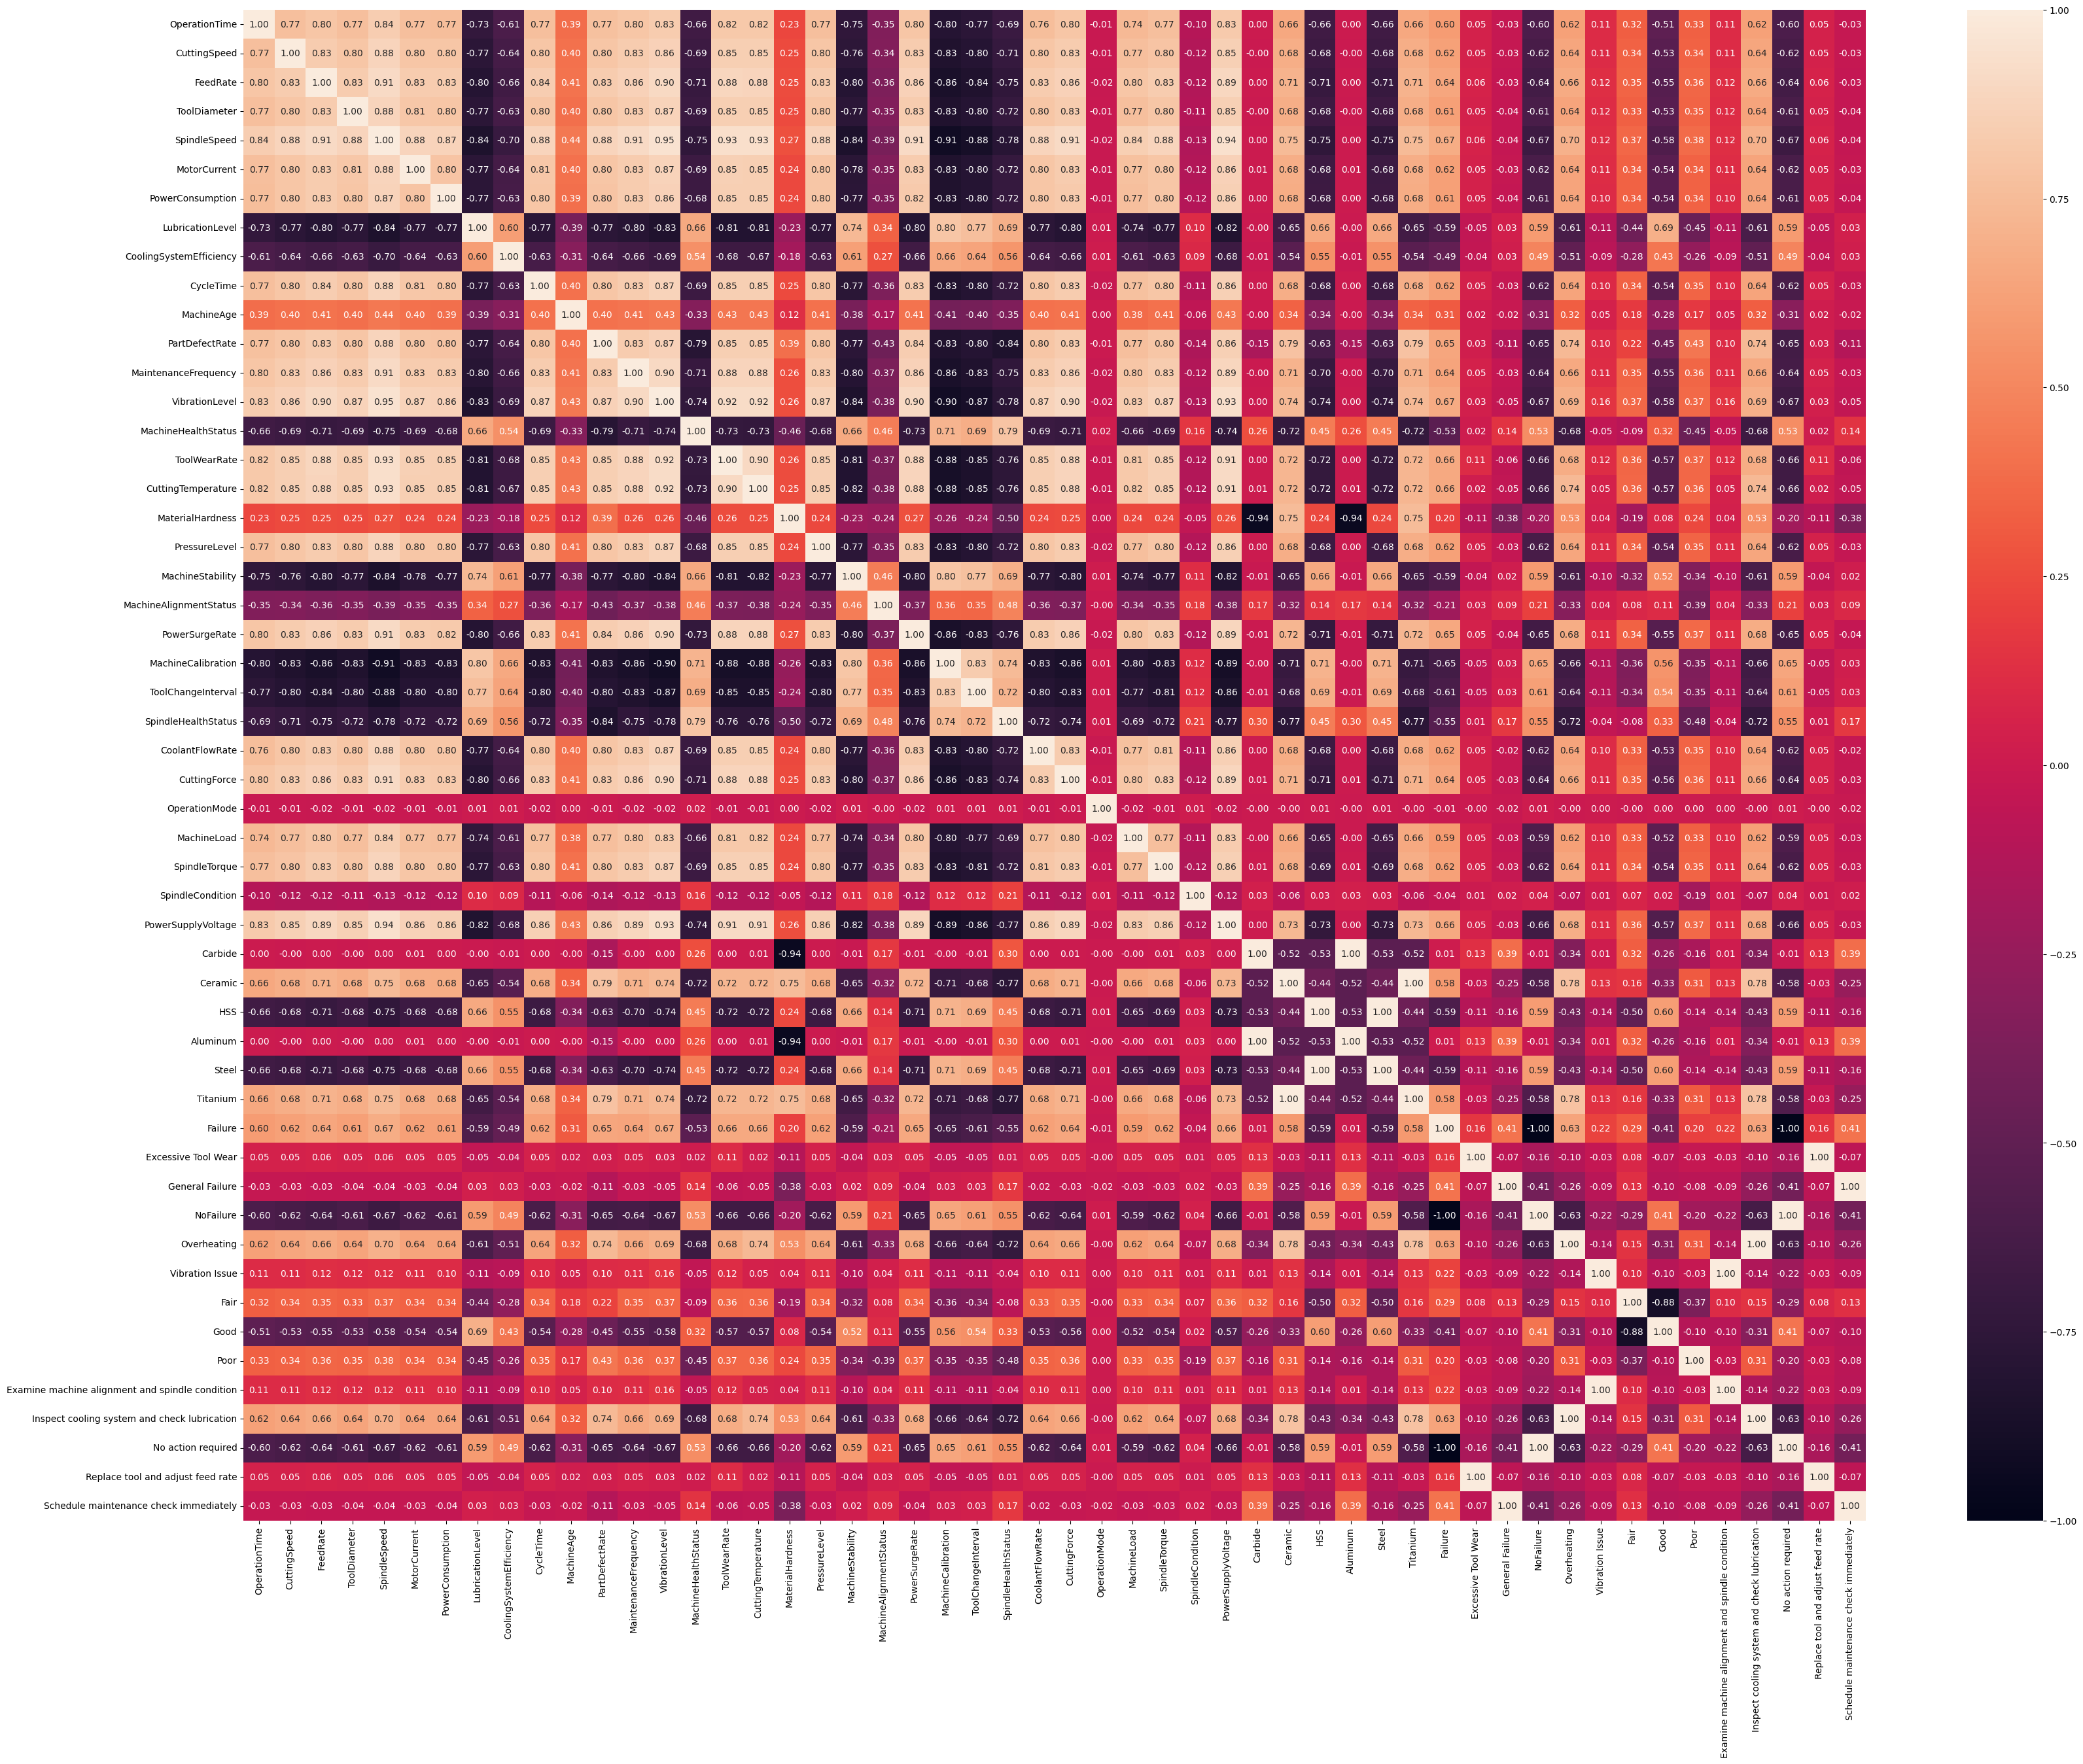

In [47]:
df_corr = df.corr()
plt.figure(figsize=(40,30))
sns.heatmap(df_corr, annot= True, fmt="0.2f")
plt.show()

In [48]:
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [49]:
columns = df.columns

C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1812208107.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1812208107.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1812208107.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Suriya\AppData\Local\Temp\ipykernel

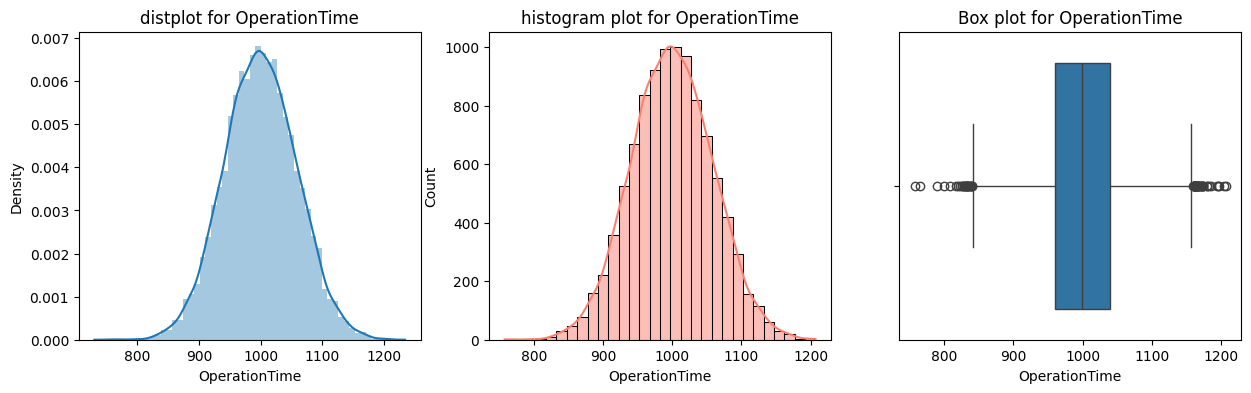

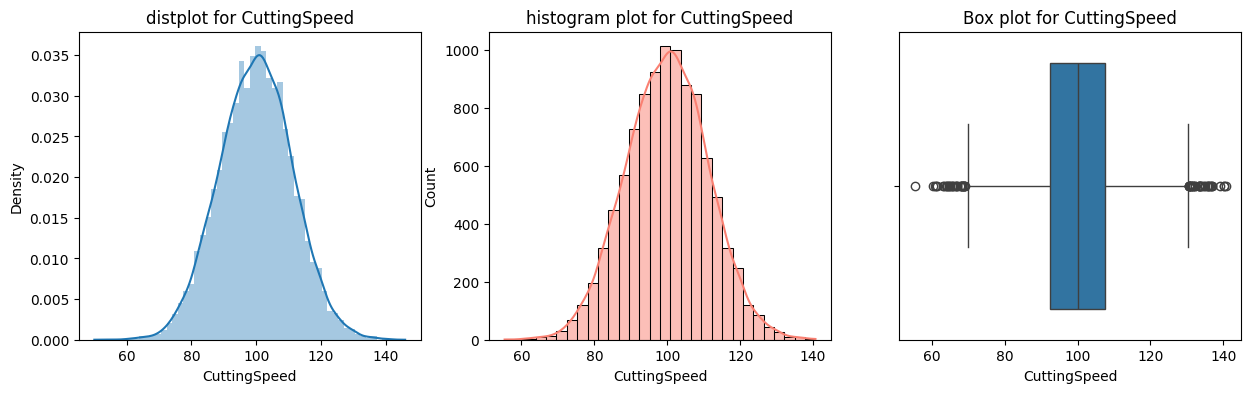

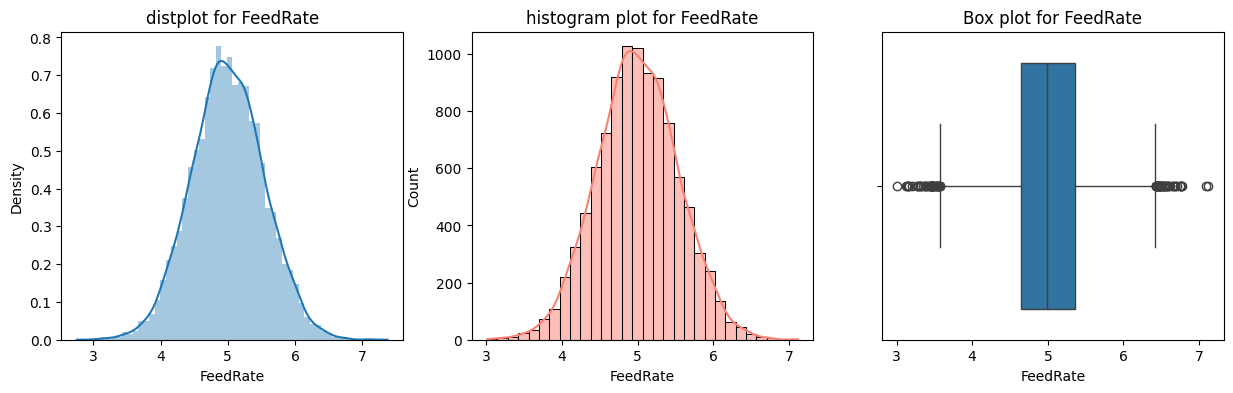

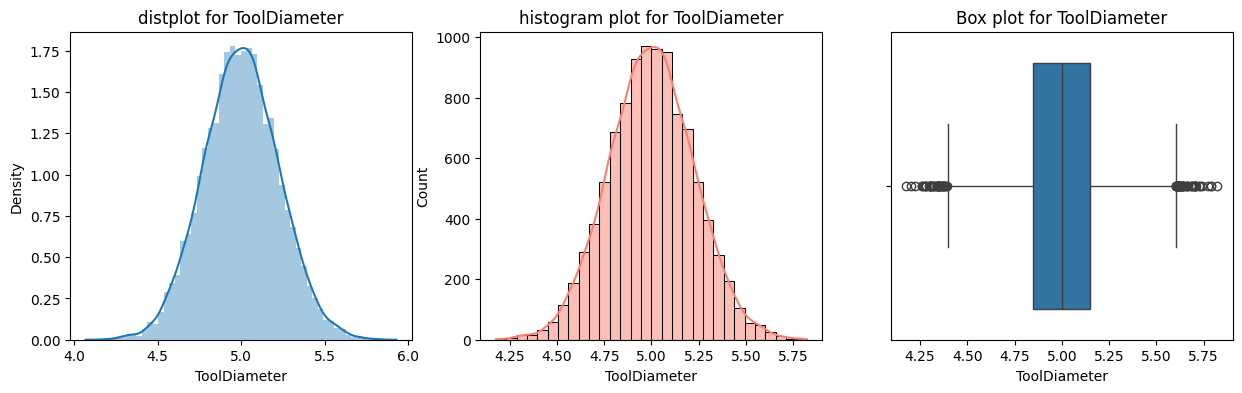

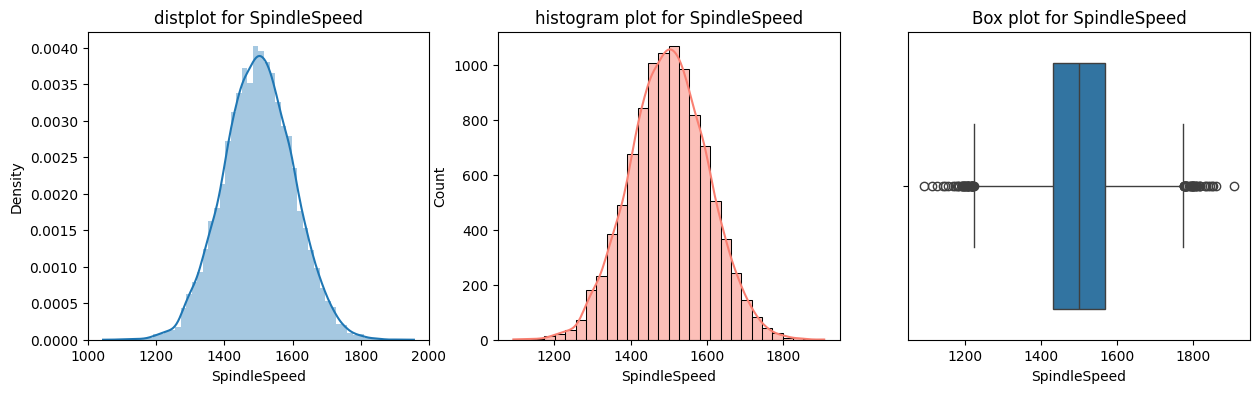

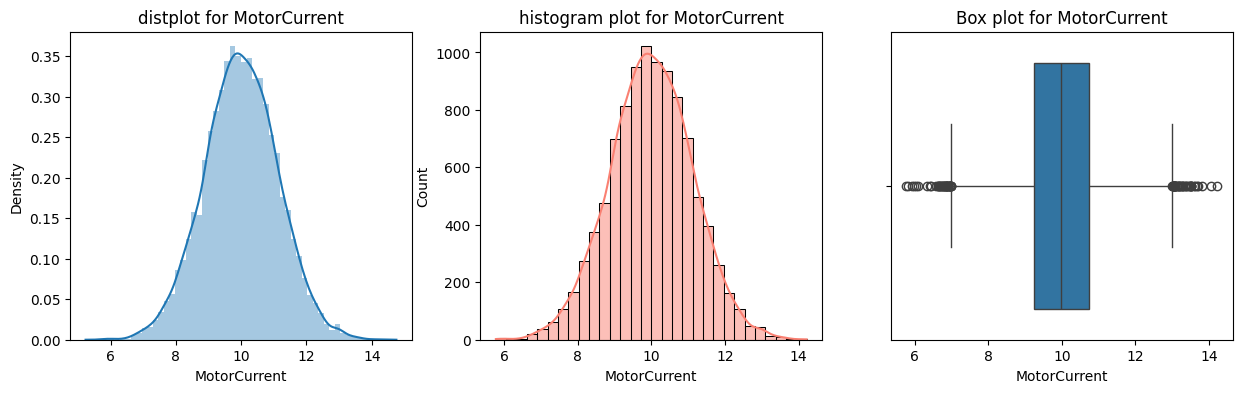

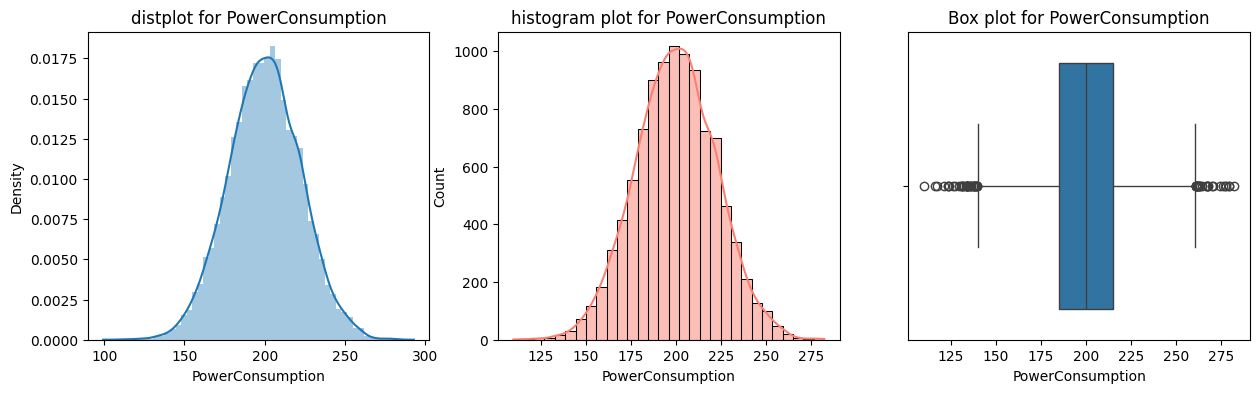

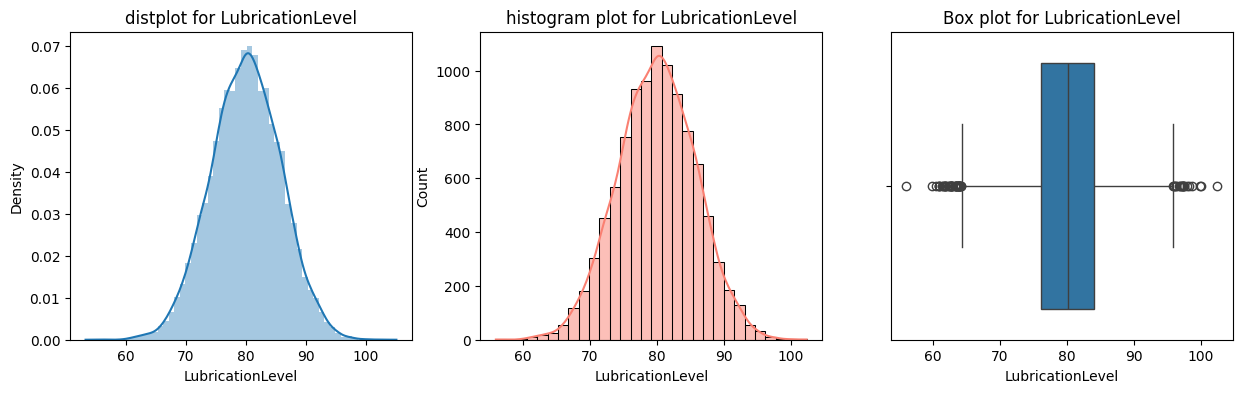

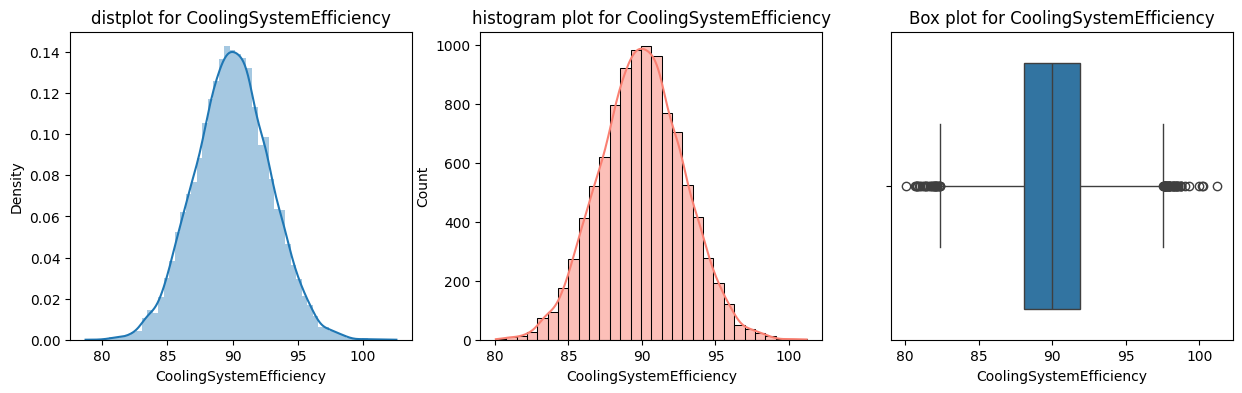

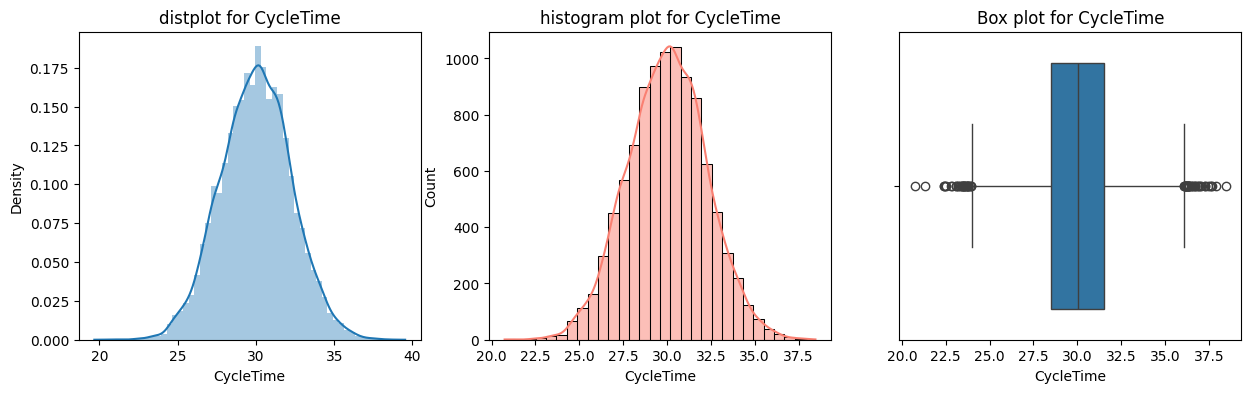

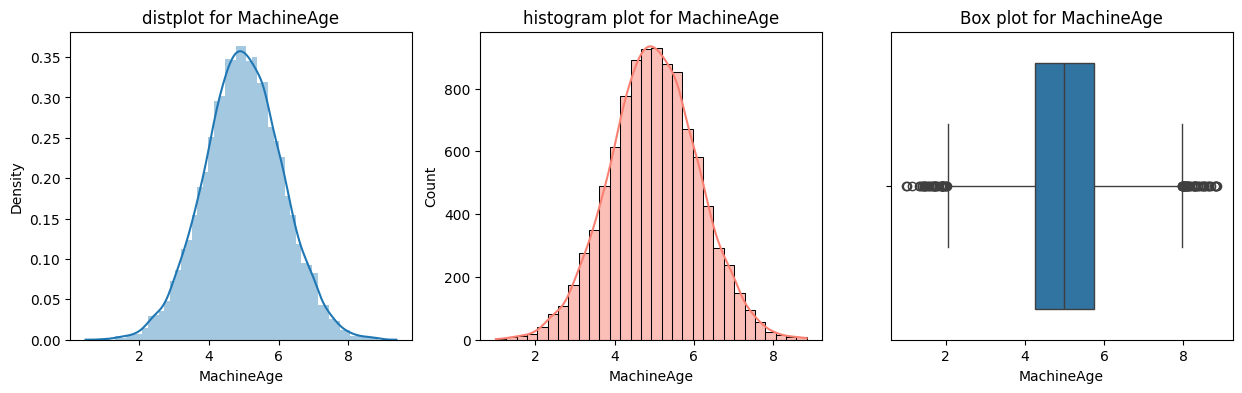

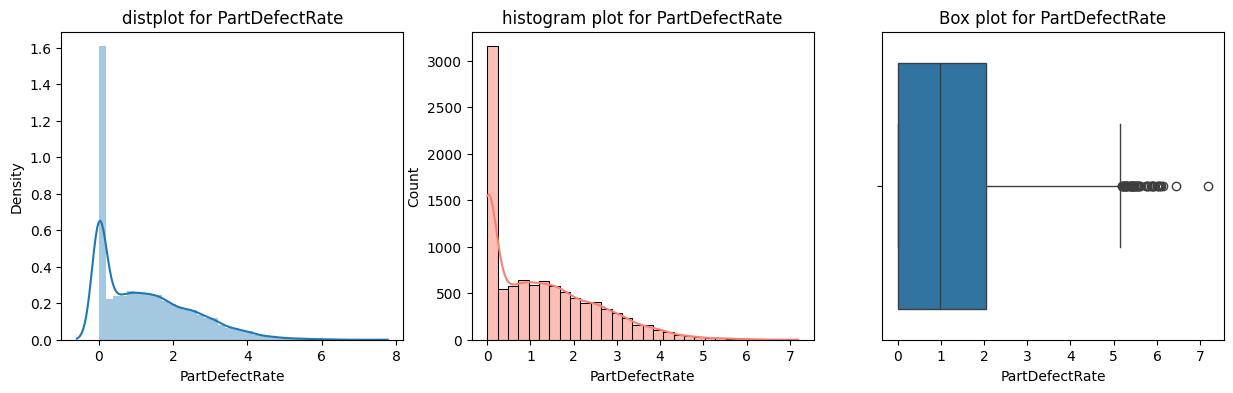

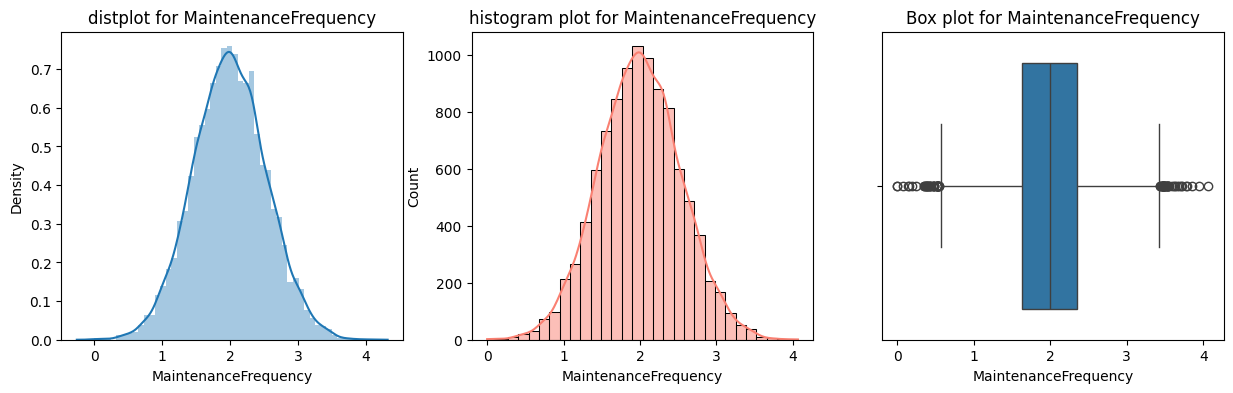

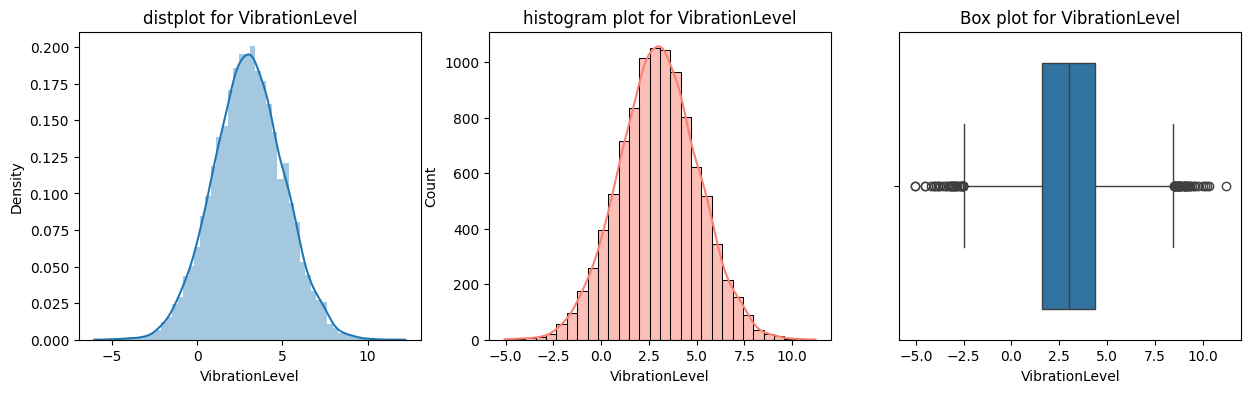

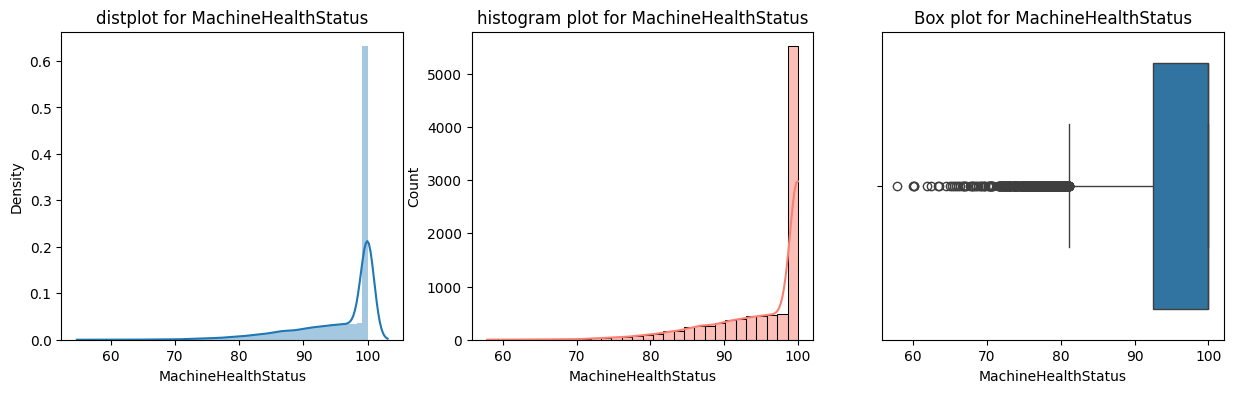

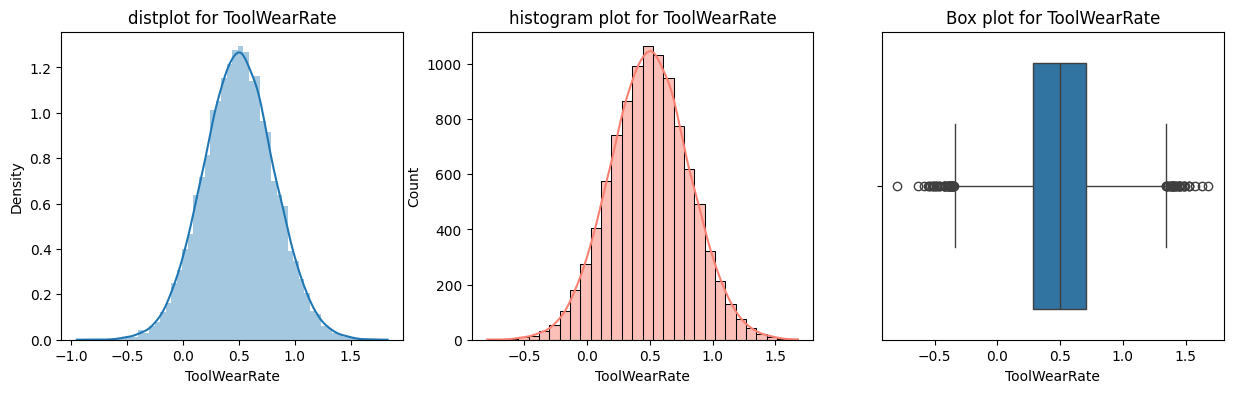

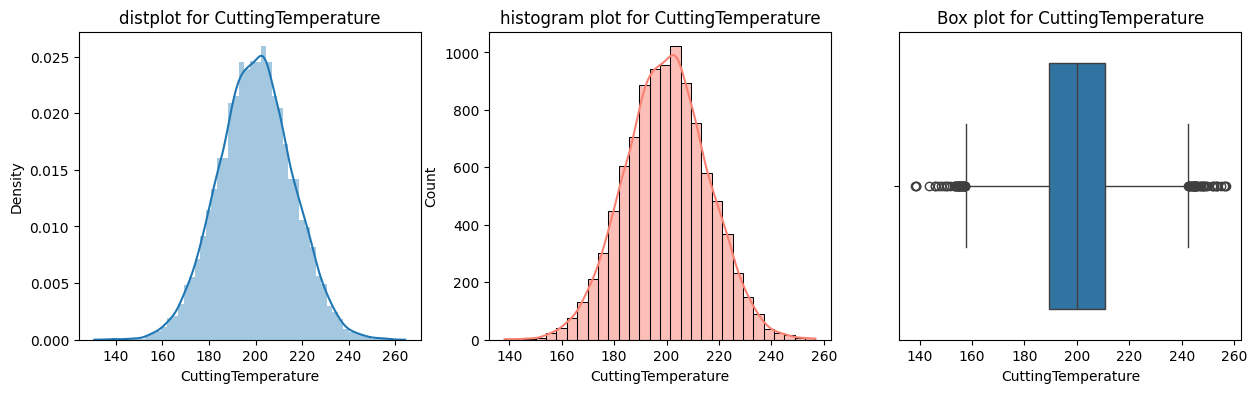

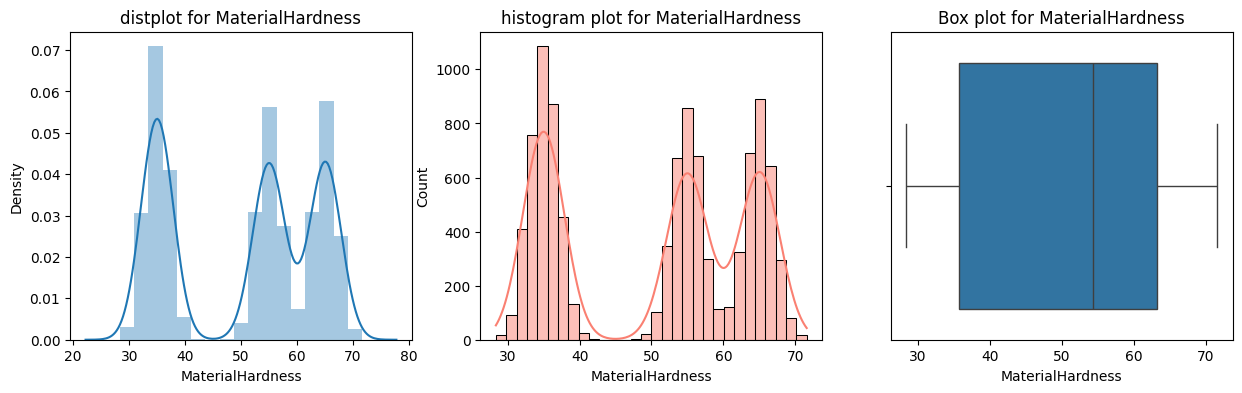

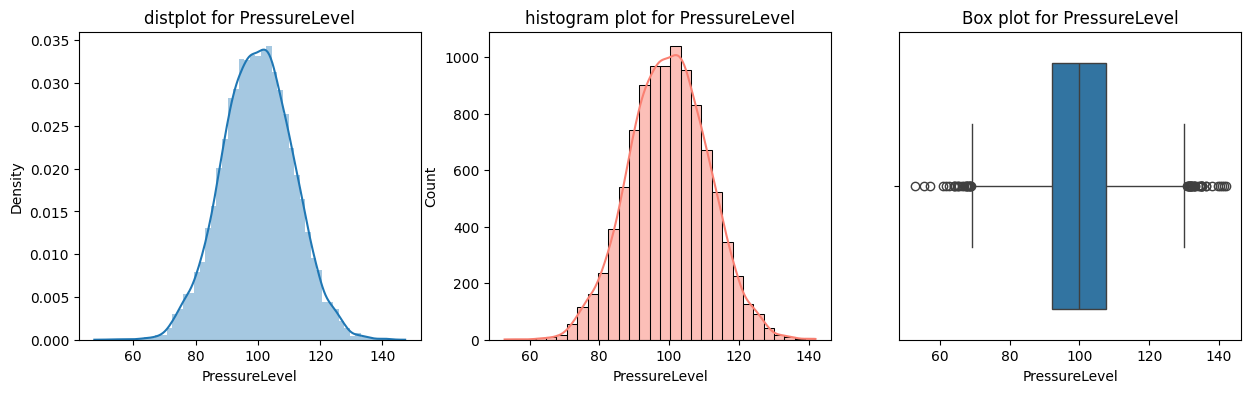

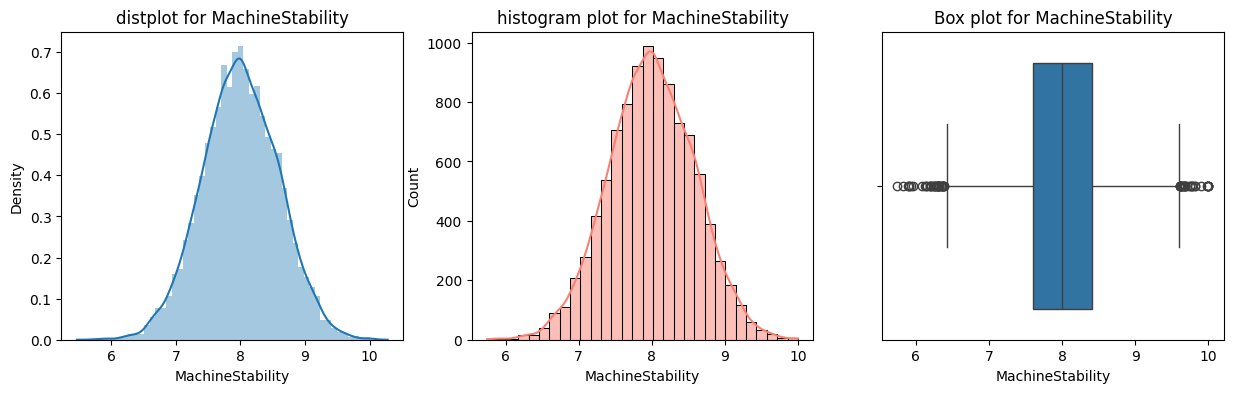

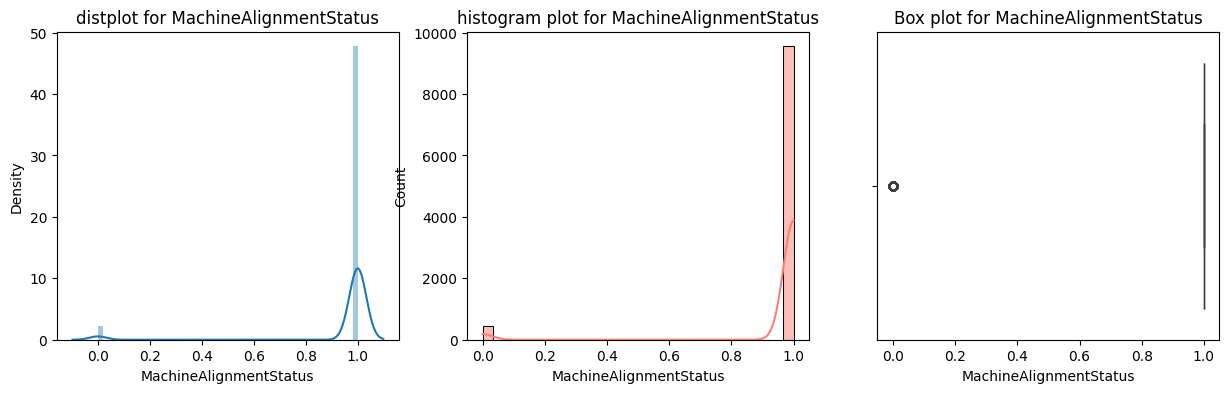

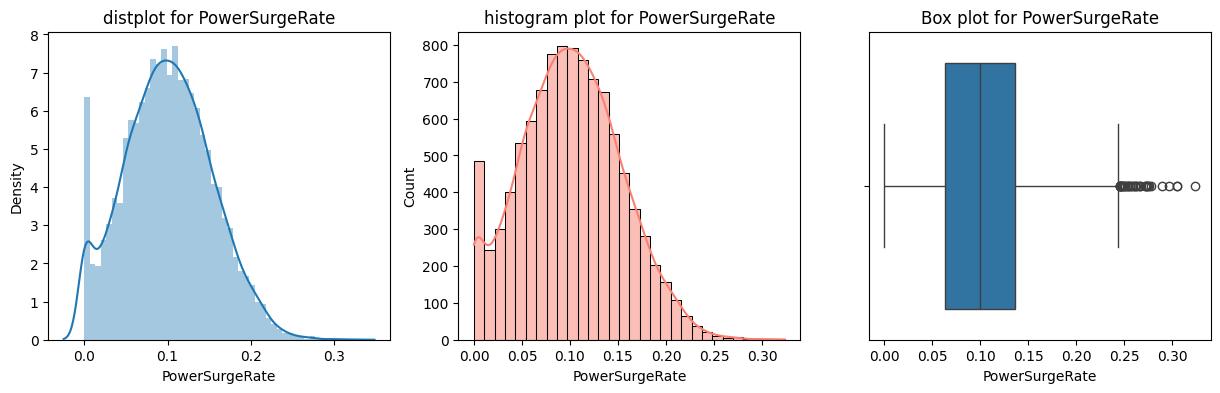

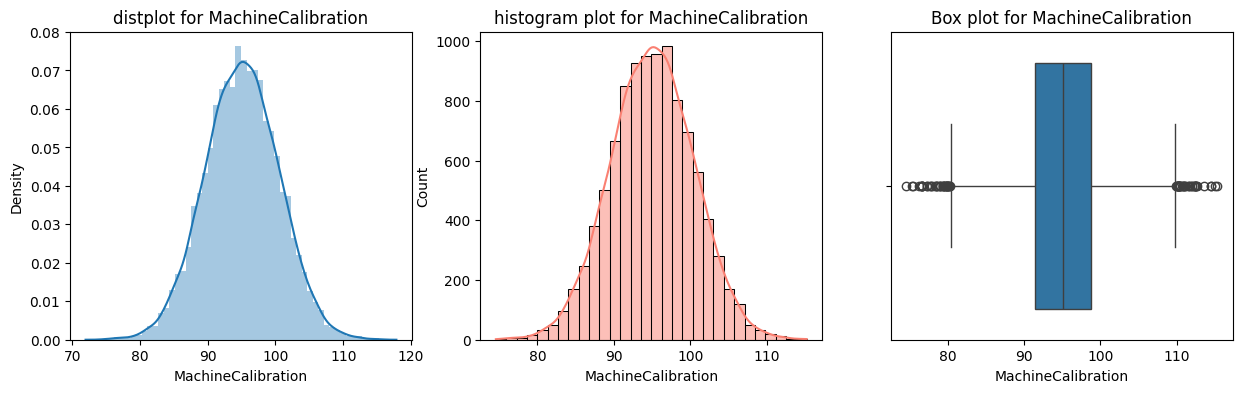

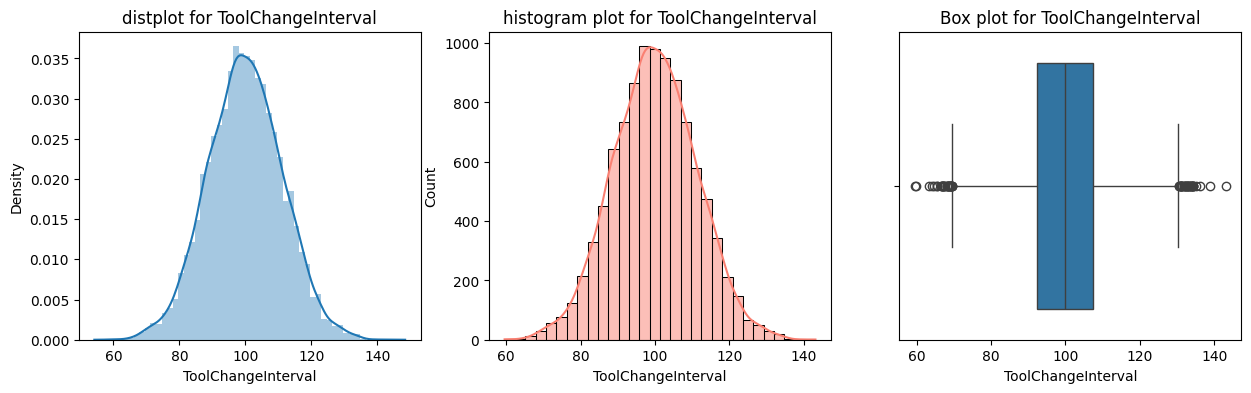

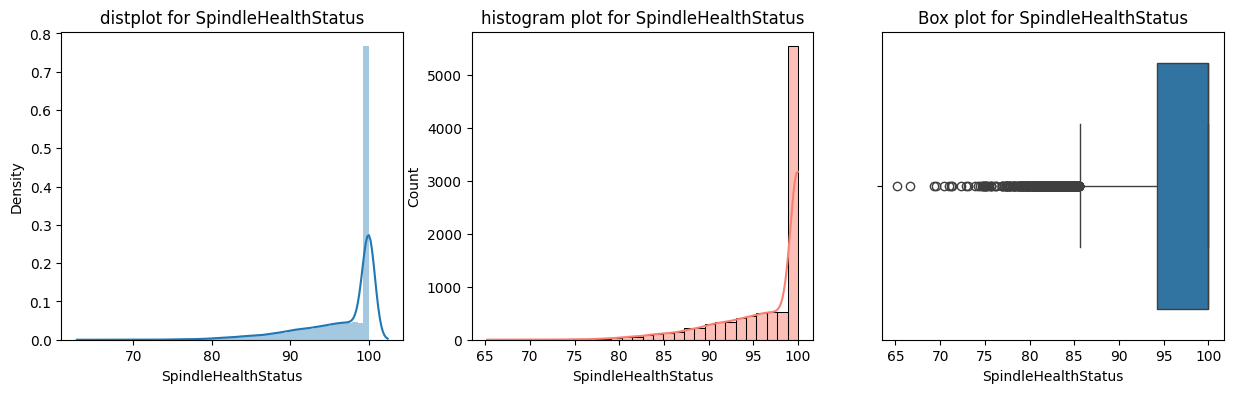

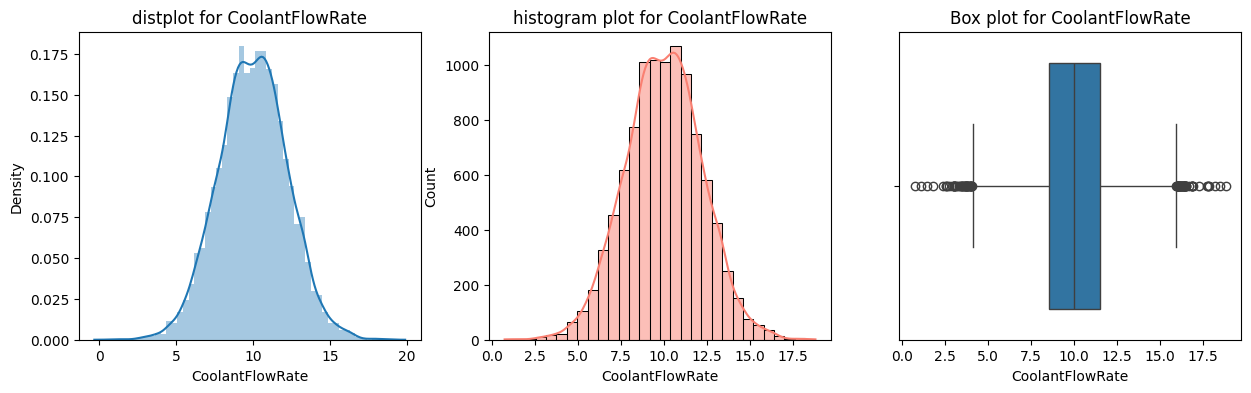

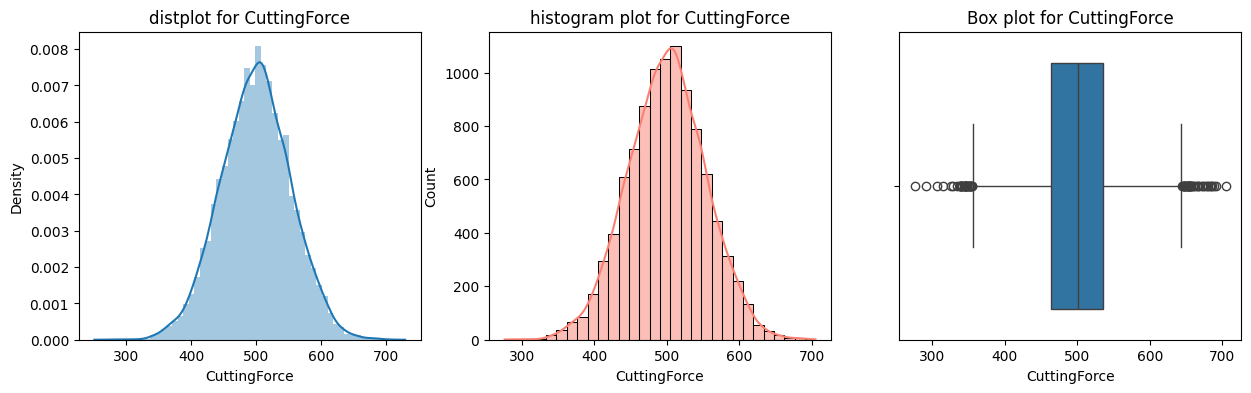

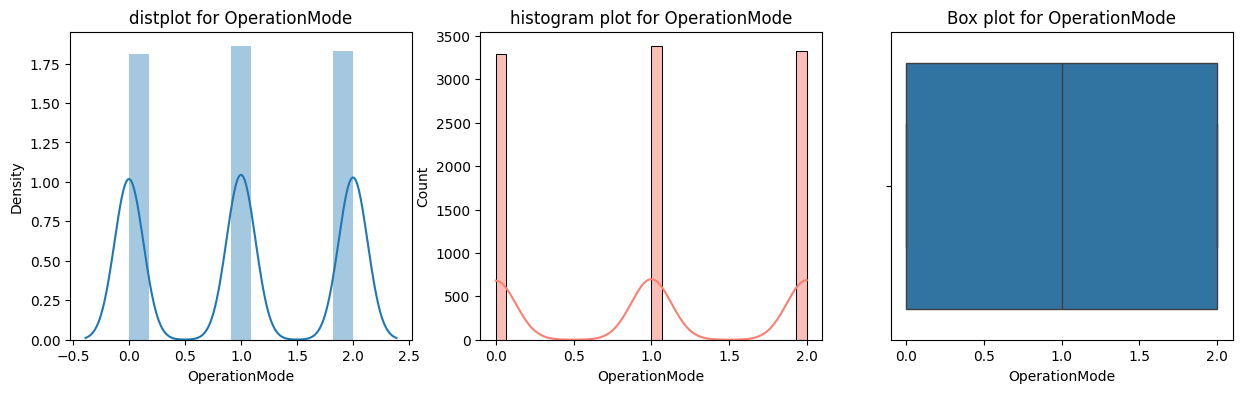

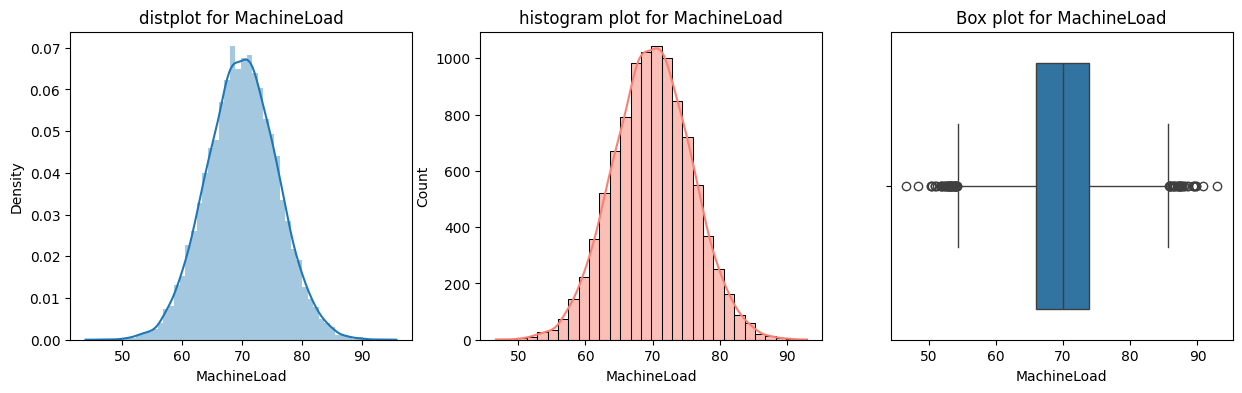

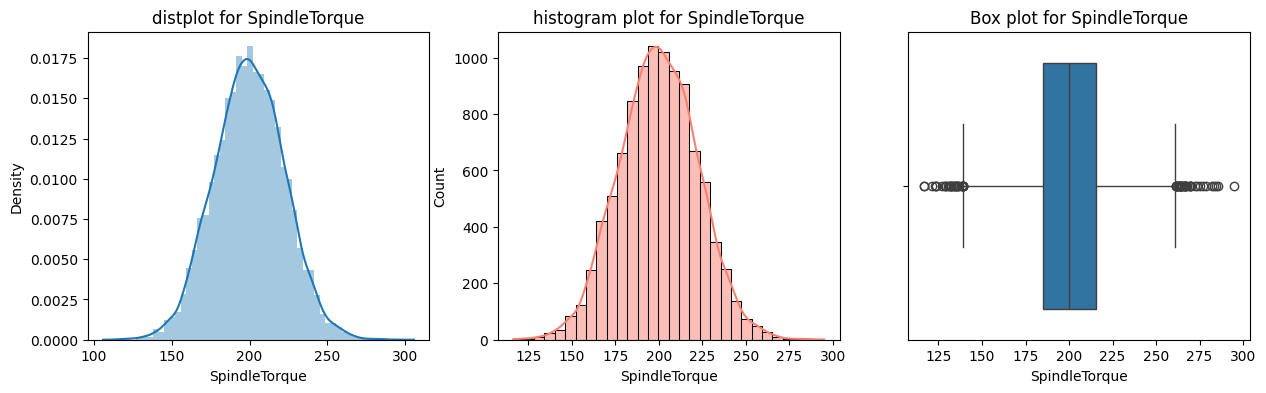

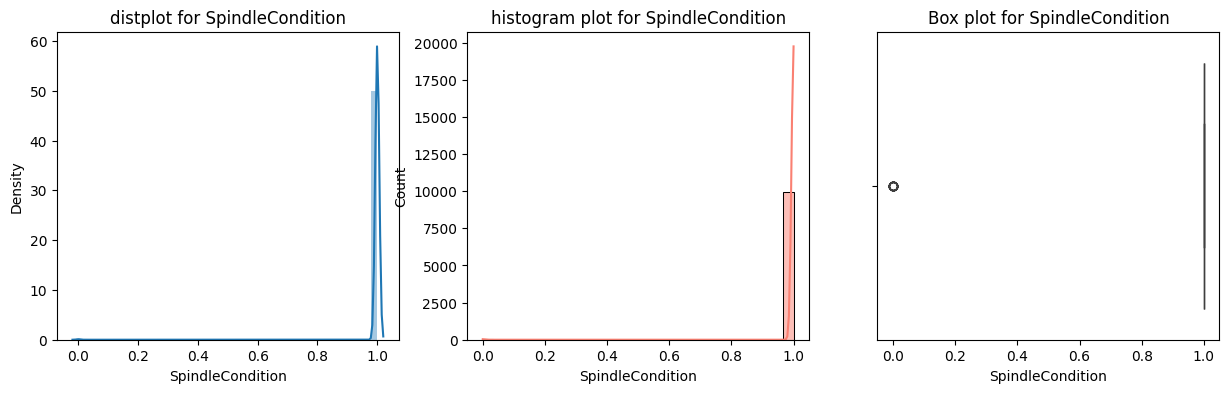

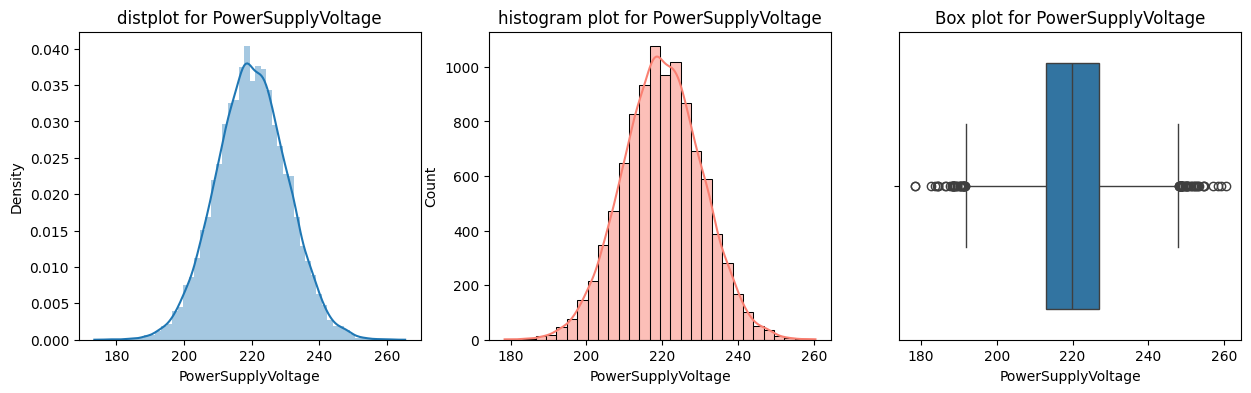

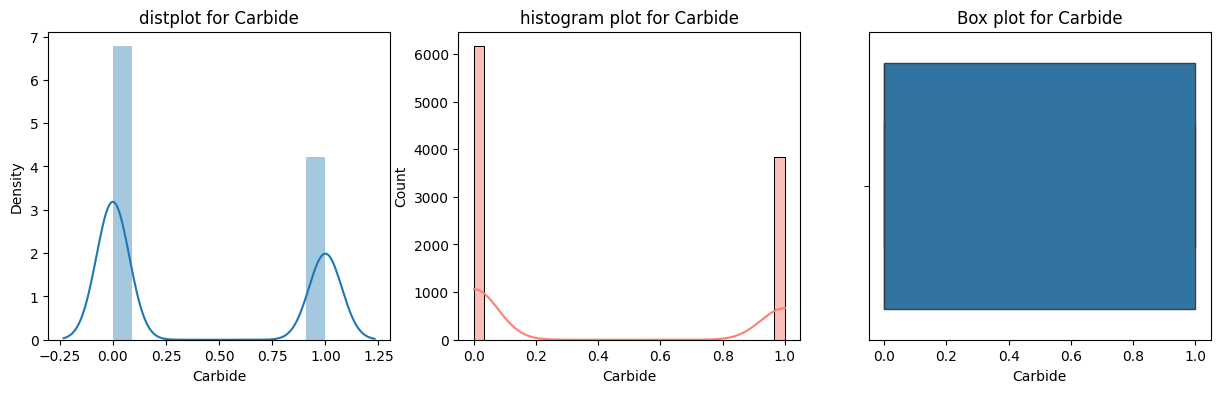

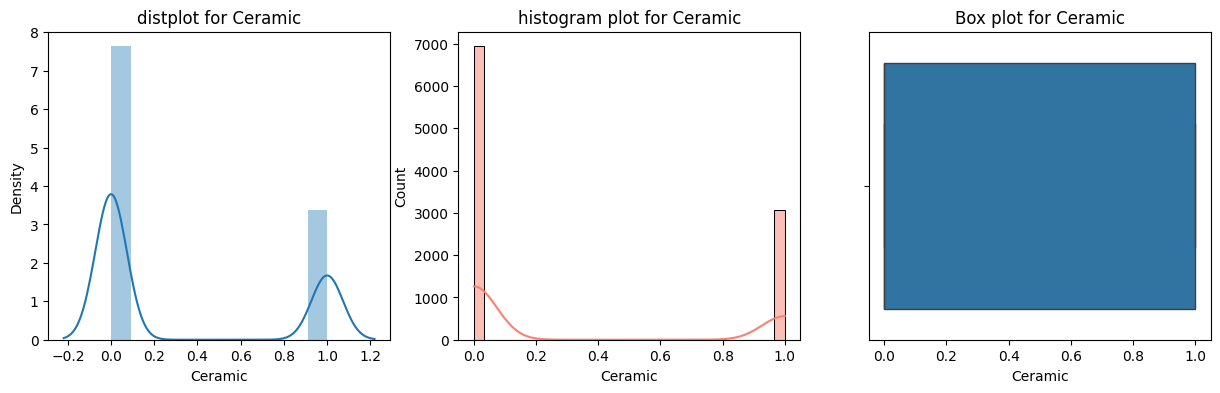

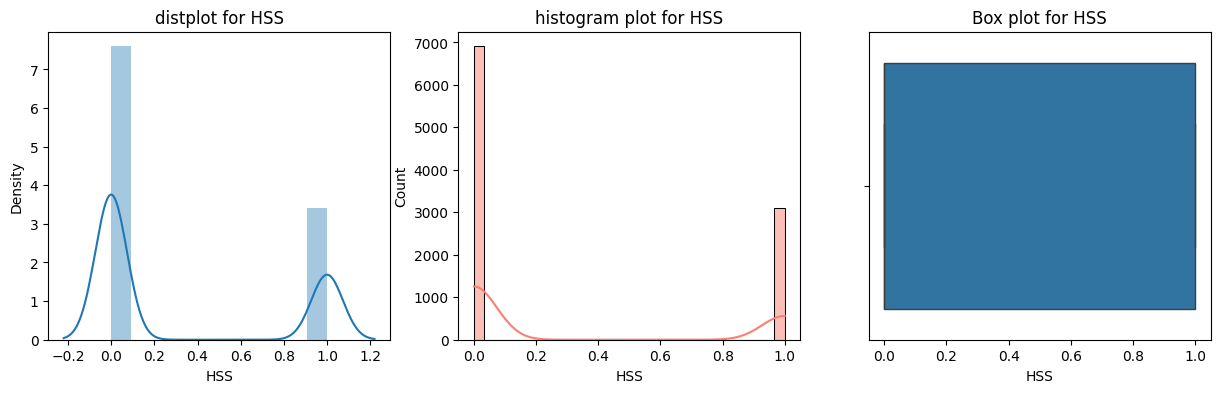

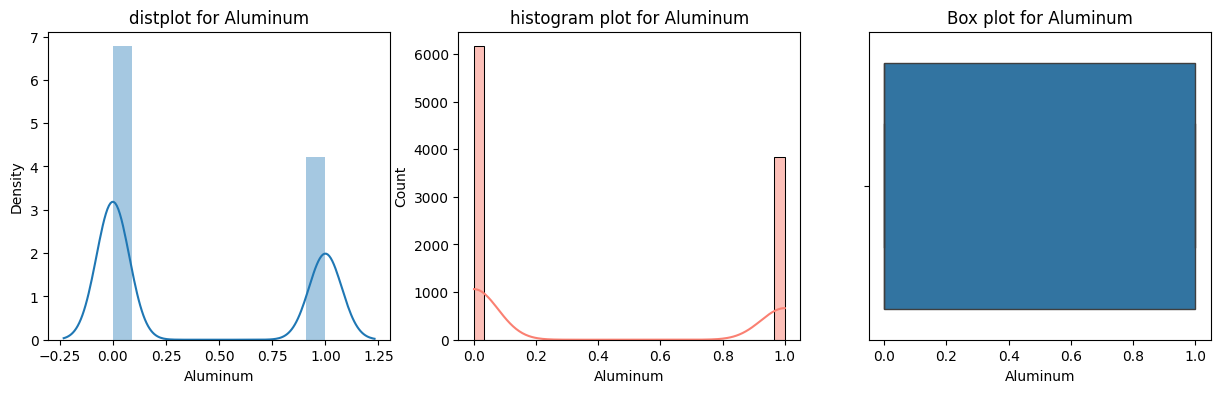

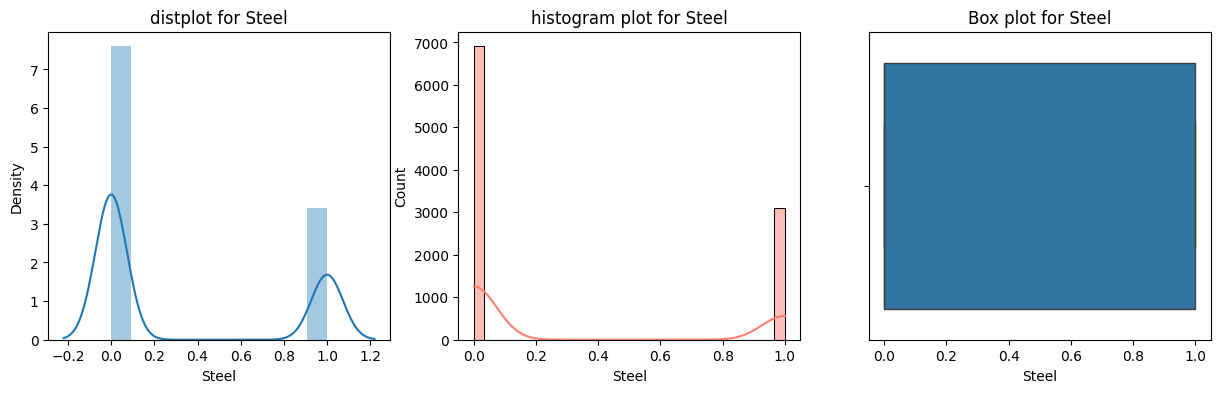

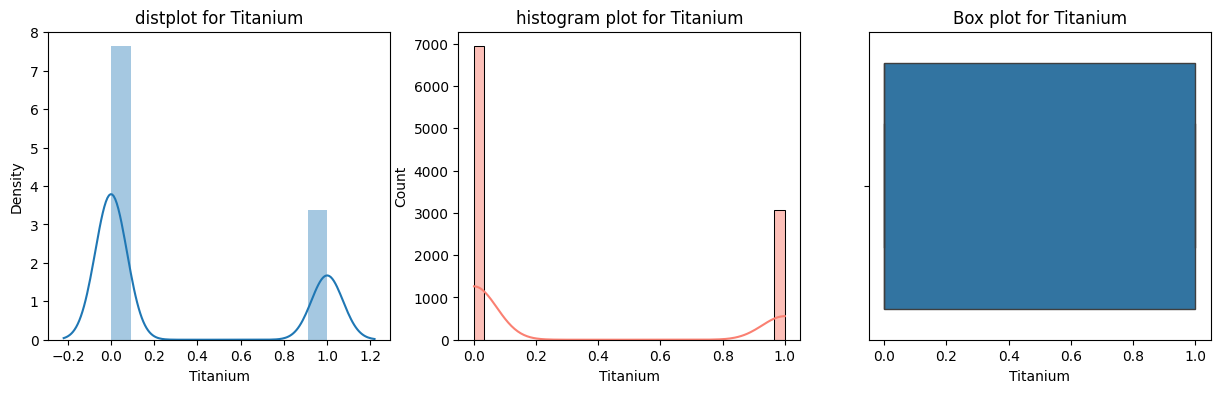

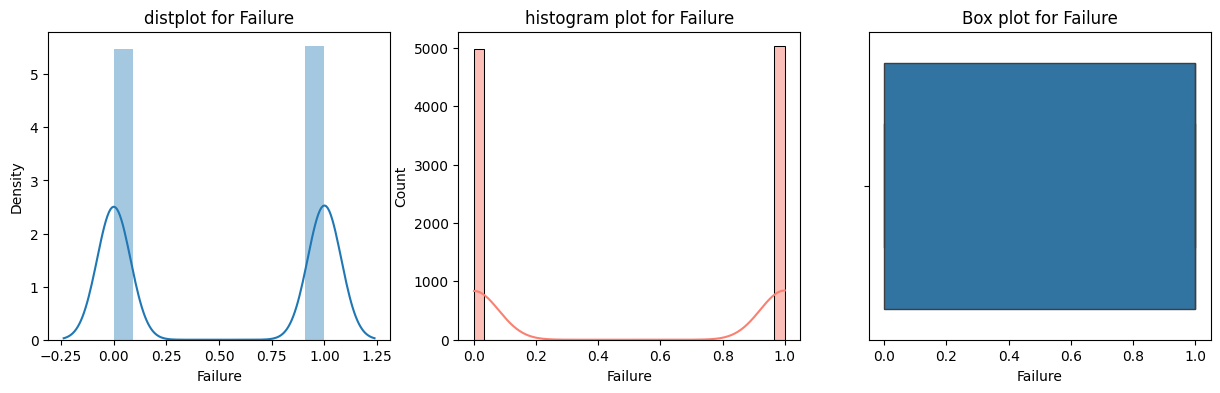

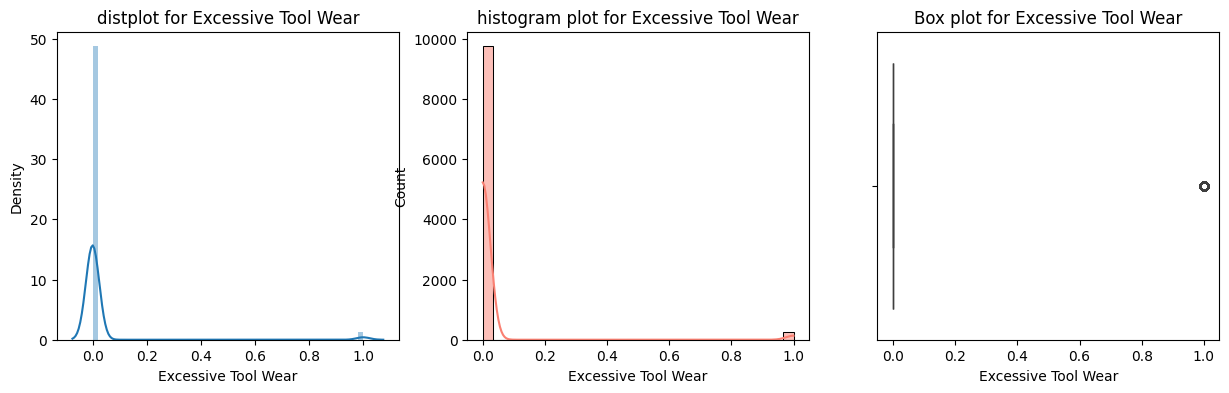

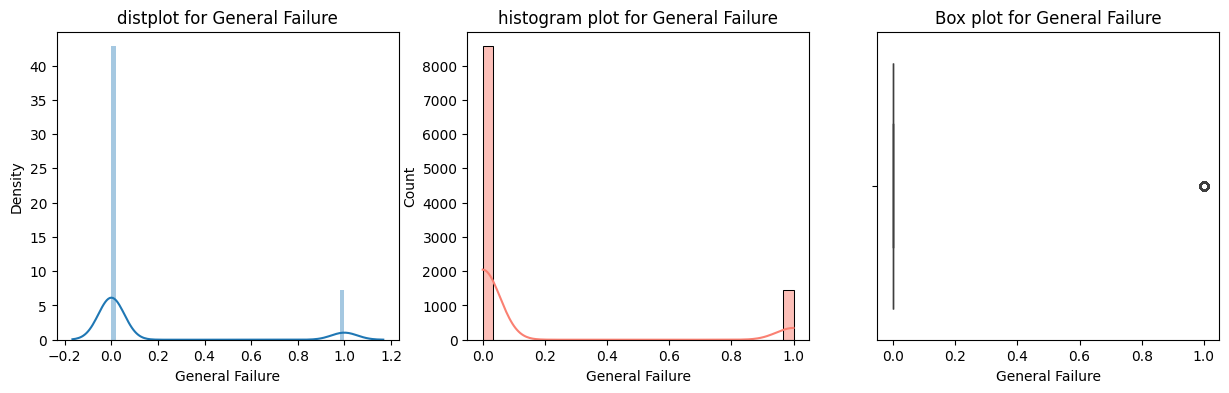

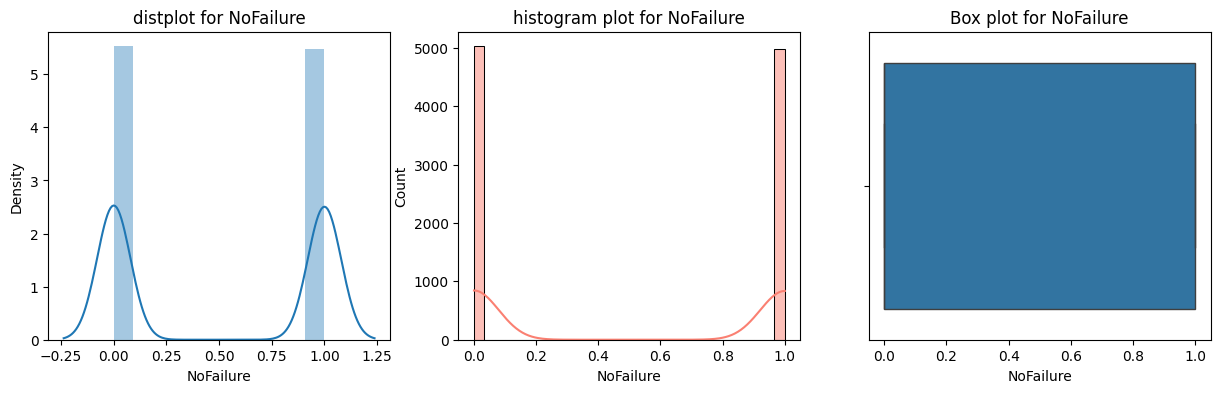

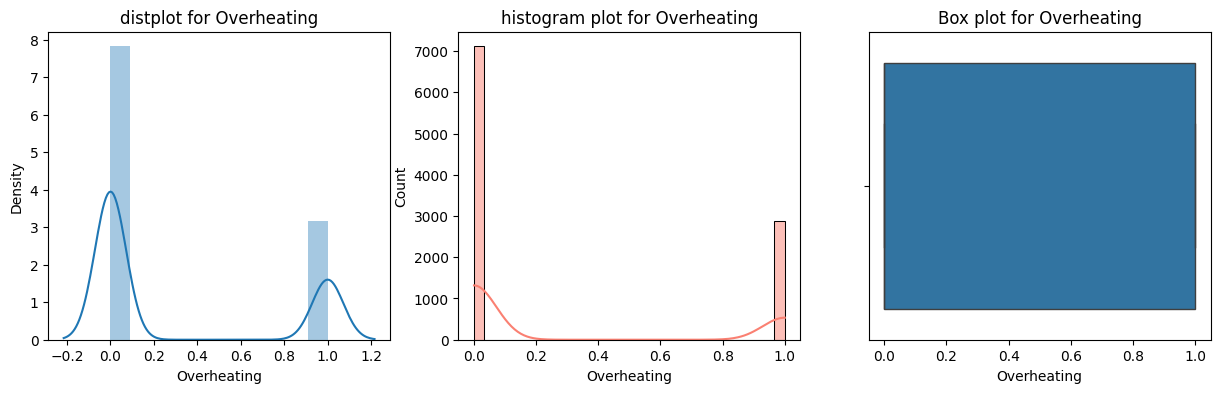

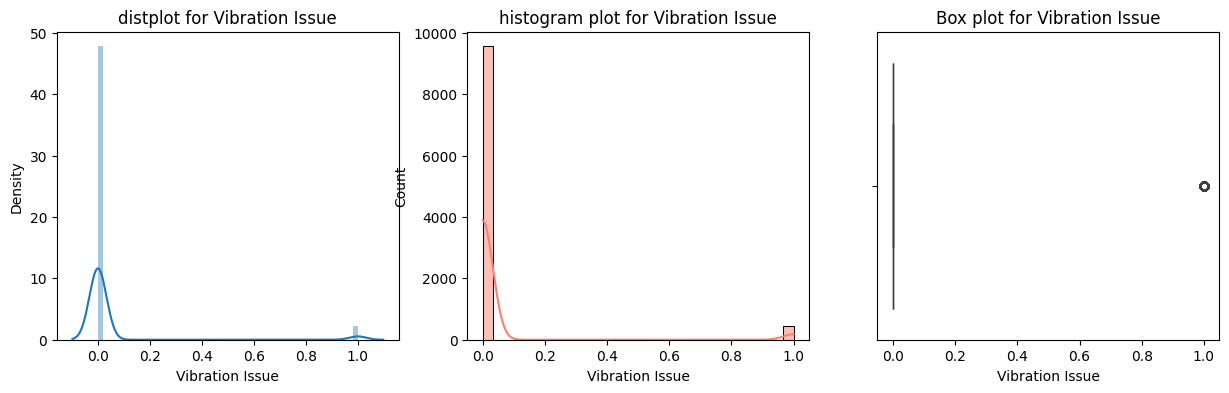

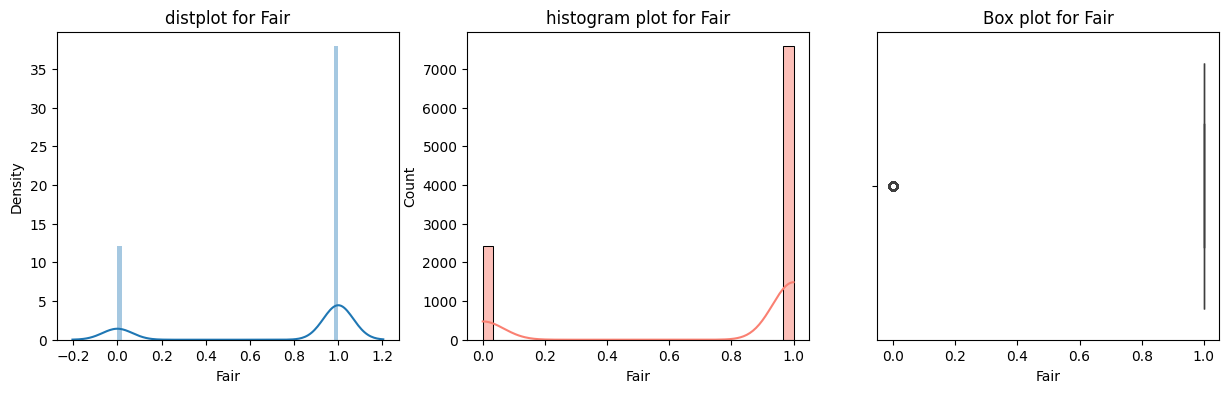

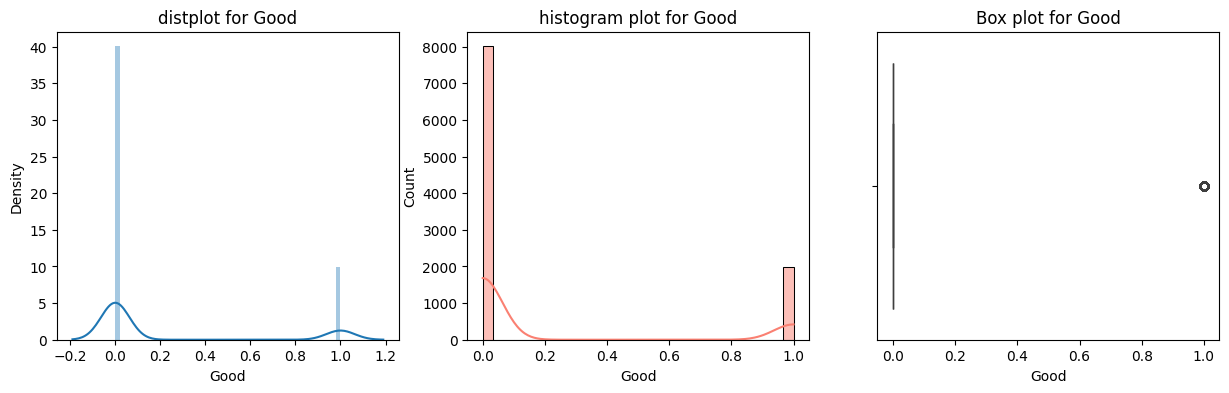

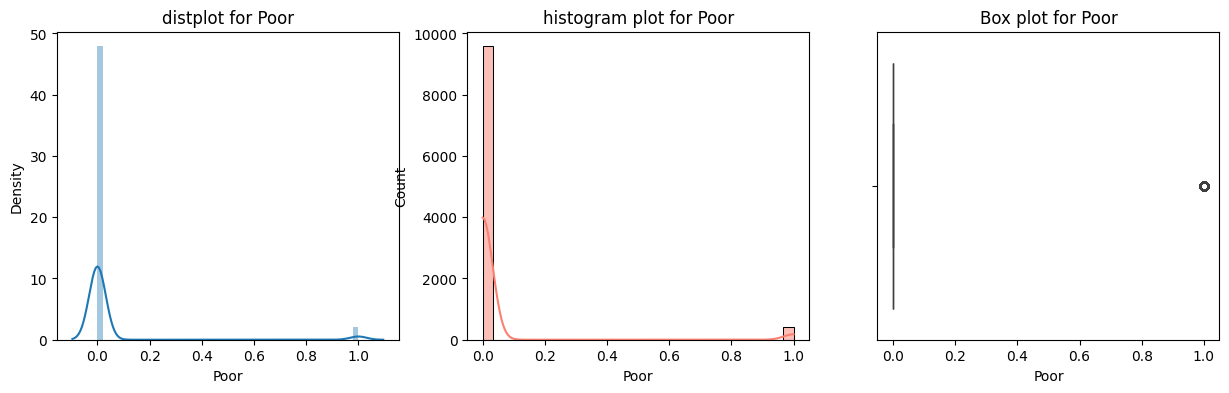

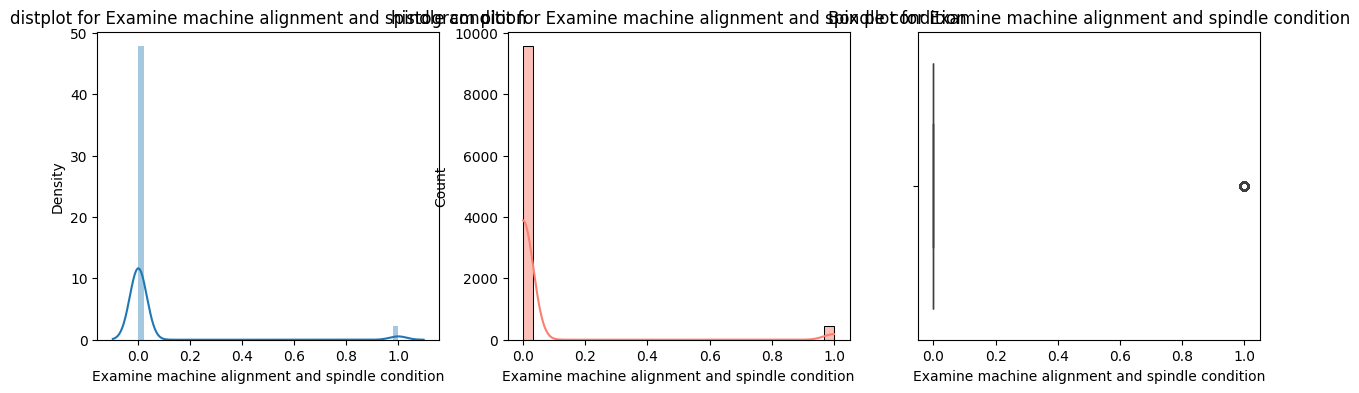

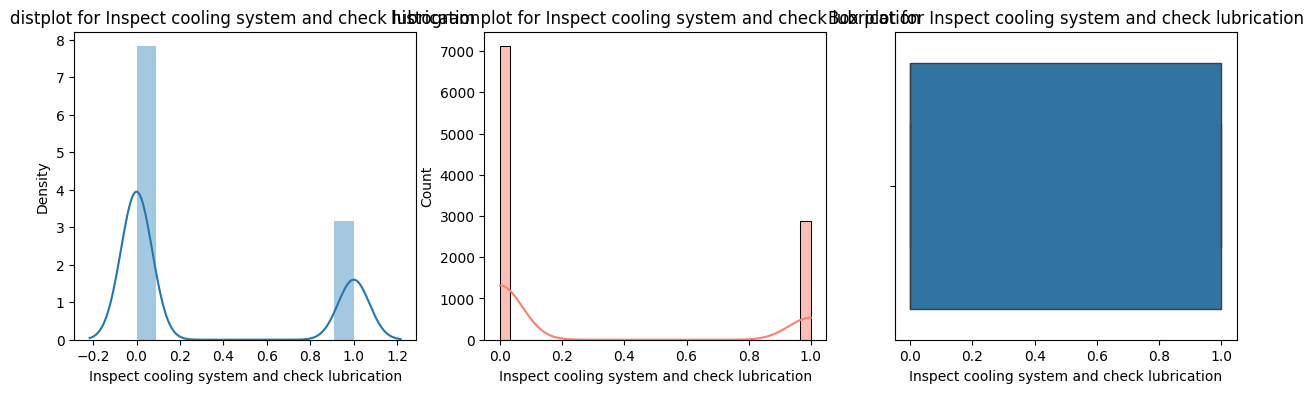

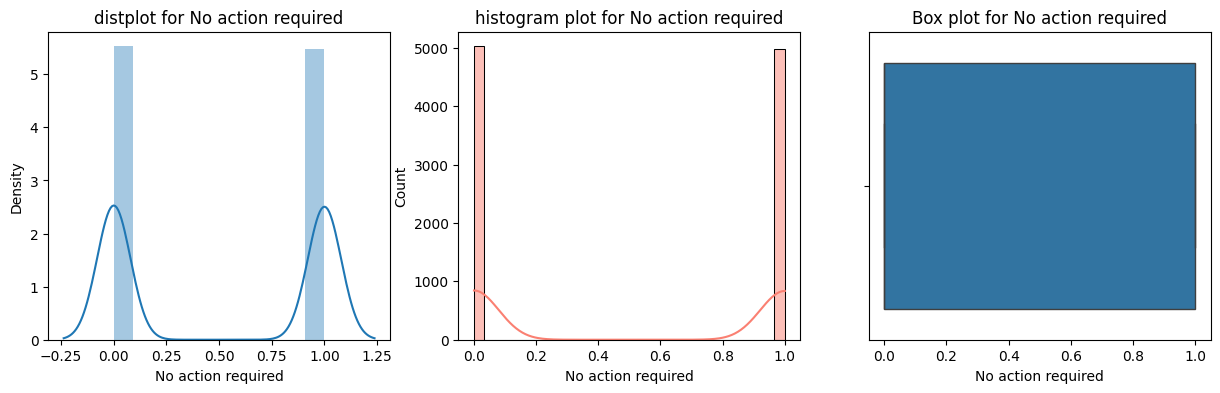

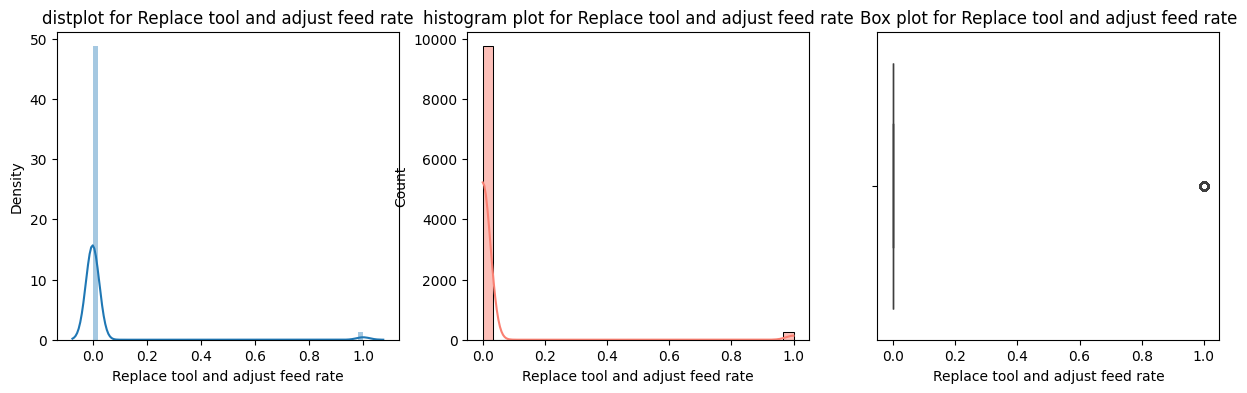

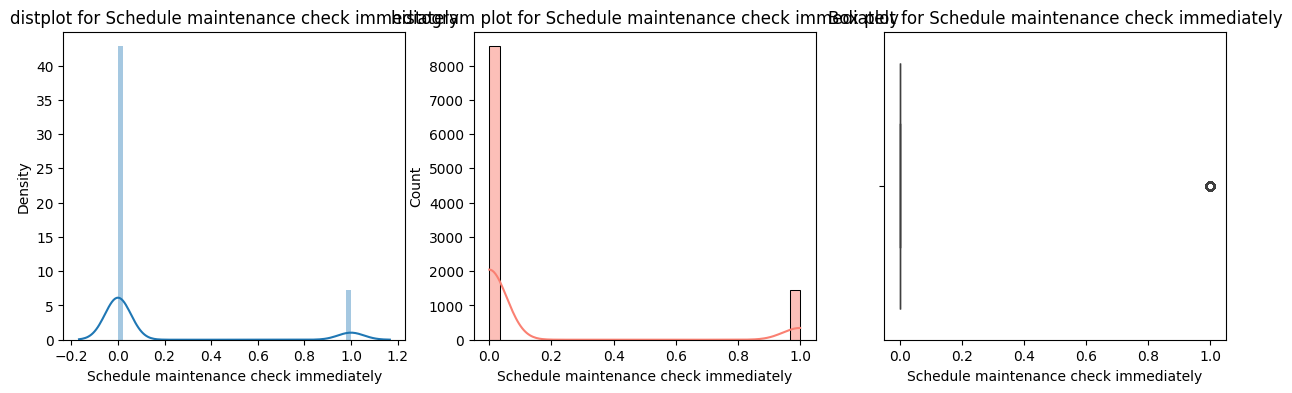

In [50]:
for i in columns:
    plot(df,i)

In [56]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [57]:
outlier_columns = ['OperationTime', 'CuttingSpeed', 'FeedRate', 'ToolDiameter',
       'SpindleSpeed', 'MotorCurrent', 'PowerConsumption', 'LubricationLevel',
       'CoolingSystemEfficiency', 'MachineHealthStatus','CycleTime','SpindleHealthStatus', 'MachineAge','PartDefectRate','MaintenanceFrequency','VibrationLevel','ToolWearRate','CuttingTemperature','PressureLevel','MachineStability','PowerSurgeRate', 'MachineCalibration', 'ToolChangeInterval',
       'CoolantFlowRate', 'CuttingForce', 'MachineLoad', 'SpindleTorque',
       'PowerSupplyVoltage']
for i in outlier_columns:
  outlier(df,i)

C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1812208107.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Suriya\AppData\Local\Temp\ipykernel_22624\1812208107.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\Suriya\AppData\Local\Temp\ipykernel

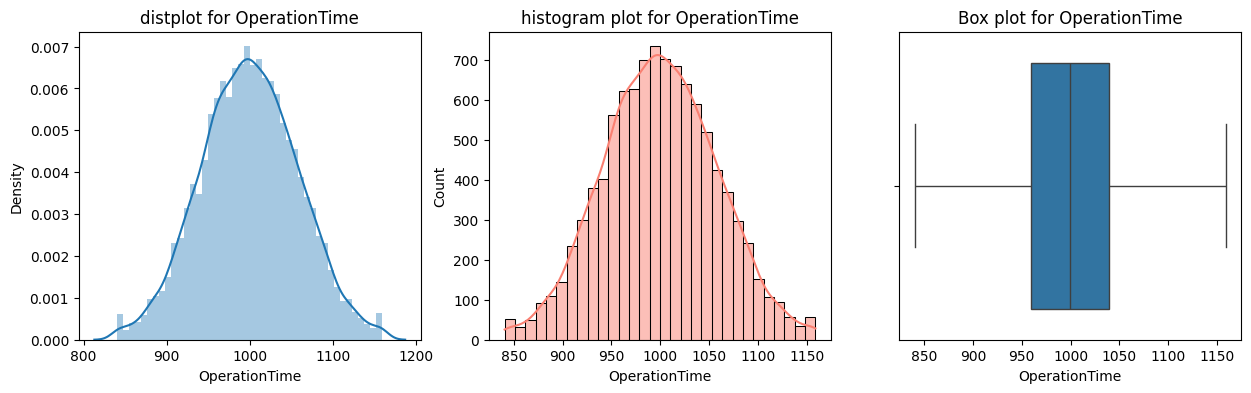

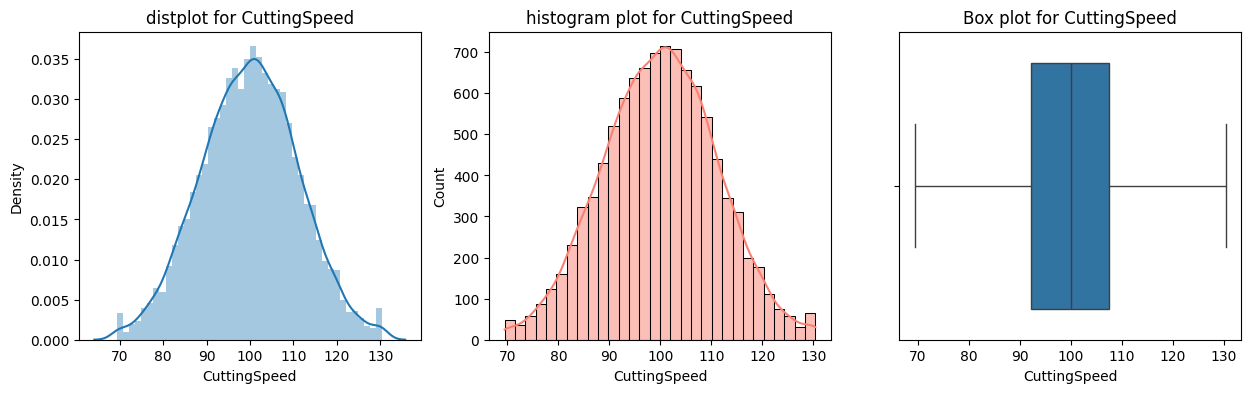

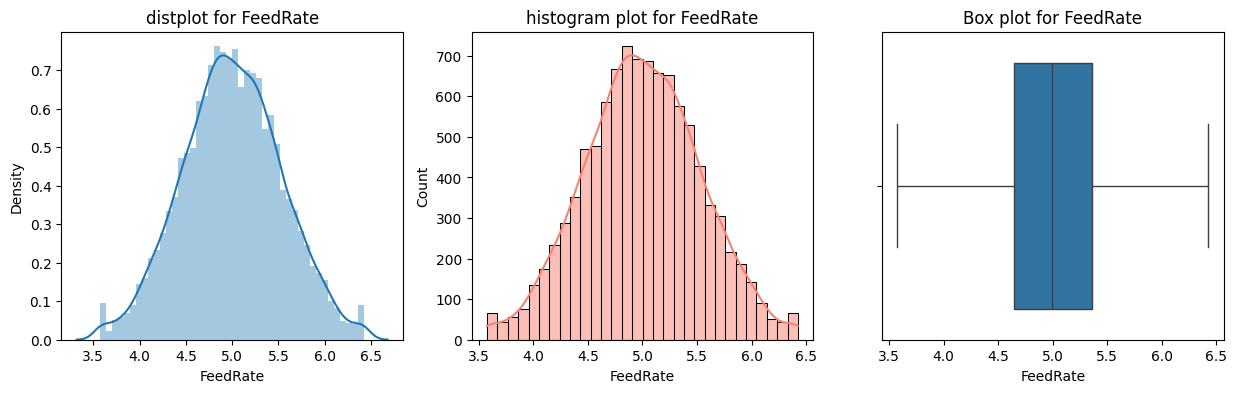

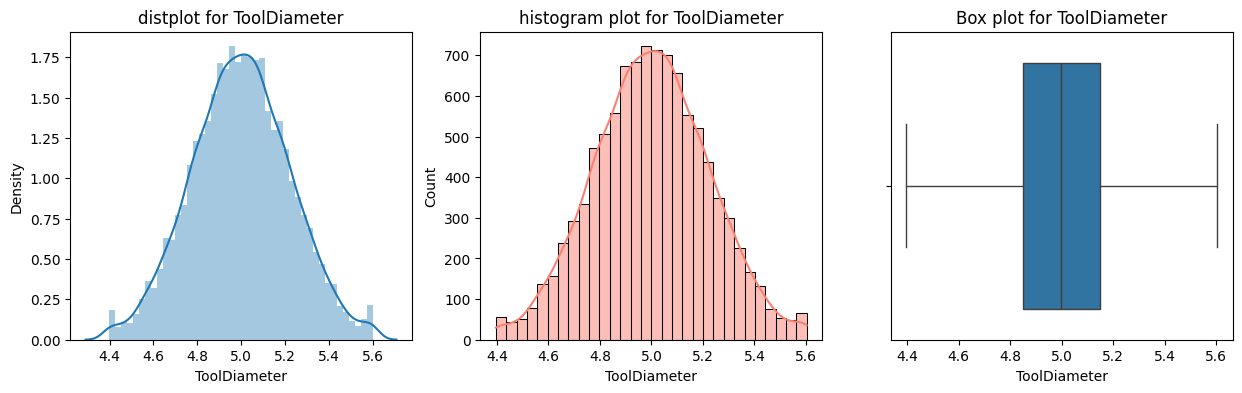

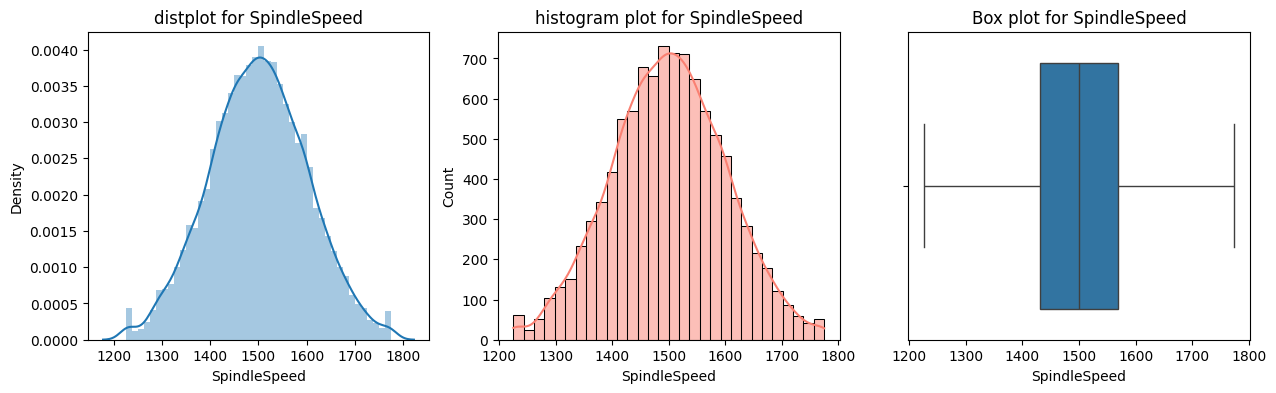

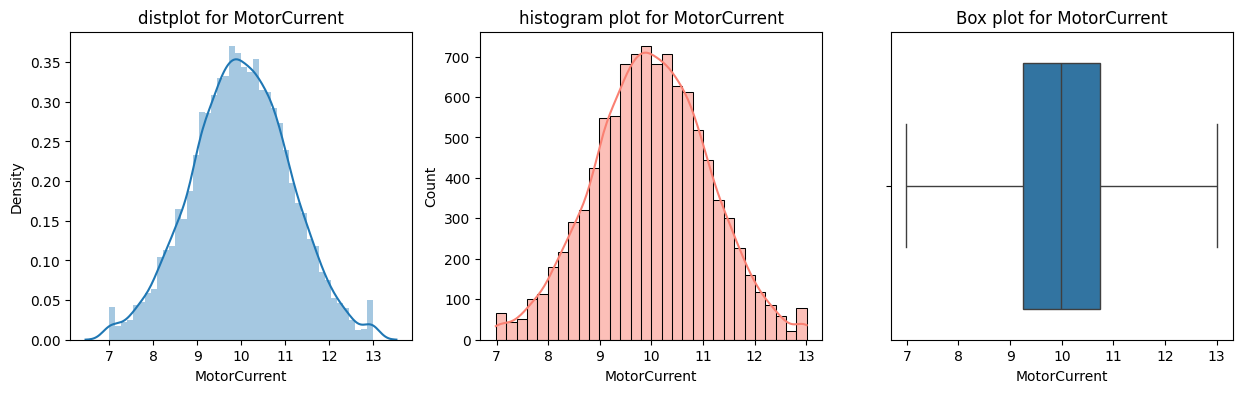

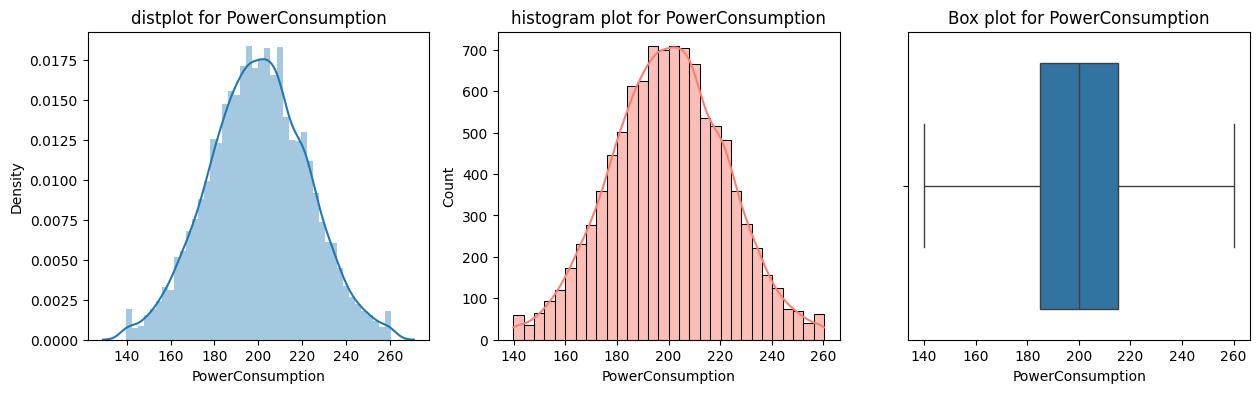

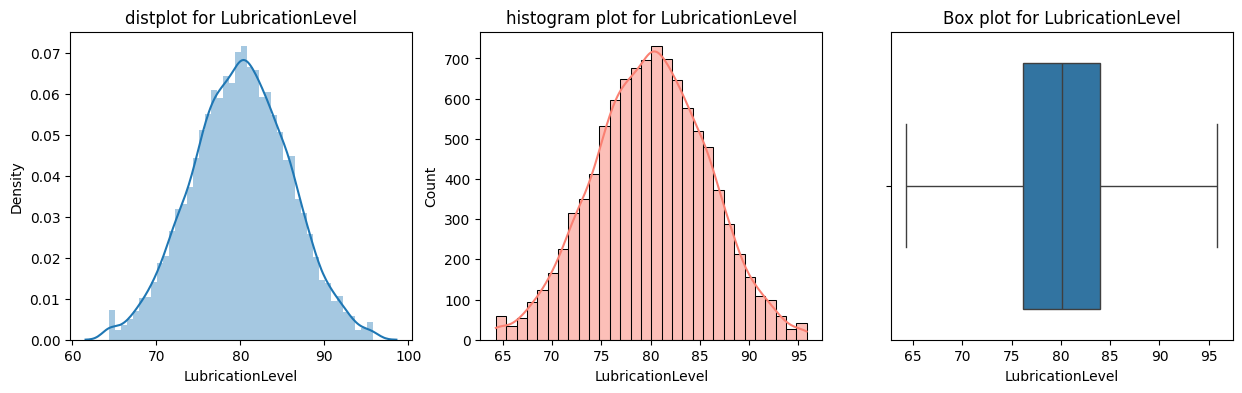

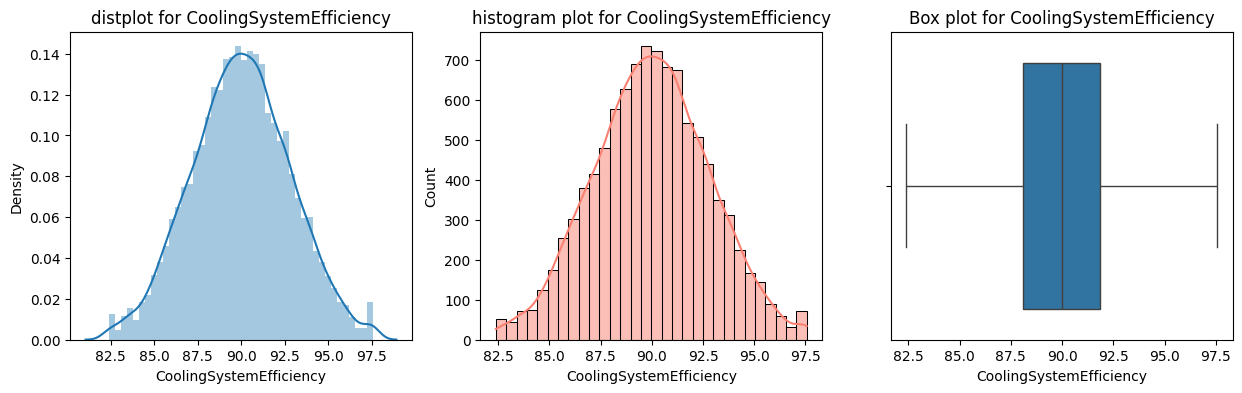

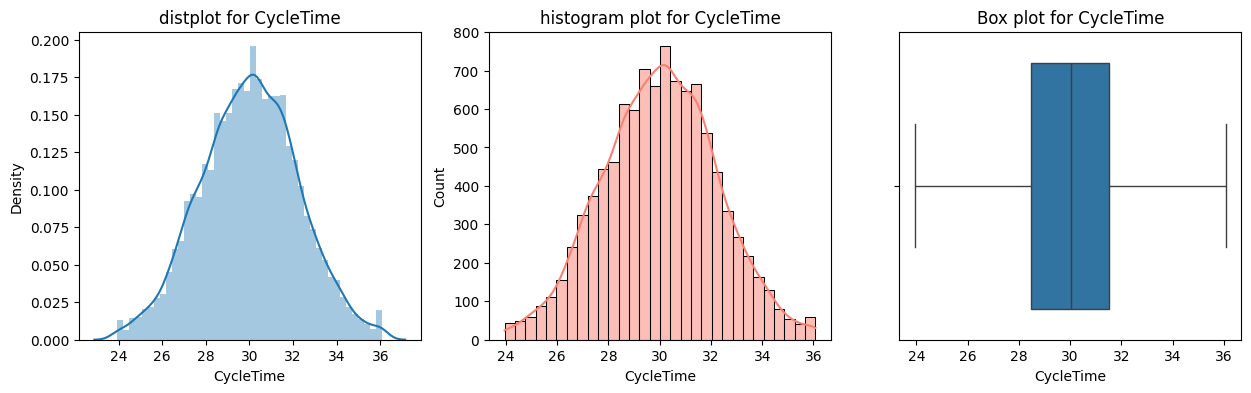

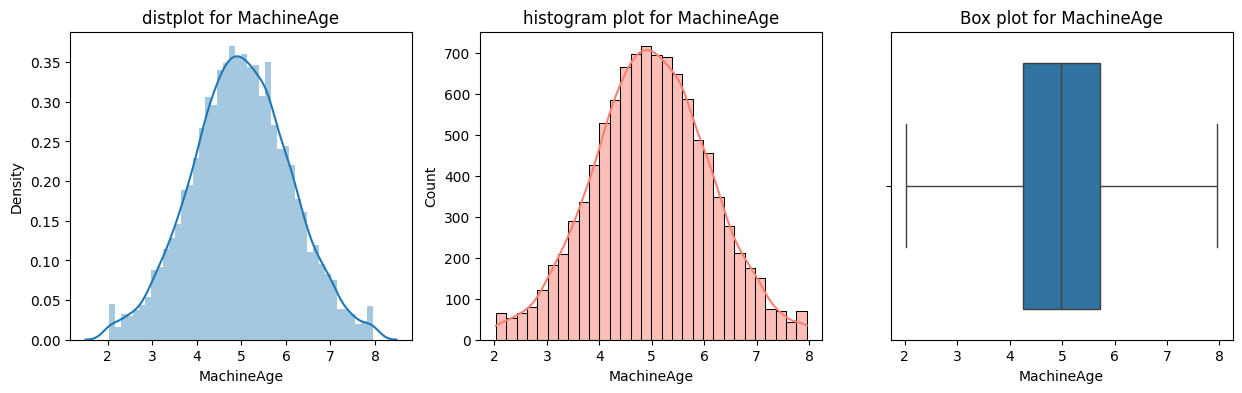

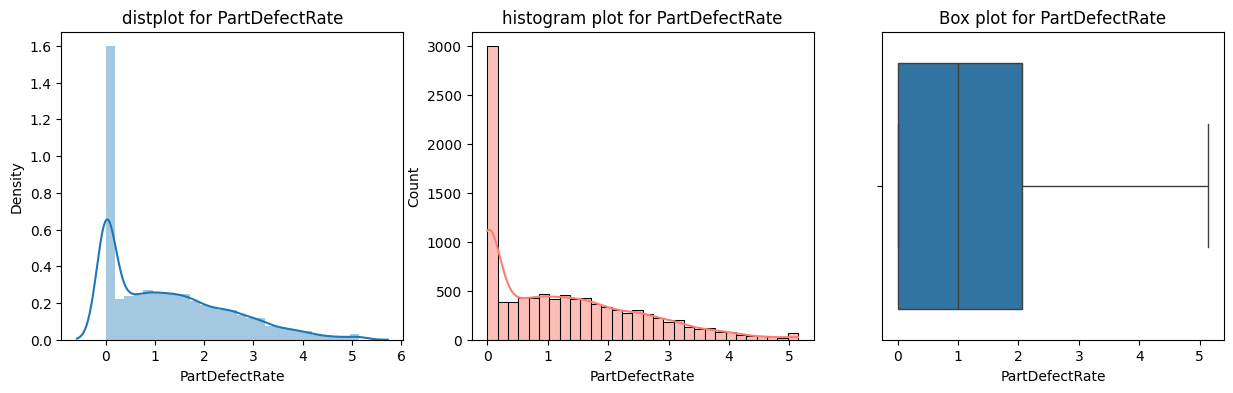

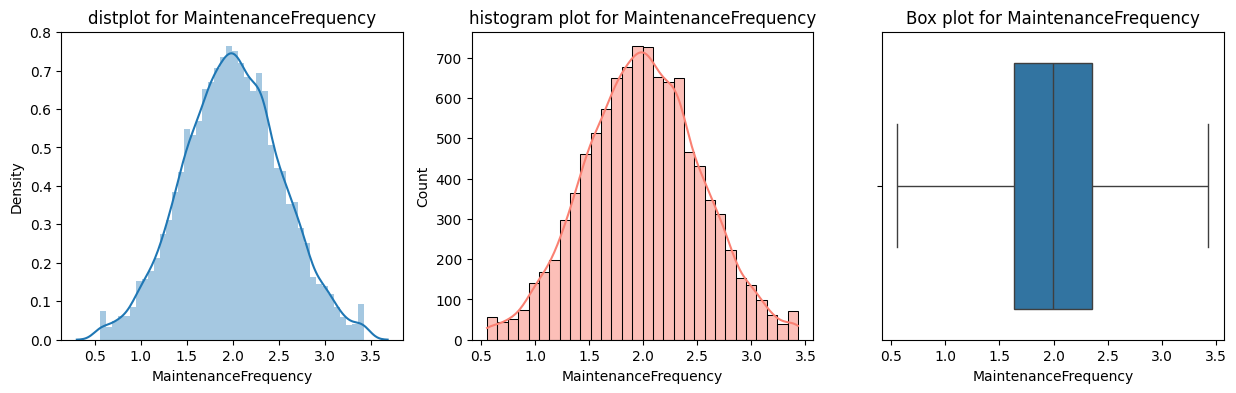

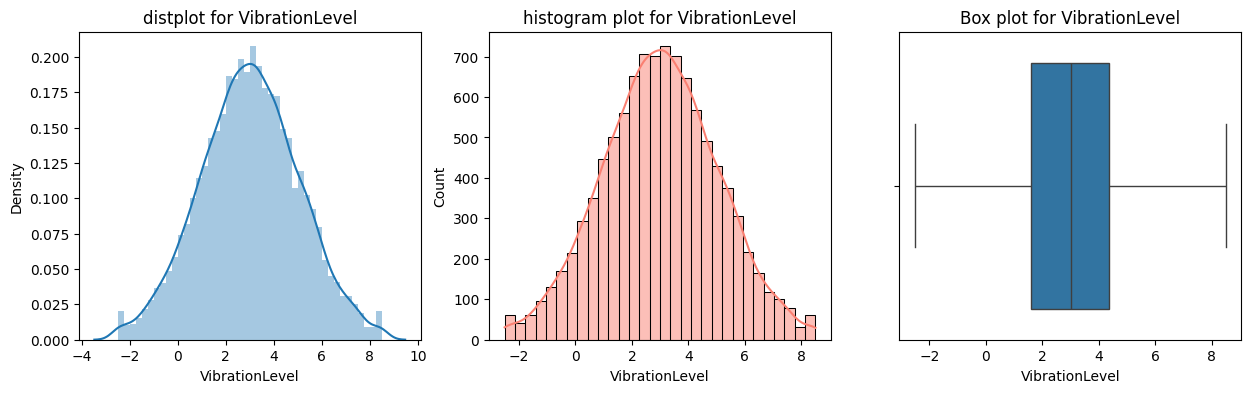

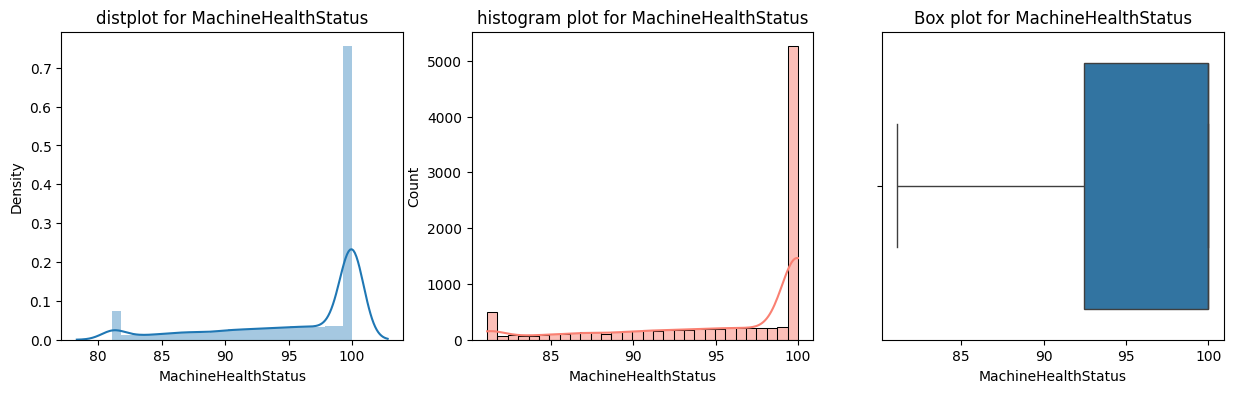

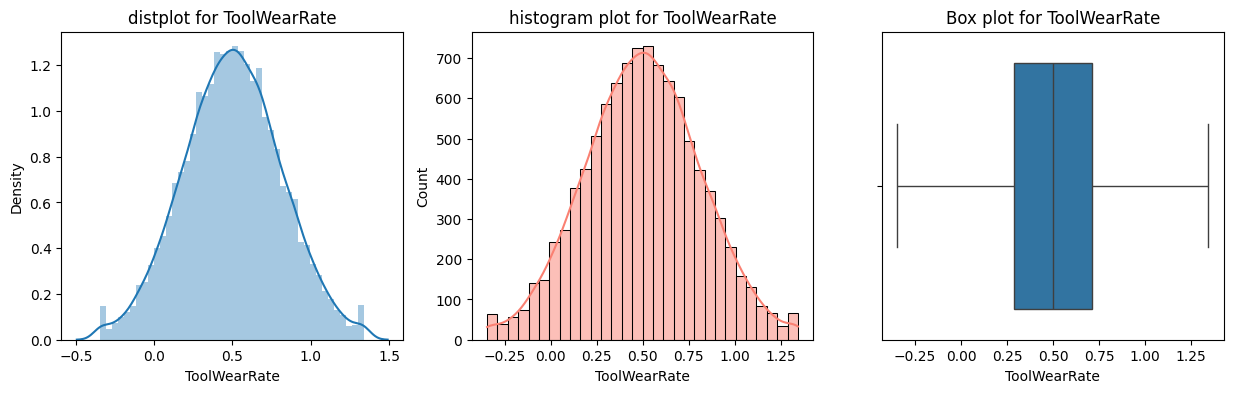

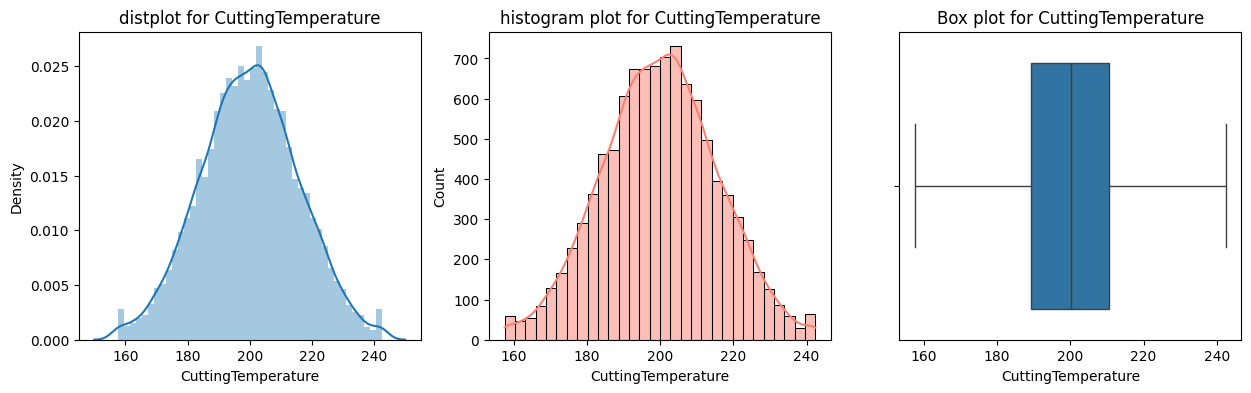

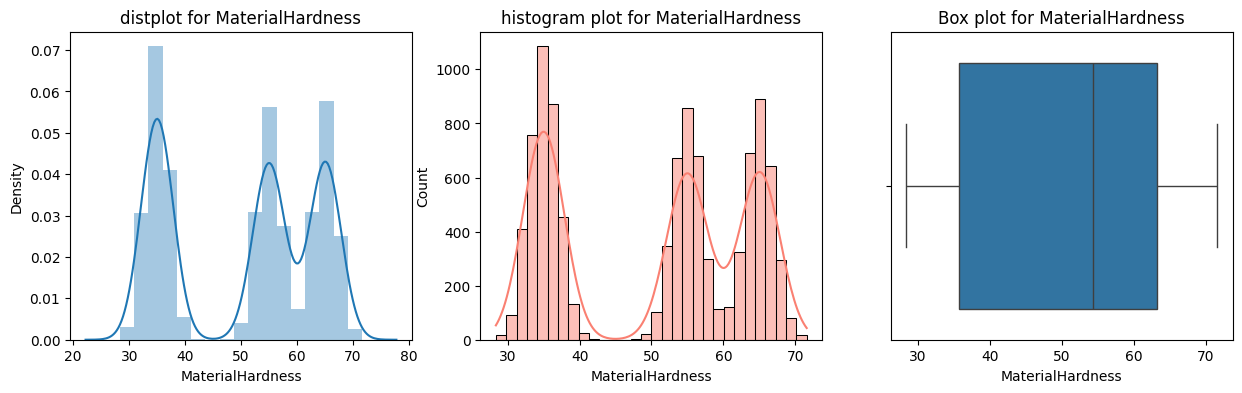

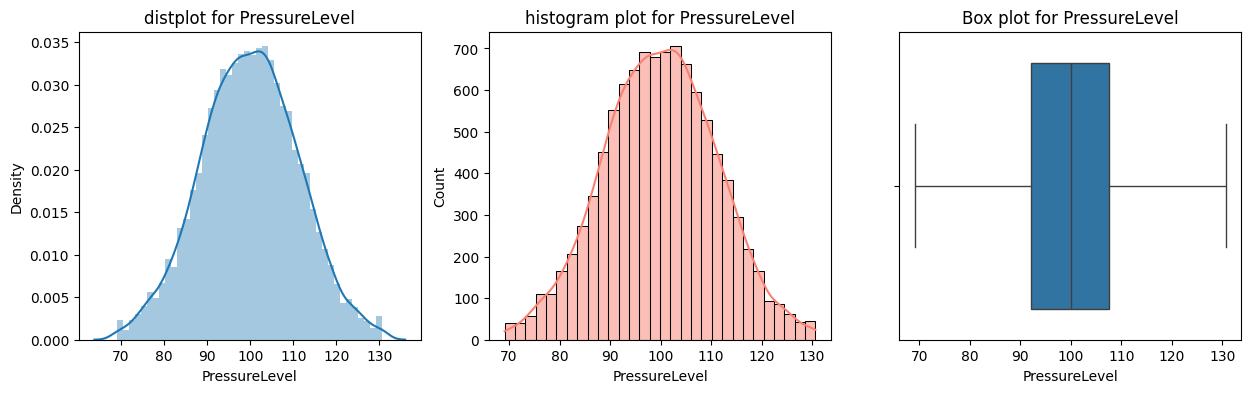

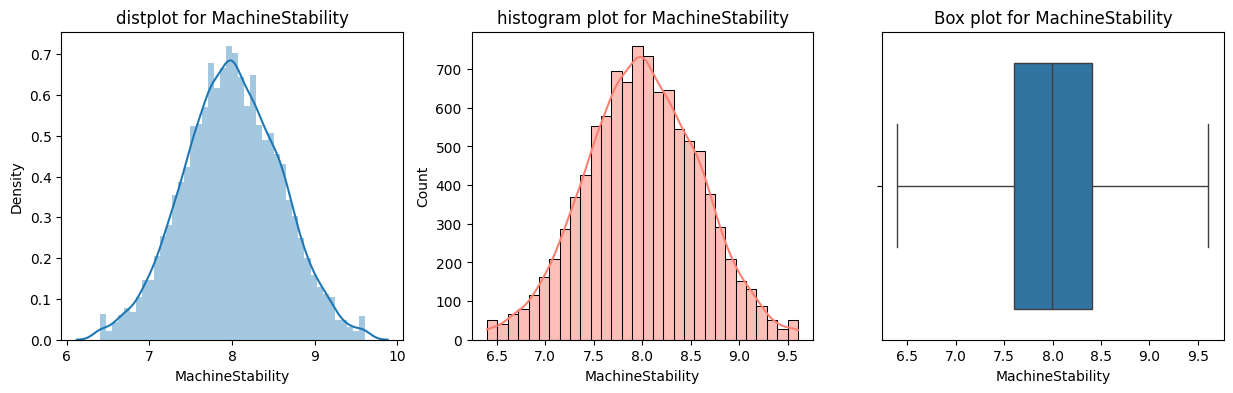

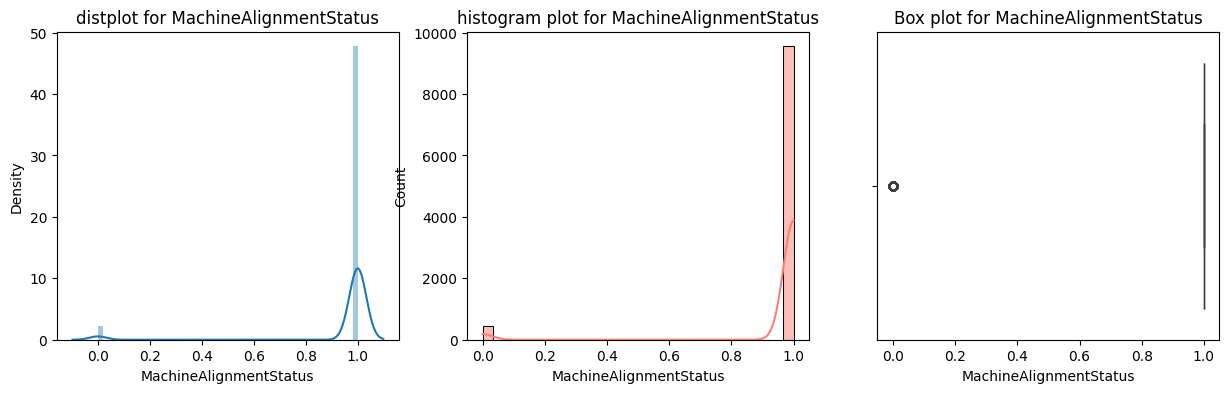

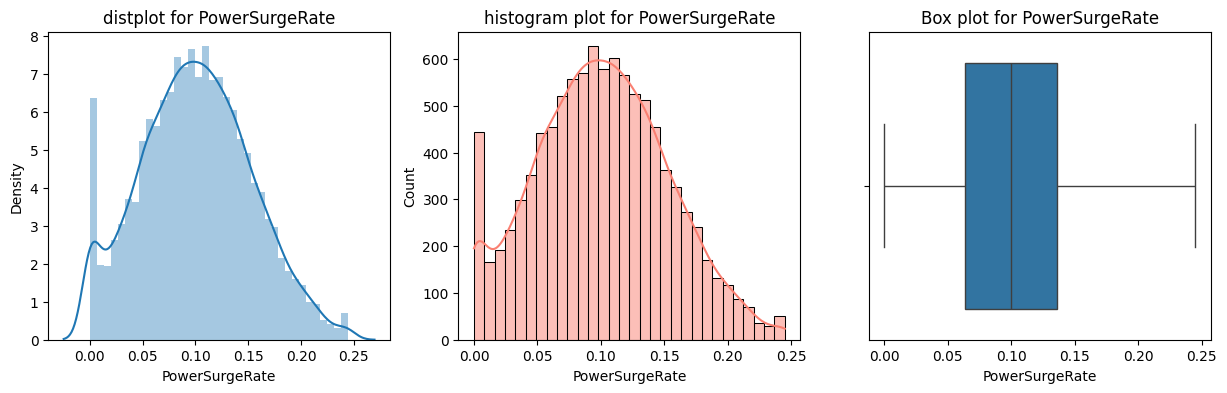

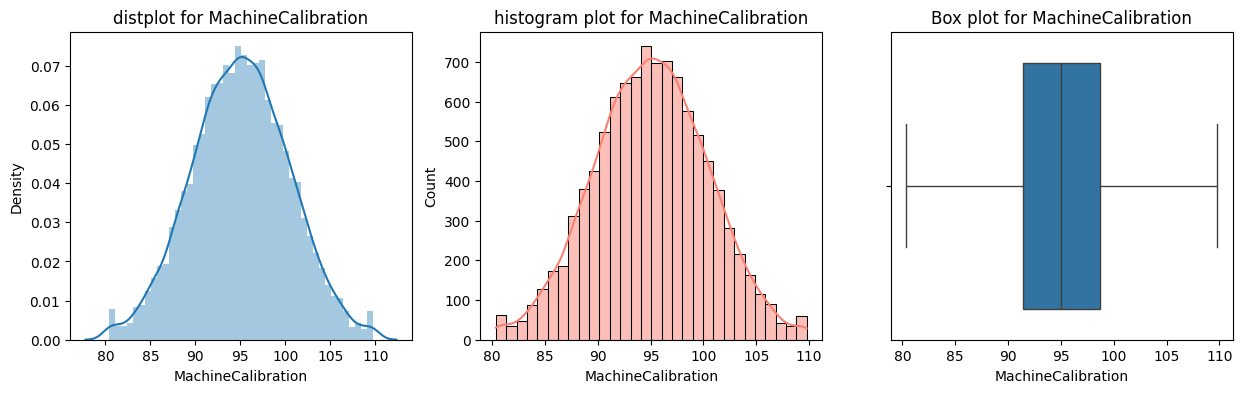

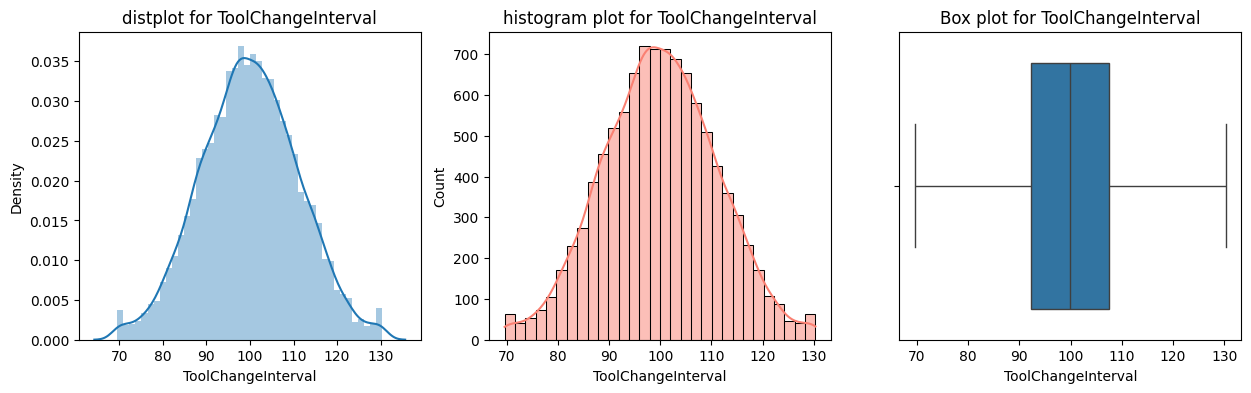

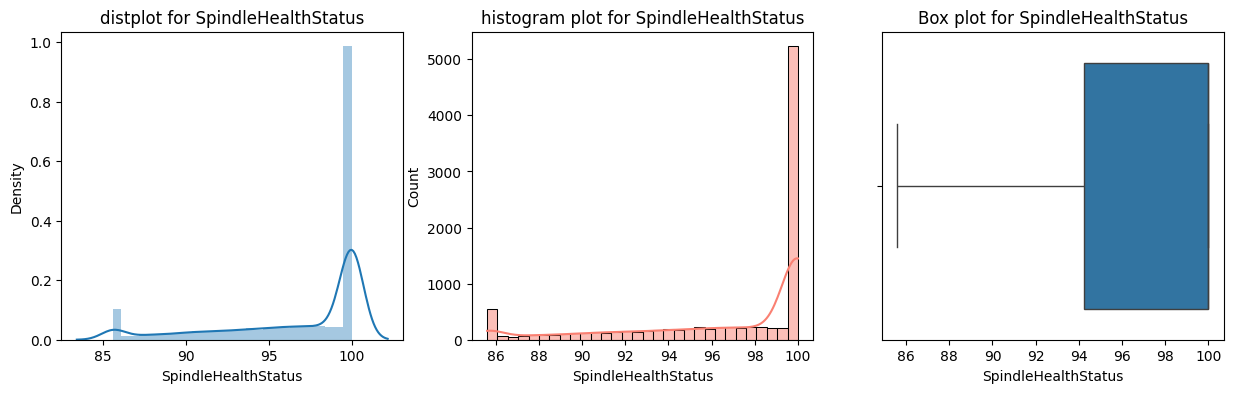

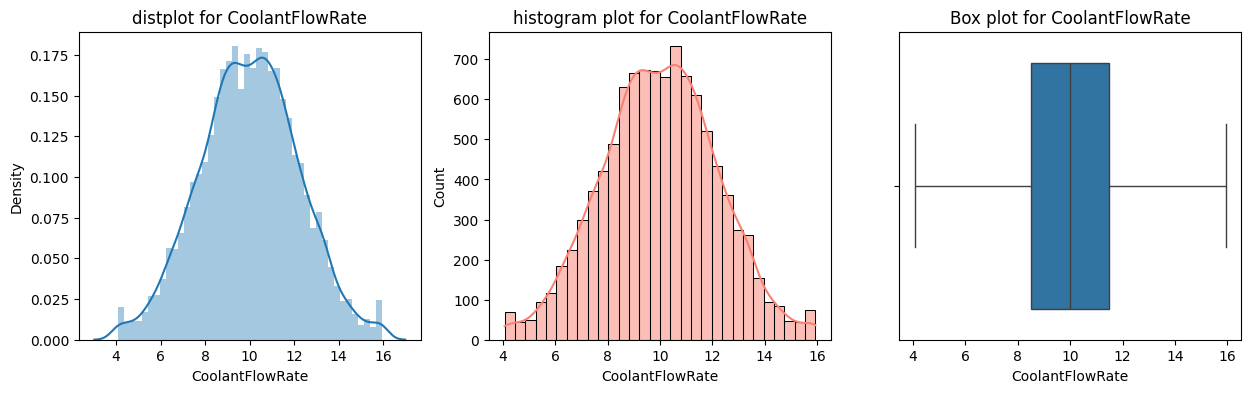

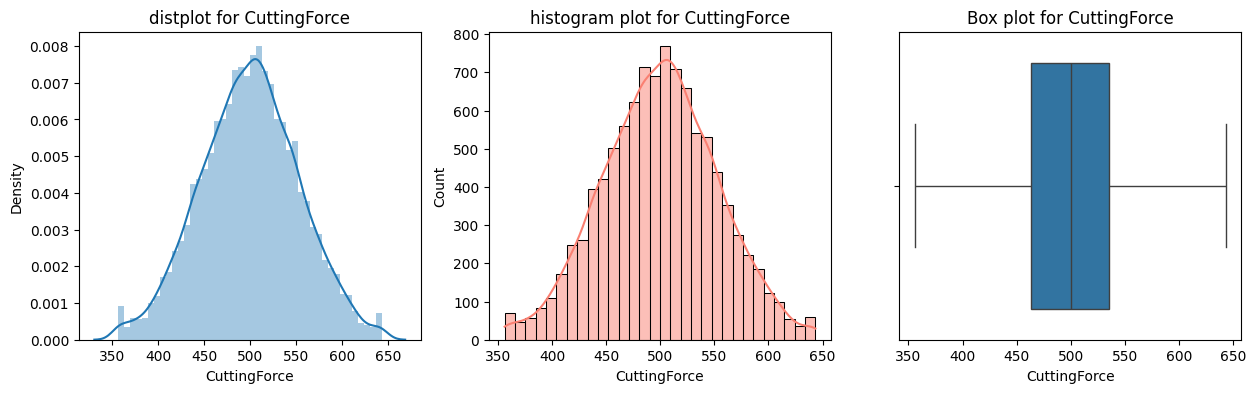

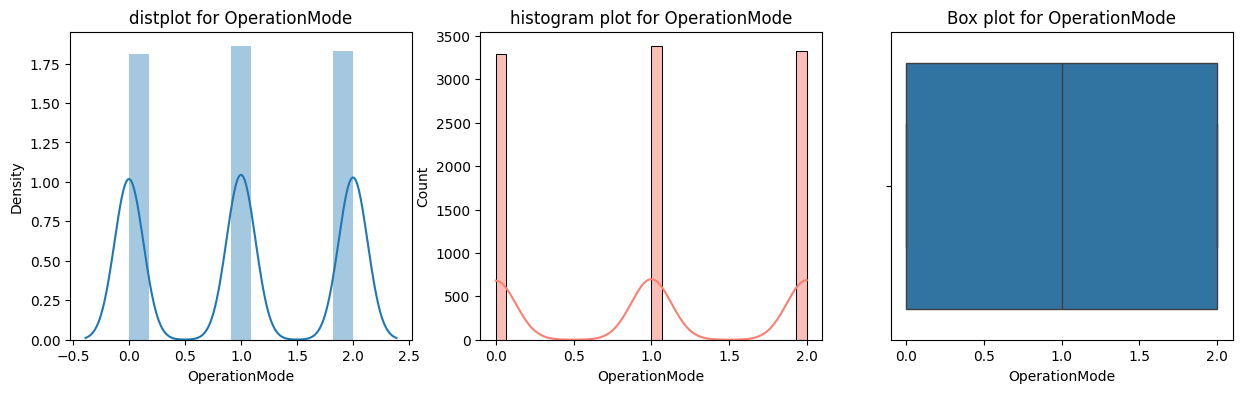

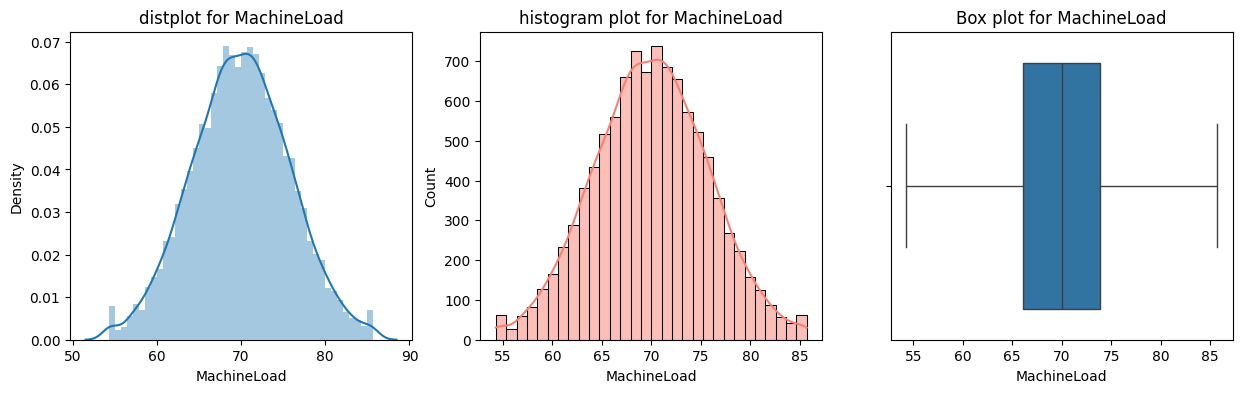

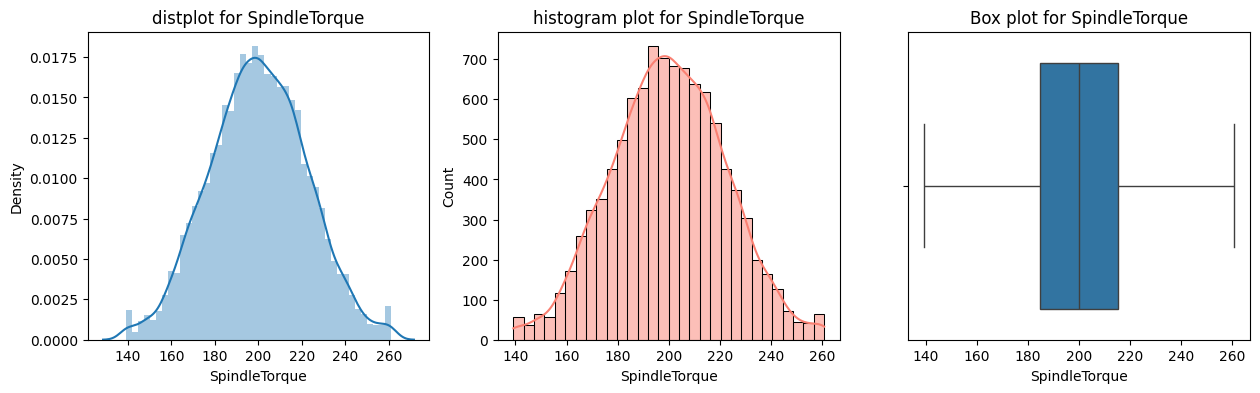

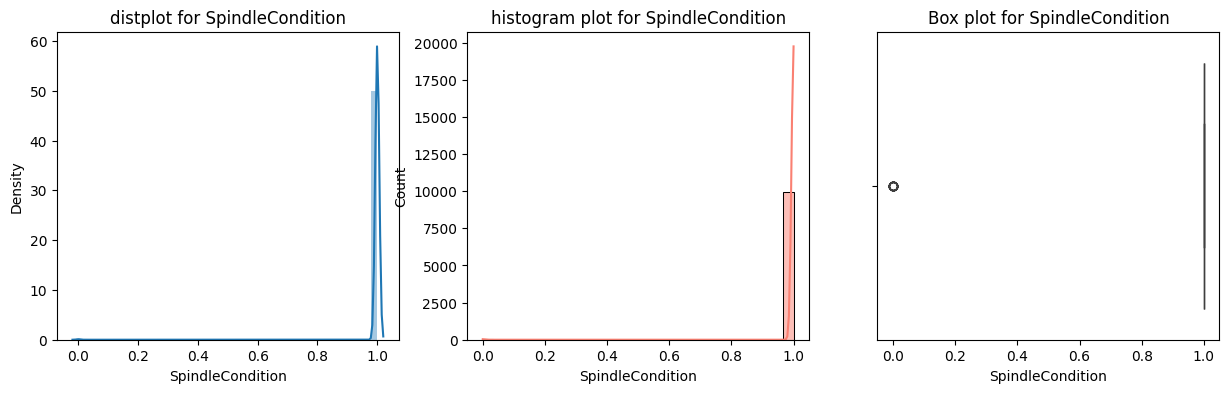

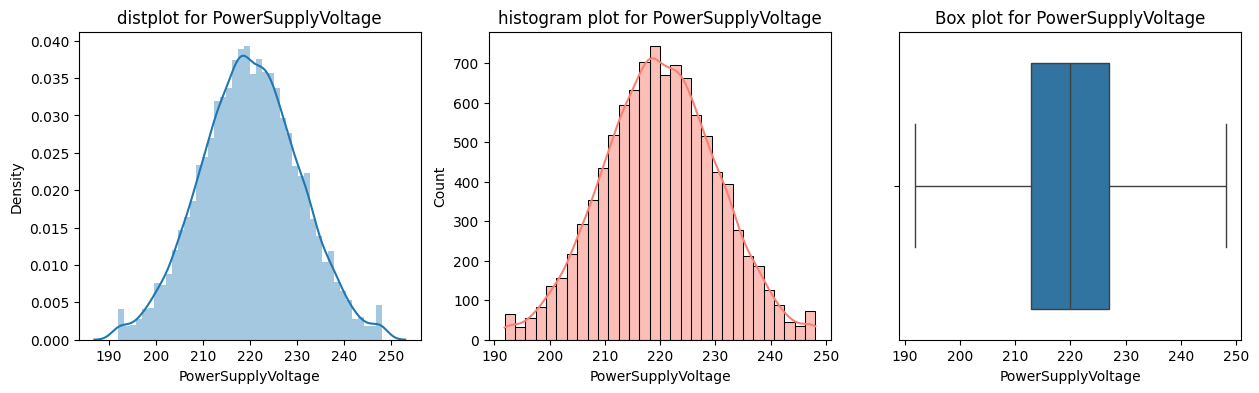

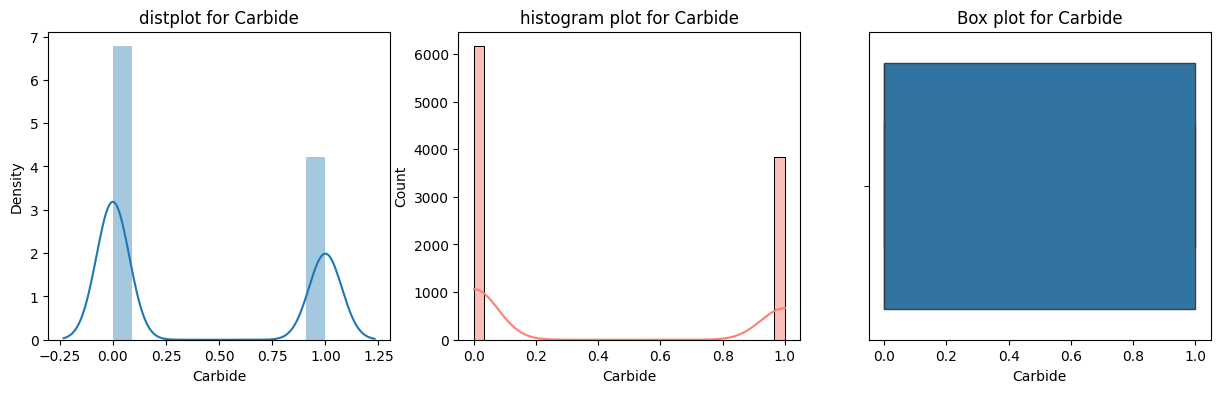

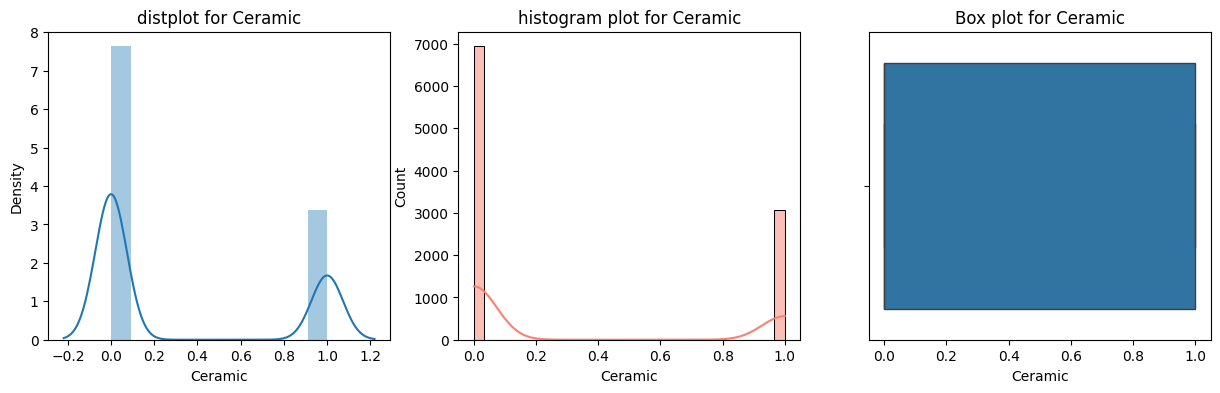

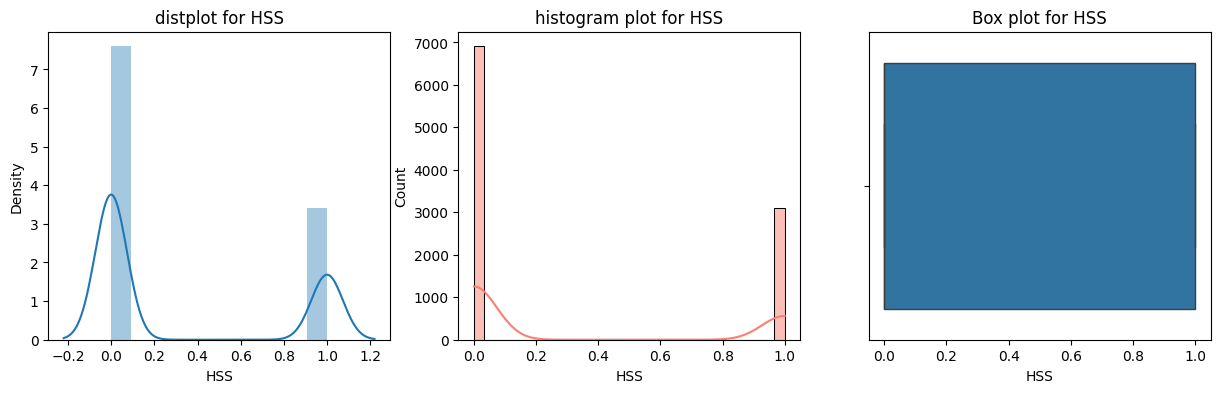

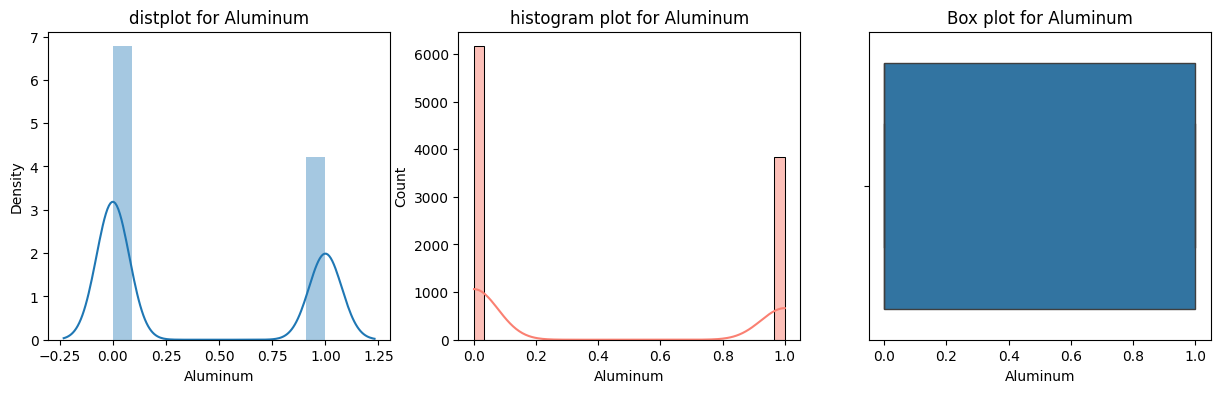

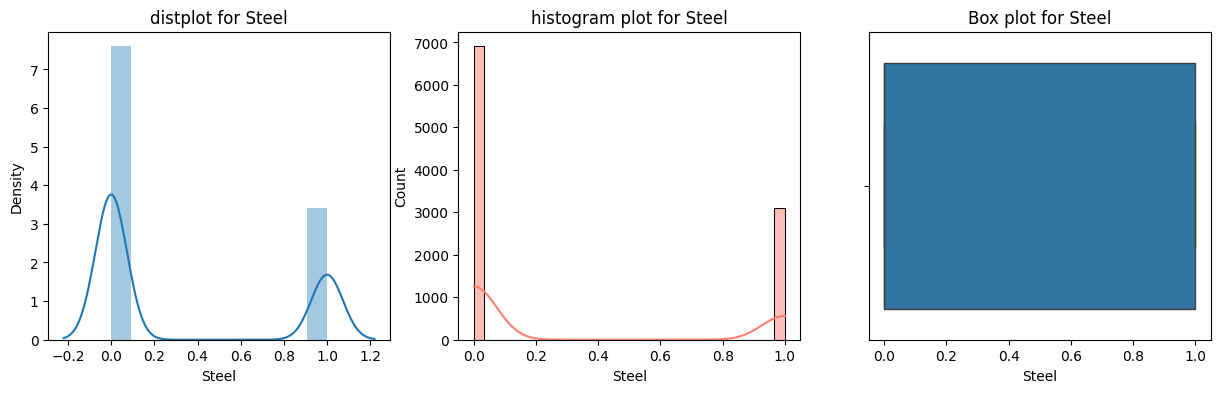

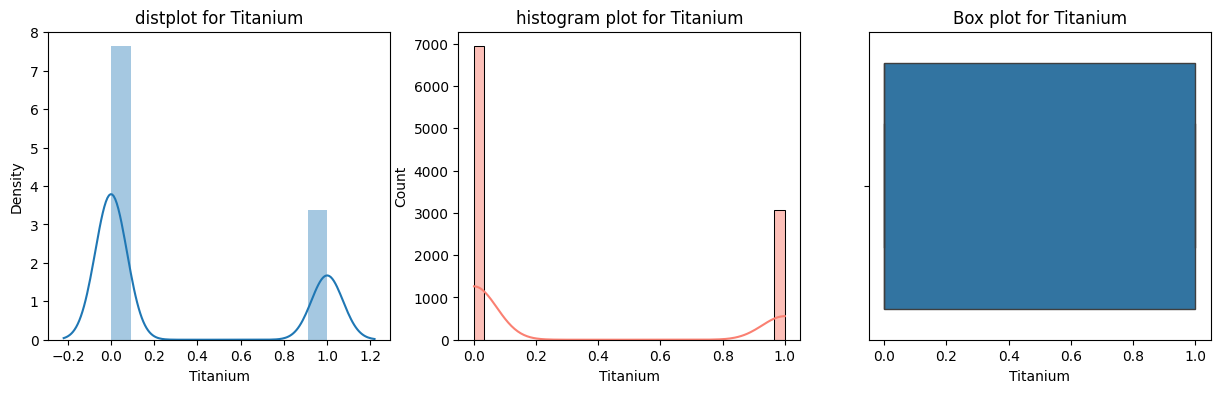

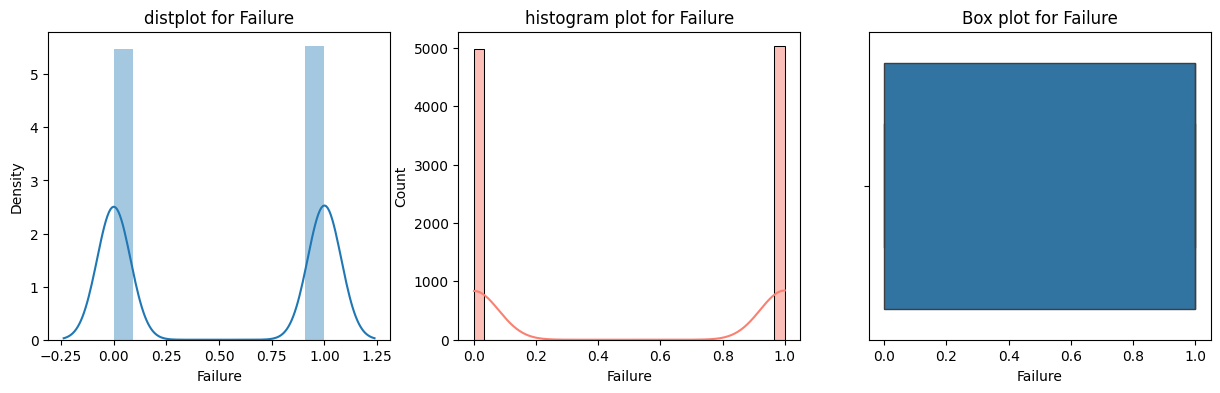

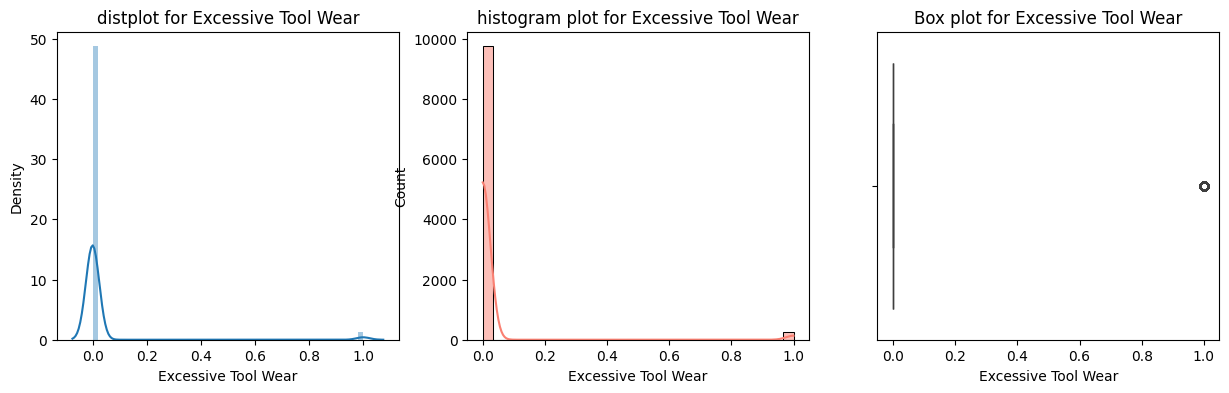

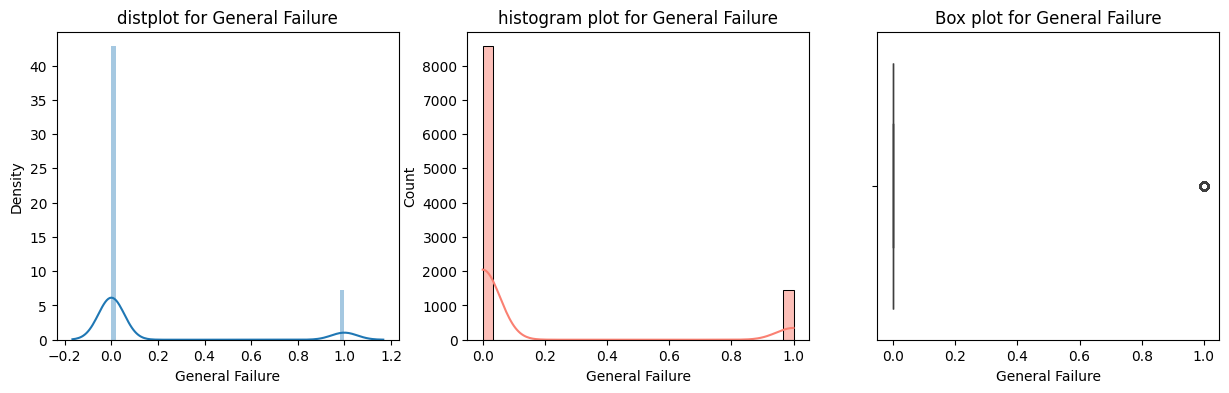

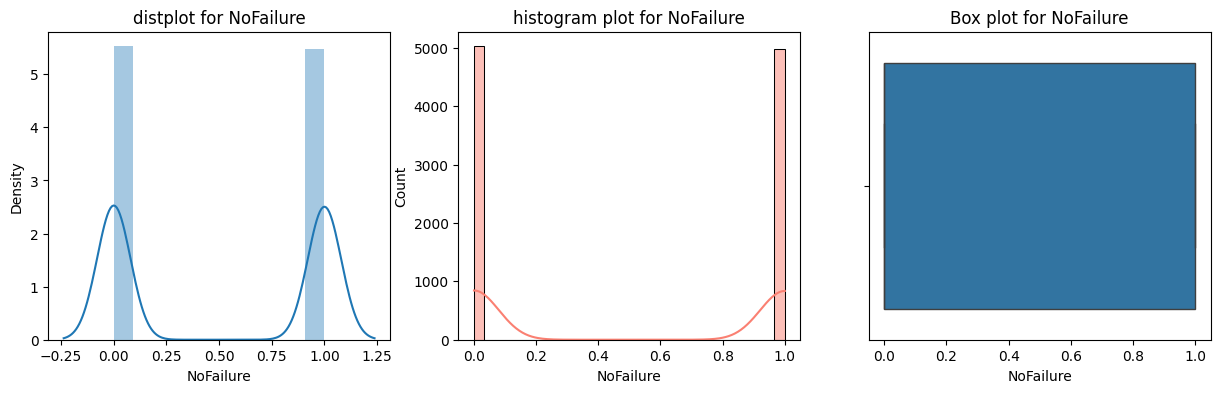

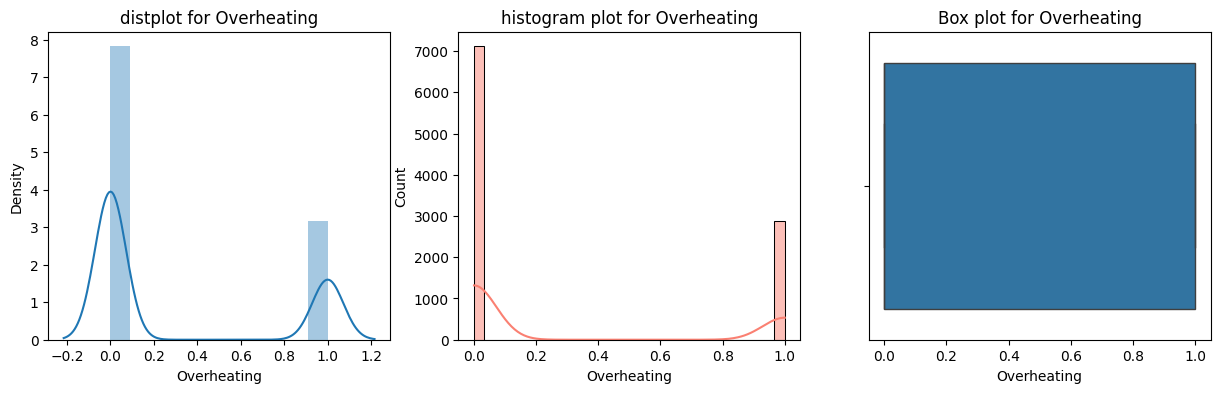

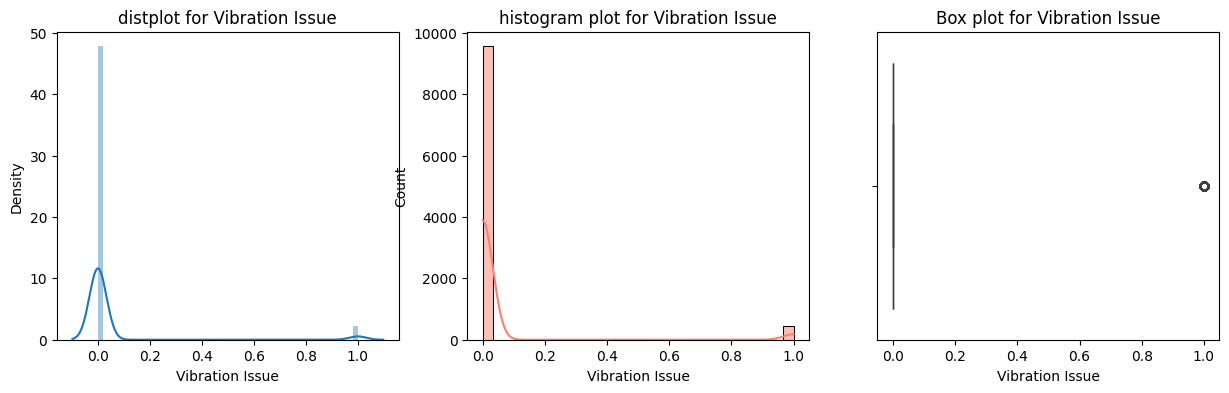

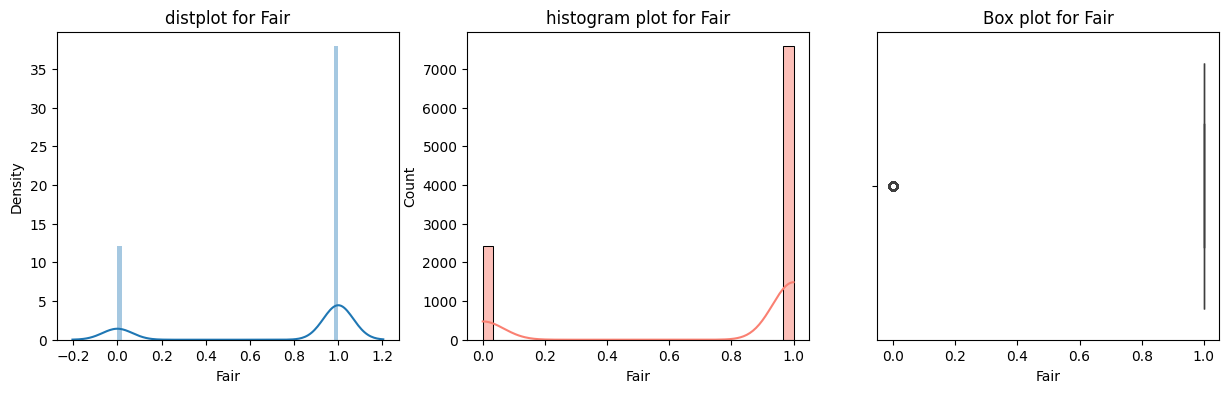

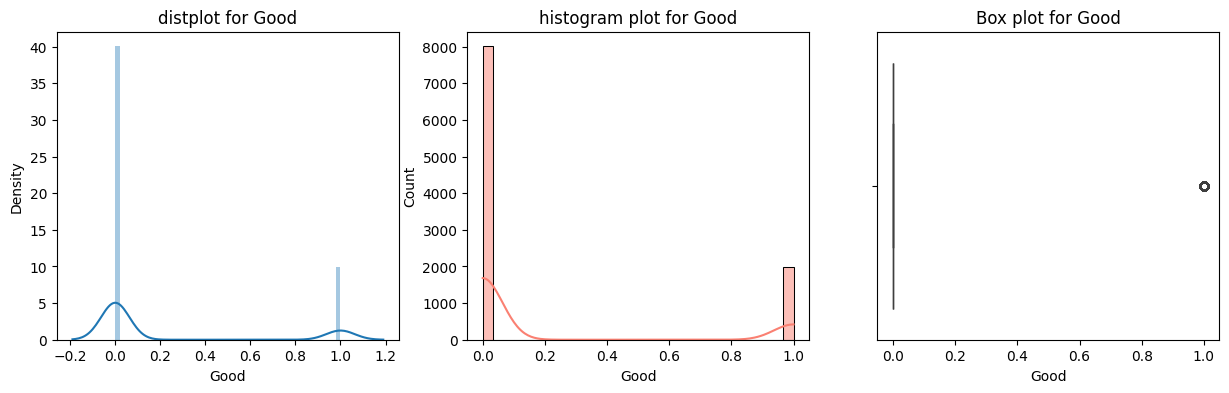

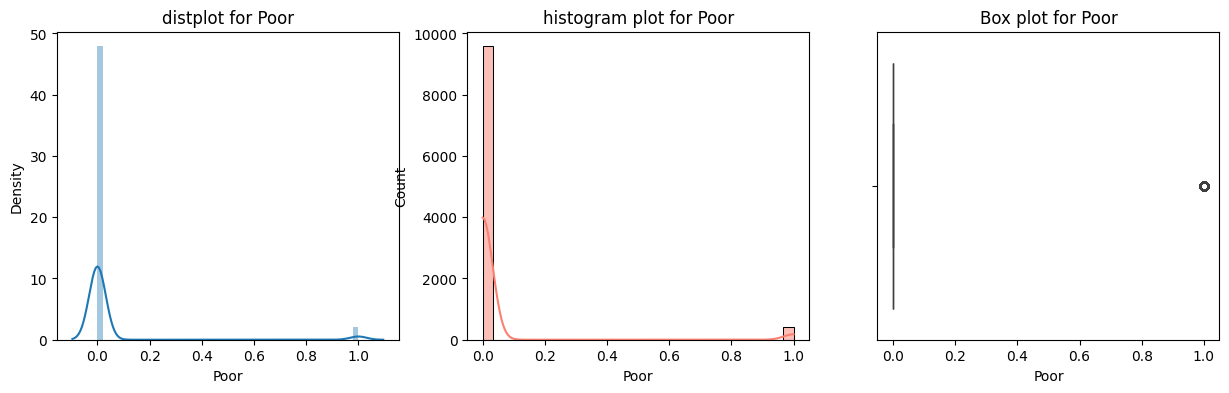

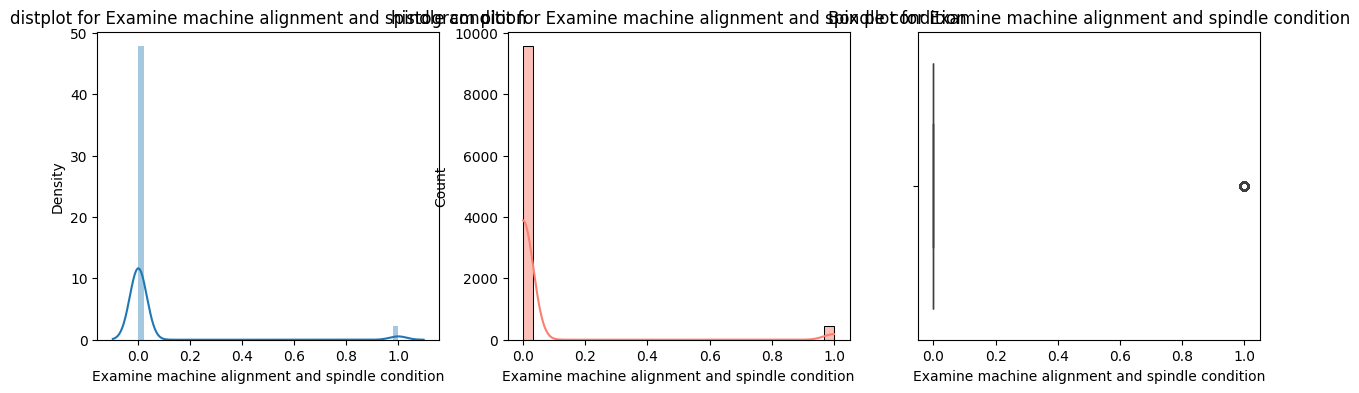

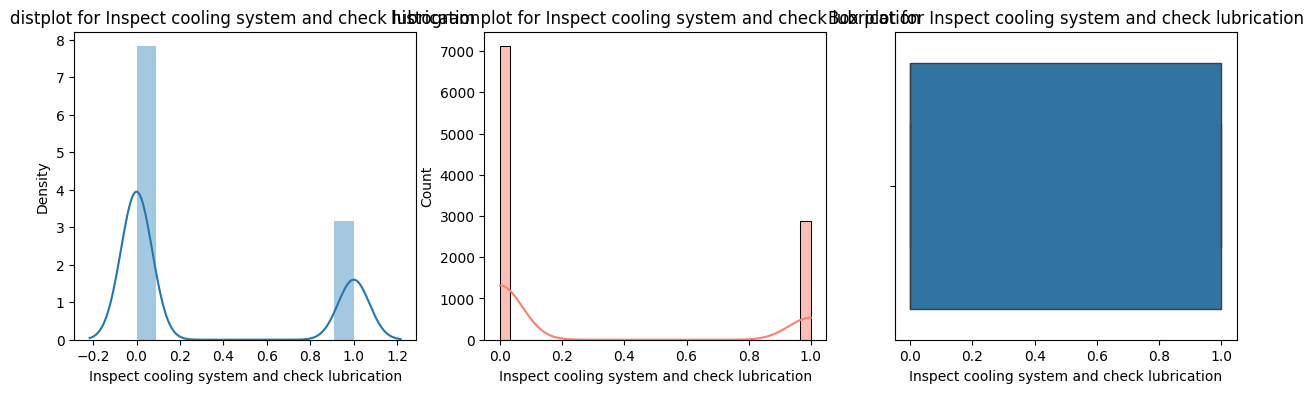

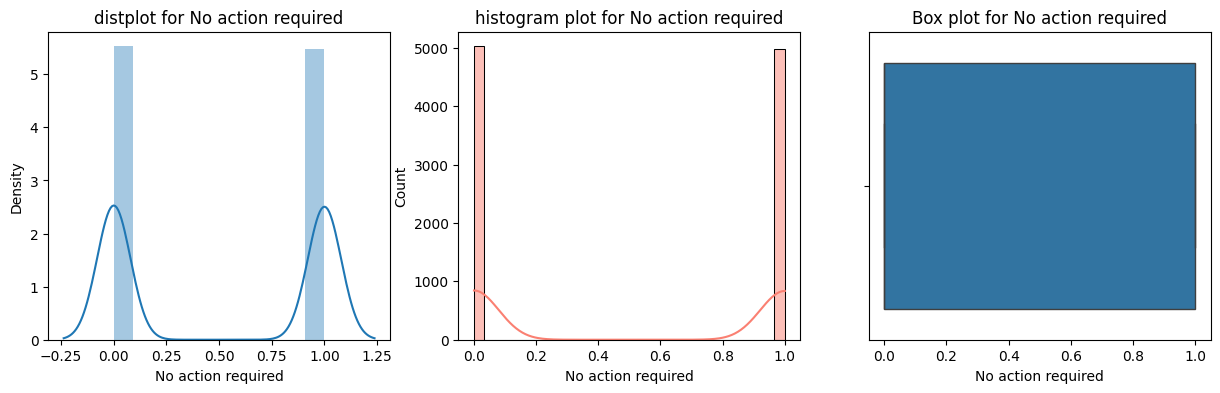

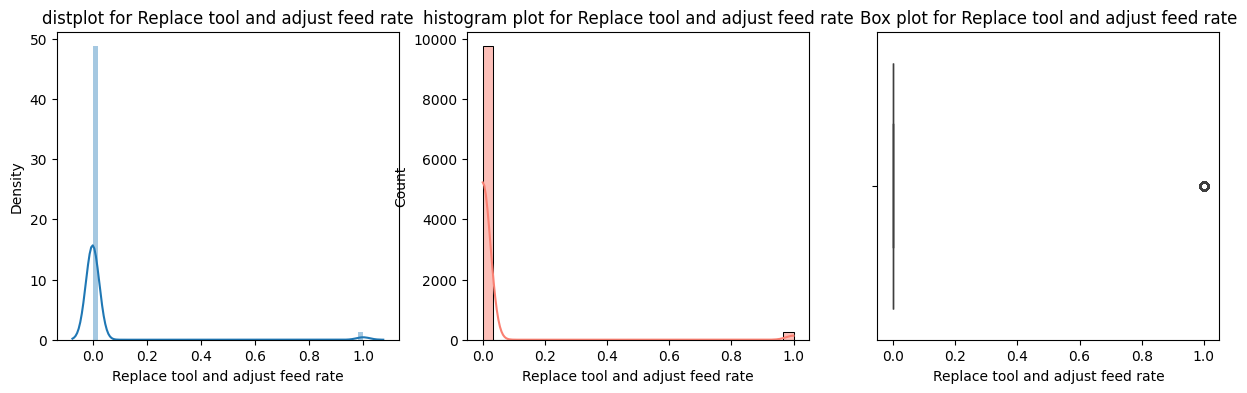

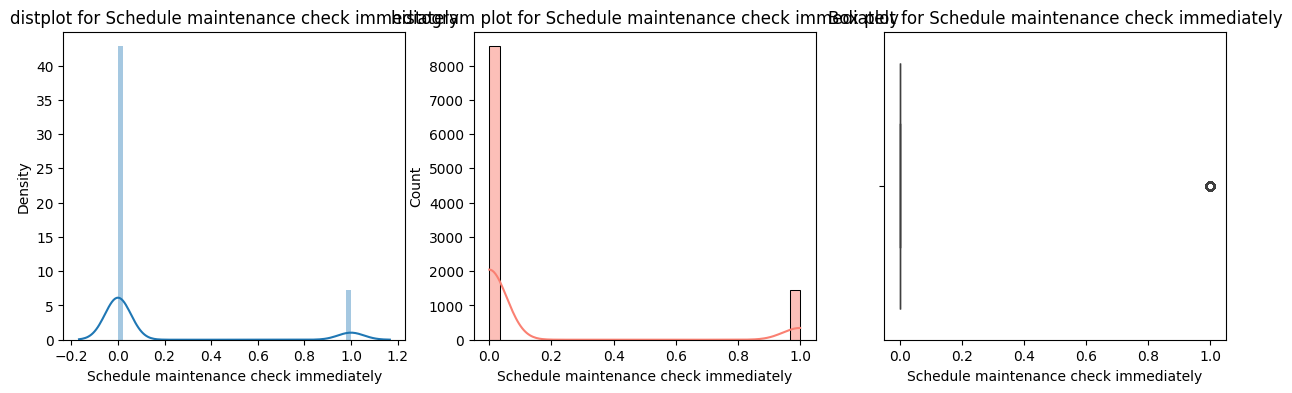

In [58]:
for i in columns:
    plot(df,i)

In [59]:
df.to_csv("final_data_model.csv", index=False)

In [4]:
df_final = pd.read_csv("final_data_model.csv")

In [5]:
df_final

OperationTime  CuttingSpeed  FeedRate  ToolDiameter  SpindleSpeed  \
0        990.890549    109.407406  5.150135      5.060204   1552.424925   
1        993.560328     95.832006  4.876967      4.828740   1473.940420   
2       1020.250558    108.479313  5.247619      5.058354   1553.680306   
3       1036.764104    112.214999  5.899118      5.203658   1621.706453   
4        937.471153    100.852800  4.621288      5.011324   1469.989519   
...             ...           ...       ...           ...           ...   
9995    1055.880519    106.996959  5.513671      5.353133   1650.876333   
9996     880.162458     79.843785  3.905971      4.468772   1294.953826   
9997     922.562319     94.843191  4.850244      4.959542   1467.832270   
9998     973.198864    107.413521  5.389367      4.977075   1550.530276   
9999    1011.123216    102.541412  5.442491      5.031445   1567.721390   

      MotorCurrent  PowerConsumption  LubricationLevel  \
0        11.616596        204.632426         78.377090   
1        10.016559        186.810622         85.233615   
2        10.294565        214.629208         71.431764   
3        11.012796        230.941672         70.665530   
4         9.534884        199.112293         84.416560   
...            ...               ...               ...   
9995     10.690473        230.641418         74.094824   
9996      7.638868        155.212762         92.228292   
9997      9.269085        184.410690         86.739895   
9998     10.648613        210.455133         77.360994   
9999     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature  MaterialHardness  PressureLevel  MachineStability  \
0             210.369127         36.139294     106.454657          7.738406   
1             202.134987         37.006345     102.949554          8.159411   
2             211.359819         64.976372     102.054474          7.780715   
3             224.115961         66.939937     109.221092          7.536552   
4             191.802646         39.683745     100.276453          8.347747   
...                  ...               ...            ...               ...   
9995          213

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   OperationTime                                    10000 non-null  float64
 1   CuttingSpeed                                     10000 non-null  float64
 2   FeedRate                                         10000 non-null  float64
 3   ToolDiameter                                     10000 non-null  float64
 4   SpindleSpeed                                     10000 non-null  float64
 5   MotorCurrent                                     10000 non-null  float64
 6   PowerConsumption                                 10000 non-null  float64
 7   LubricationLevel                                 10000 non-null  float64
 8   CoolingSystemEfficiency                          10000 non-null  float64
 9   CycleTime                    

In [7]:
x = df_final.iloc[:, :38]
y = df_final.iloc[:, 38:]
print(x.shape)
print(y.shape)

(10000, 38)
(10000, 14)


In [8]:
x

OperationTime  CuttingSpeed  FeedRate  ToolDiameter  SpindleSpeed  \
0        990.890549    109.407406  5.150135      5.060204   1552.424925   
1        993.560328     95.832006  4.876967      4.828740   1473.940420   
2       1020.250558    108.479313  5.247619      5.058354   1553.680306   
3       1036.764104    112.214999  5.899118      5.203658   1621.706453   
4        937.471153    100.852800  4.621288      5.011324   1469.989519   
...             ...           ...       ...           ...           ...   
9995    1055.880519    106.996959  5.513671      5.353133   1650.876333   
9996     880.162458     79.843785  3.905971      4.468772   1294.953826   
9997     922.562319     94.843191  4.850244      4.959542   1467.832270   
9998     973.198864    107.413521  5.389367      4.977075   1550.530276   
9999    1011.123216    102.541412  5.442491      5.031445   1567.721390   

      MotorCurrent  PowerConsumption  LubricationLevel  \
0        11.616596        204.632426         78.377090   
1        10.016559        186.810622         85.233615   
2        10.294565        214.629208         71.431764   
3        11.012796        230.941672         70.665530   
4         9.534884        199.112293         84.416560   
...            ...               ...               ...   
9995     10.690473        230.641418         74.094824   
9996      7.638868        155.212762         92.228292   
9997      9.269085        184.410690         86.739895   
9998     10.648613        210.455133         77.360994   
9999     10.381907        218.134662         80.018766   

      CoolingSystemEfficiency  CycleTime  MachineAge  PartDefectRate  \
0                   87.361030  31.704548    6.170154        1.936075   
1                   91.689244  28.568630    6.138395        0.000000   
2                   87.234364  30.128289    4.958159        1.614957   
3                   85.553047  33.371687    3.102164        3.248929   
4                   92.530722  33.131505    4.379855        0.481476   
...                       ...        ...         ...             ...   
9995                87.405561  33.000056    5.748377        3.222740   
9996                95.722050  25.526245    4.675546        0.000000   
9997                90.985434  28.507679    3.117209        1.064734   
9998                85.245777  30.278741    5.696946        1.671352   
9999                91.189694  31.548326    4.654522        1.432814   

      MaintenanceFrequency  VibrationLevel  MachineHealthStatus  ToolWearRate  \
0                 2.059165        3.110172            97.869374      0.703157   
1                 1.704050        3.447151            94.566458      0.406647   
2                 2.477884        3.450231            86.390168      0.702376   
3                 3.240750        5.002532            85.364235      0.886695   
4                 2.029312        1.853385           100.000000      0.422231   
...                    ...             ...                  ...           ...   
9995              2.833651        5.151708            92.342770      0.841796   
9996              0.791698       -1.629773           100.000000     -0.050973   
9997              1.481774        1.301141           100.000000      0.138906   
9998              2.050731        3.528778           100.000000      0.874975   
9999              2.423658        4.877778            86.401679      0.517278   

      CuttingTemperature  MaterialHardness  PressureLevel  MachineStability  \
0             210.369127         36.139294     106.454657          7.738406   
1             202.134987         37.006345     102.949554          8.159411   
2             211.359819         64.976372     102.054474          7.780715   
3             224.115961         66.939937     109.221092          7.536552   
4             191.802646         39.683745     100.276453          8.347747   
...                  ...               ...            ...               ...   
9995          213

In [9]:
y

Failure  Excessive Tool Wear  General Failure  NoFailure  Overheating  \
0           1                    0                0          0            1   
1           1                    0                1          0            0   
2           1                    0                0          0            1   
3           1                    0                0          0            1   
4           0                    0                0          1            0   
...       ...                  ...              ...        ...          ...   
9995        1                    0                0          0            1   
9996        0                    0                0          1            0   
9997        0                    0                0          1            0   
9998        0                    0                0          1            0   
9999        1                    0                0          0            0   

      Vibration Issue  Fair  Good  Poor  \
0                   0     1     0     0   
1                   0     0     1     0   
2                   0     1     0     0   
3                   0     1     0     0   
4                   0     1     0     0   
...               ...   ...   ...   ...   
9995                0     1     0     0   
9996                0     0     1     0   
9997                0     0     1     0   
9998                0     1     0     0   
9999                1     1     0     0   

      Examine machine alignment and spindle condition  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9995                                                0   
9996                                                0   
9997                                                0   
9998                                                0   
9999                                                1   

      Inspect cooling system and check lubrication  No action required  \
0                                                1                   0   
1                                                0                   0   
2                                                1                   0   
3                                                1                   0   
4                                                0                   1   
...                                            ...                 ...   
9995                                             1                   0   
9996                                             0                   1   
9997                                             0                   1   
9998                                             0                   1   
9999                                             0                   0   

      Replace tool and adjust feed rate  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   
...                                 ...   
9995                                  0   
9996                                  0   
9997                                  0   
9998                                  0   
9999                                  0   

      Schedule maintenance check immediately  
0                                          0  
1                                          1  
2                                          0  
3                                          0  
4                                          0  
...                                      ...  
9995                                       0  
9996                                       0  
9997                      

In [10]:
# Balanced Data
df_final["Failure"].value_counts()

Failure
1    5023
0    4977
Name: count, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,multilabel_confusion_matrix, average_precision_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import matthews_corrcoef,precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [12]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
    #train test splitting
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

    algo = algorithm()
    model = MultiOutputClassifier(estimator=algo).fit(x_train, y_train)

    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    #checking the accuracy_score
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_test= accuracy_score(y_test, y_pred_test)
    
    confusion_matrices = multilabel_confusion_matrix(y_test, y_pred_test)

    metrics={"Algorithm": algorithm.__name__,
            "Accuracy_Train": accuracy_train,
            "Accuracy_Test": accuracy_test}

    print(metrics)
    print("")
    print("Confusion Matrices (per label):")
    for i, cm in enumerate(confusion_matrices):
        print(f"Label {i + 1} Confusion Matrix:\n{cm}")
        print("")

In [13]:
accuracy_checking(x, y,DecisionTreeClassifier)
accuracy_checking(x, y,RandomForestClassifier)
accuracy_checking(x, y,ExtraTreesClassifier)
accuracy_checking(x, y,AdaBoostClassifier)
accuracy_checking(x, y,GradientBoostingClassifier)
accuracy_checking(x, y,XGBClassifier)

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.6185}

Confusion Matrices (per label):
Label 1 Confusion Matrix:
[[786 215]
 [255 744]]

Label 2 Confusion Matrix:
[[1932   13]
 [  18   37]]

Label 3 Confusion Matrix:
[[1553  161]
 [ 167  119]]

Label 4 Confusion Matrix:
[[750 249]
 [211 790]]

Label 5 Confusion Matrix:
[[1391   41]
 [  45  523]]

Label 6 Confusion Matrix:
[[1897   13]
 [  23   67]]

Label 7 Confusion Matrix:
[[ 504    0]
 [   0 1496]]

Label 8 Confusion Matrix:
[[1590    0]
 [   0  410]]

Label 9 Confusion Matrix:
[[1906    0]
 [   0   94]]

Label 10 Confusion Matrix:
[[1895   15]
 [  21   69]]

Label 11 Confusion Matrix:
[[1391   41]
 [  47  521]]

Label 12 Confusion Matrix:
[[750 249]
 [218 783]]

Label 13 Confusion Matrix:
[[1935   10]
 [  22   33]]

Label 14 Confusion Matrix:
[[1561  153]
 [ 164  122]]

{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.739}

Confusion Matrices (per label):
Label 1 Co

In [15]:
from sklearn.multioutput import ClassifierChain
from sklearn.svm import SVC

In [16]:
lgbm = GradientBoostingClassifier()

In [17]:
model_lgb = MultiOutputClassifier(estimator=lgbm,n_jobs=None)

In [18]:
chain_lgbm = ClassifierChain(lgbm, order='random', random_state=0)

In [19]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [20]:
model_lgb_pred = chain_lgbm.fit(x_train, y_train)

In [21]:
print(model_lgb_pred.score(x_test,y_test))

0.8355


In [22]:
yhat_lgb = model_lgb_pred.predict(x_test)

In [23]:
yhat_lgb

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [24]:
y_test = y_test.values

In [25]:
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,0],yhat_lgb[:,0])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,0],yhat_lgb[:,0])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,0],yhat_lgb[:,0])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,1],yhat_lgb[:,1])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,1],yhat_lgb[:,1])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,1],yhat_lgb[:,1])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,2],yhat_lgb[:,2])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,2],yhat_lgb[:,2])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,2],yhat_lgb[:,2])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,3],yhat_lgb[:,3])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,3],yhat_lgb[:,3])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,3],yhat_lgb[:,3])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,4],yhat_lgb[:,4])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,4],yhat_lgb[:,4])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,4],yhat_lgb[:,4])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,5],yhat_lgb[:,5])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,5],yhat_lgb[:,5])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,5],yhat_lgb[:,5])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,6],yhat_lgb[:,6])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,6],yhat_lgb[:,6])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,6],yhat_lgb[:,6])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,7],yhat_lgb[:,7])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,7],yhat_lgb[:,7])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,7],yhat_lgb[:,7])))
print("Accuracy Score: %.4f" %(accuracy_score(y_test[:,8],yhat_lgb[:,8])))
print("Average Precision Score: %.4f" %(average_precision_score(y_test[:,8],yhat_lgb[:,8])))
print("Matthews correlation coefficient: %.4f" %(matthews_corrcoef(y_test[:,8],yhat_lgb[:,8])))


Accuracy Score: 0.8365
Average Precision Score: 0.7815
Matthews correlation coefficient: 0.6730
Accuracy Score: 0.9895
Average Precision Score: 0.6851
Matthews correlation coefficient: 0.8206
Accuracy Score: 0.8835
Average Precision Score: 0.3646
Matthews correlation coefficient: 0.4721
Accuracy Score: 0.8365
Average Precision Score: 0.7814
Matthews correlation coefficient: 0.6730
Accuracy Score: 0.9730
Average Precision Score: 0.9141
Matthews correlation coefficient: 0.9366
Accuracy Score: 0.9890
Average Precision Score: 0.7977
Matthews correlation coefficient: 0.8872
Accuracy Score: 1.0000
Average Precision Score: 1.0000
Matthews correlation coefficient: 1.0000
Accuracy Score: 1.0000
Average Precision Score: 1.0000
Matthews correlation coefficient: 1.0000
Accuracy Score: 1.0000
Average Precision Score: 1.0000
Matthews correlation coefficient: 1.0000


Classification Report for Label 0:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1001
           1       0.84      0.83      0.84       999

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix (TN, FP, FN, TP): 839, 162, 165, 834


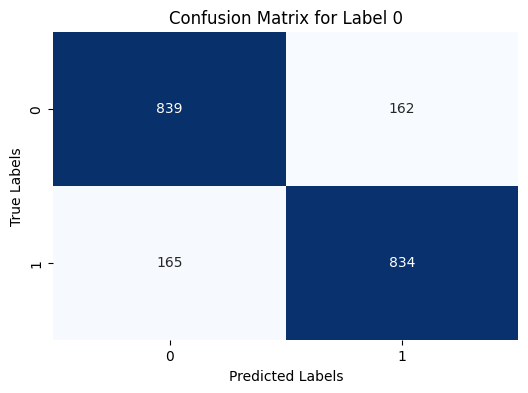

Classification Report for Label 1:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1945
           1       0.77      0.89      0.82        55

    accuracy                           0.99      2000
   macro avg       0.88      0.94      0.91      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix (TN, FP, FN, TP): 1930, 15, 6, 49


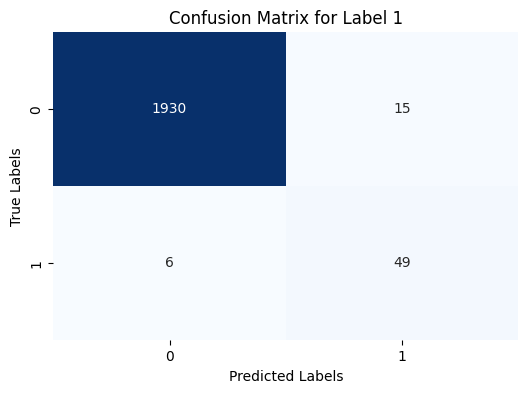

Classification Report for Label 2:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1714
           1       0.63      0.46      0.53       286

    accuracy                           0.88      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.87      0.88      0.88      2000

Confusion Matrix (TN, FP, FN, TP): 1636, 78, 155, 131


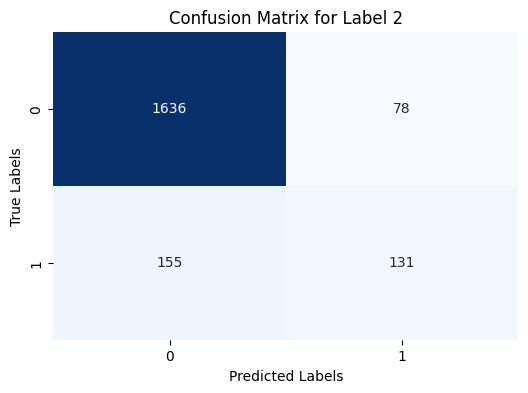

Classification Report for Label 3:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       999
           1       0.84      0.84      0.84      1001

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix (TN, FP, FN, TP): 834, 165, 162, 839


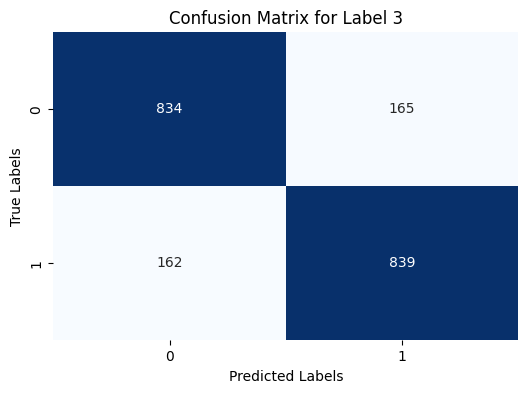

Classification Report for Label 4:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1432
           1       0.92      0.99      0.95       568

    accuracy                           0.97      2000
   macro avg       0.96      0.98      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix (TN, FP, FN, TP): 1382, 50, 4, 564


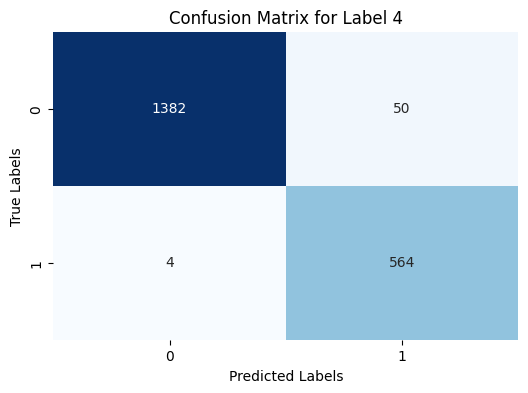

Classification Report for Label 5:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1910
           1       0.81      0.98      0.89        90

    accuracy                           0.99      2000
   macro avg       0.91      0.98      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix (TN, FP, FN, TP): 1890, 20, 2, 88


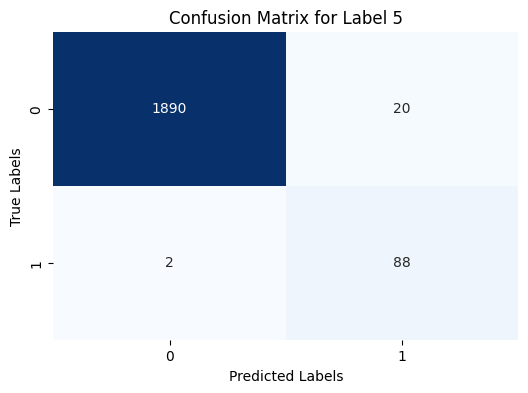

Classification Report for Label 6:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       504
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix (TN, FP, FN, TP): 504, 0, 0, 1496


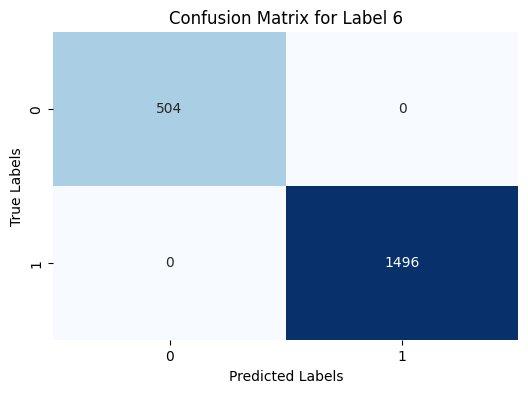

Classification Report for Label 7:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1590
           1       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix (TN, FP, FN, TP): 1590, 0, 0, 410


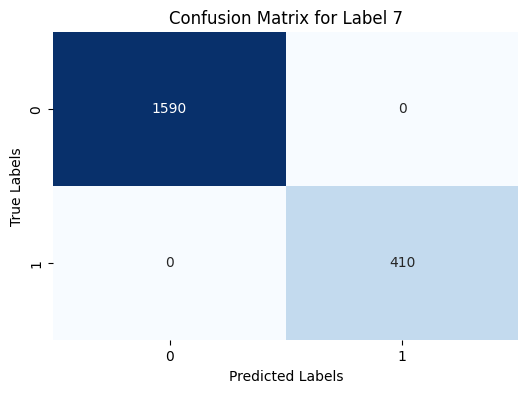

Classification Report for Label 8:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1906
           1       1.00      1.00      1.00        94

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix (TN, FP, FN, TP): 1906, 0, 0, 94


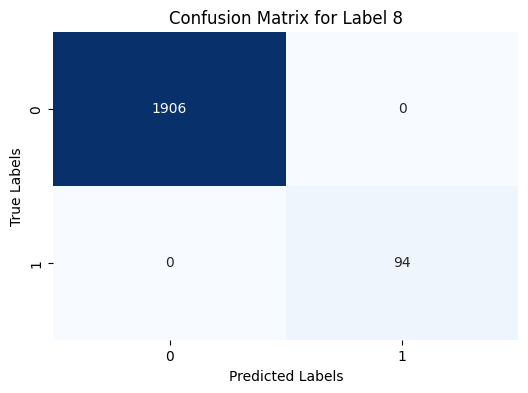

Classification Report for Label 9:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1910
           1       0.81      0.98      0.89        90

    accuracy                           0.99      2000
   macro avg       0.91      0.98      0.94      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix (TN, FP, FN, TP): 1890, 20, 2, 88


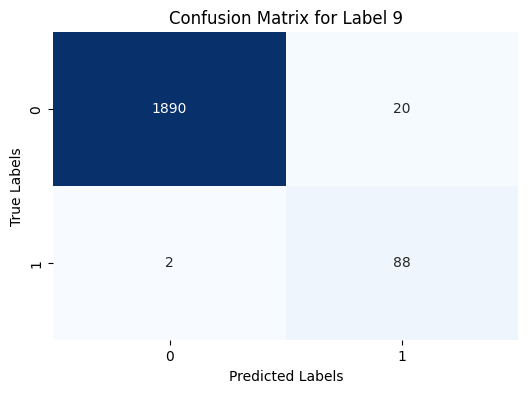

Classification Report for Label 10:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1432
           1       0.92      0.99      0.95       568

    accuracy                           0.97      2000
   macro avg       0.96      0.98      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix (TN, FP, FN, TP): 1382, 50, 4, 564


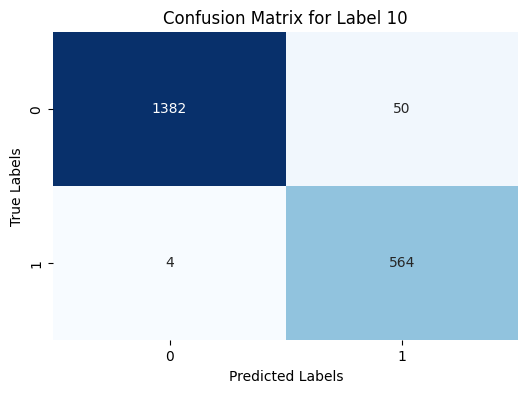

Classification Report for Label 11:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       999
           1       0.84      0.84      0.84      1001

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.84      0.84      0.84      2000

Confusion Matrix (TN, FP, FN, TP): 834, 165, 162, 839


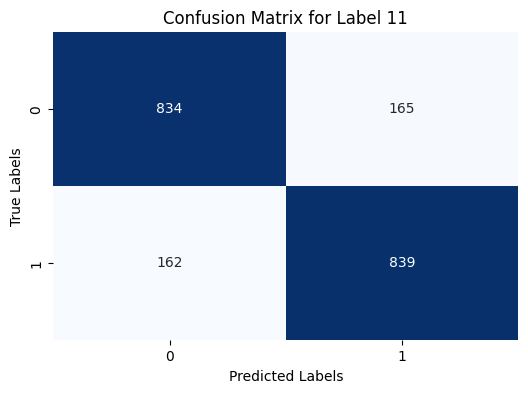

Classification Report for Label 12:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1945
           1       0.77      0.89      0.82        55

    accuracy                           0.99      2000
   macro avg       0.88      0.94      0.91      2000
weighted avg       0.99      0.99      0.99      2000

Confusion Matrix (TN, FP, FN, TP): 1930, 15, 6, 49


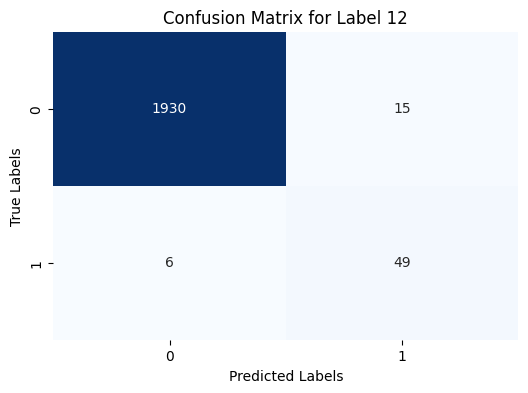

Classification Report for Label 13:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1714
           1       0.63      0.46      0.53       286

    accuracy                           0.88      2000
   macro avg       0.77      0.71      0.73      2000
weighted avg       0.87      0.88      0.88      2000

Confusion Matrix (TN, FP, FN, TP): 1636, 78, 155, 131


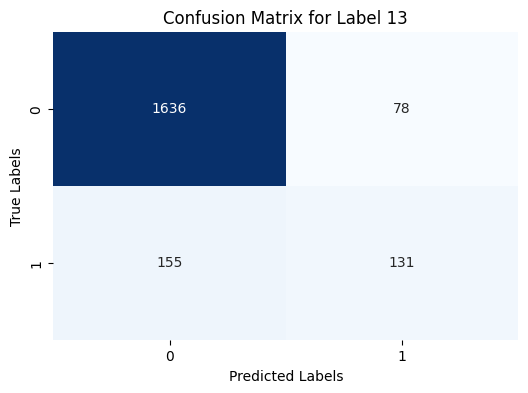

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Define a function to plot the confusion matrix using matplotlib
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

# Loop through each label and display the classification report and confusion matrix
for i in range(y_test.shape[1]):
    print(f"Classification Report for Label {i}:")
    print(classification_report(y_test[:, i], yhat_lgb[:, i]))

    # Calculate confusion matrix values
    tn, fp, fn, tp = confusion_matrix(y_test[:, i], yhat_lgb[:, i]).ravel()
    print(f"Confusion Matrix (TN, FP, FN, TP): {tn}, {fp}, {fn}, {tp}")

    # Plot confusion matrix
    plot_confusion_matrix(y_test[:, i], yhat_lgb[:, i], title=f"Confusion Matrix for Label {i}")


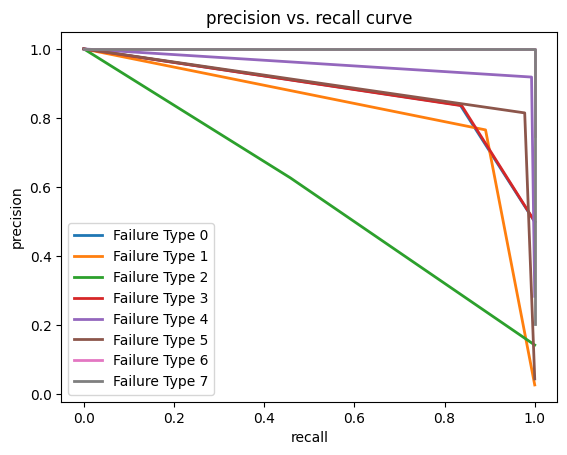

In [27]:
# precision recall curve
precision = dict()
recall = dict()
n_classes = 8
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:,i],
                                                        yhat_lgb[:,i])
    plt.plot(recall[i], precision[i], lw=2, label='Failure Type {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Reshape input data for LSTM (samples, timesteps, features)
# If your data is not sequential, set timesteps=1
timesteps = 1  # Adjust this based on your data
x = x.reshape((x.shape[0], timesteps, x.shape[1]))

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense

# Define the LSTM model
input_layer = Input(shape=(timesteps, x.shape[2]))
lstm_layer = LSTM(64, return_sequences=False)(input_layer)  # 64 LSTM units
output_layer = Dense(y.shape[1], activation='sigmoid')(lstm_layer)  # Multi-output classification

model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1, 38)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        26,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,278 (106.55 KB)

 Trainable params: 27,278 (106.55 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=20,  # Adjust the number of epochs
    batch_size=32,  # Adjust the batch size
    validation_data=(x_test, y_test)
)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.2879 - loss: 0.4664 - val_accuracy: 0.3825 - val_loss: 0.2566
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3839 - loss: 0.2407 - val_accuracy: 0.3645 - val_loss: 0.2354
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3440 - loss: 0.2284 - val_accuracy: 0.2425 - val_loss: 0.2206
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2701 - loss: 0.2099 - val_accuracy: 0.2080 - val_loss: 0.2074
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2274 - loss: 0.1979 - val_accuracy: 0.1805 - val_loss: 0.1989
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1426 - loss: 0.1919 - val_accuracy: 0.0950 - val_loss: 0.1919
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0848 - loss: 0.1842 - val_accuracy: 0.0720 - val_loss: 0.1872
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0729 - loss: 0.1783 - val_accuracy: 0.

In [31]:
# Make predictions
yhat_lstm = model.predict(x_test)

# Convert predictions to binary values (0 or 1) using a threshold (e.g., 0.5)
yhat_lstm = (yhat_lstm > 0.5).astype(int)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, yhat_lstm)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print(classification_report(y_test, yhat_lstm))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.7125
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       999
           1       0.62      0.24      0.34        55
           2       0.53      0.29      0.37       286
           3       0.85      0.83      0.84      1001
           4       0.92      0.92      0.92       568
           5       0.69      0.38      0.49        90
           6       0.98      1.00      0.99      1496
           7       0.99      0.97      0.98       410
           8       1.00      0.85      0.92        94
           9       0.69      0.38      0.49        90
          10       0.91      0.93      0.92       568
          11       0.85      0.83      0.84      1001
          12       0.59      0.24      0.34        55
          13       0.52      0.27      0.36       286

   micro avg       0.88      0.83      0.85      6999
   macro avg       0.78      0.64      0.69      6999
weighted avg       0.86 

In [32]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# 1️⃣ Ensure Predictions Are NumPy Arrays
yhat_lgb = np.array(yhat_lgb)
yhat_lstm = np.array(yhat_lstm)
y_test = np.array(y_test)

# 2️⃣ Stack Predictions as New Features
stacked_train_features = np.hstack((yhat_lgb, yhat_lstm))  # Shape: (samples, 2 * num_labels)
stacked_test_features = np.hstack((yhat_lgb, yhat_lstm))

# 3️⃣ Use MultiOutputClassifier with Logistic Regression
meta_model = MultiOutputClassifier(LogisticRegression())
meta_model.fit(stacked_train_features, y_test)  # Train for each label separately

# 4️⃣ Final Predictions Using Meta-Model
final_preds = meta_model.predict(stacked_test_features)

# 5️⃣ Evaluate Hybrid Model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, final_preds)
print(f"Hybrid Model Accuracy: {accuracy:.4f}")



Hybrid Model Accuracy: 0.8360


In [33]:
import pickle

# Save the trained Gradient Boosting model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model_lgb_pred, model_file)

print("✅ Model saved successfully as 'gradient_boosting_model.pkl'!")


✅ Model saved successfully as 'gradient_boosting_model.pkl'!
